In [1]:
#实际利率
actual_dns_ytm_file = "./data/CN_DNS_Real_Yield.csv"
actual_afns_ytm_file = "./data/CN_DNS_Real_Yield.csv"

# 模型利率
model_dns_ytm_file = './data/CN_DNS_Model_Yield.csv'
model_afns_ytm_file = "./data/CN_AFNS_Model_Yield.csv"

#实际因子
actual_dns_file = "./data/dns_factor.csv"
actual_afns_file = "./data/CN_AFNS_Factor.csv"

# 统计预测因子
pred_stats_dns_file = "./data/Pred_DNS_Factor_1Y.csv"
pred_stats_afns_file = "./data/Pred_AFNS_Factor_1Y.csv"

# 机器学习预测因子
pred_ml_dns_file = "./data/ML_Pred_DNS_Factor_1Y.csv"
pred_ml_afns_file = "./data/ML_Pred_AFNS_Factor_1Y.csv"


# 预测利率
pred_stats_afns_ytm_file = "./data/CN_AFNS_Pred_Stats_Yield_1Y.csv"
pred_ml_afns_ytm_file = "./data/CN_AFNS_Pred_ML_Yield_1Y.csv"

In [2]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
import warnings


warnings.simplefilter("ignore")

plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

%config InlineBackend.figure_format = 'retina'

## 1.分析因子的预测情况

In [4]:
# 真实DNS因子
actual_dns_df = pd.read_csv(actual_dns_file)
actual_dns_df['Date'] = pd.to_datetime(actual_dns_df['Date'] )

# 真实AFNS因子
actual_afns_df = pd.read_csv(actual_afns_file)
actual_afns_df['Date'] = pd.to_datetime(actual_afns_df['Date'])

# 预测DNS因子-统计方法
pred_stats_dns_df = pd.read_csv(pred_stats_dns_file)
pred_stats_dns_df['Date'] = pd.to_datetime(pred_stats_dns_df['Date'])

# 预测AFNS因子-统计方法
pred_stats_afns_df = pd.read_csv(pred_stats_afns_file)
pred_stats_afns_df['Date'] = pd.to_datetime(pred_stats_afns_df['Date'])

# 预测DNS因子-机器学习
pred_ml_dns_df = pd.read_csv(pred_ml_dns_file)
pred_ml_dns_df['Date'] = pd.to_datetime(pred_ml_dns_df['Date'])

# 预测AFNS因子-机器学习
pred_ml_afns_df = pd.read_csv(pred_ml_afns_file)
pred_ml_afns_df['Date'] = pd.to_datetime(pred_ml_afns_df['Date'])


print(actual_dns_df.shape, actual_afns_df.shape)
print(pred_stats_dns_df.shape, pred_stats_afns_df.shape)
print(pred_ml_dns_df.shape, pred_ml_afns_df.shape)

(2744, 5) (2744, 4)
(499, 4) (499, 4)
(499, 5) (499, 4)


In [5]:
actual_dns_df['Tau'].unique()[0]

0.3857110541000885

In [6]:
# 对其数据
datetime_df = pred_stats_dns_df[['Date']]
new_actual_dns_df = datetime_df.merge(actual_dns_df, on ='Date')
new_actual_dns_df

new_actual_afns_df = datetime_df.merge(actual_afns_df, on ='Date')
new_actual_afns_df

,Date,Level,Slope,Curvature
0,2021-01-04,7.643430,-5.240475,-2.494299
1,2021-01-05,7.637336,-5.225354,-2.483680
2,2021-01-06,7.632560,-5.234501,-2.479776
3,2021-01-07,7.628829,-5.302860,-2.442492
4,2021-01-08,7.622729,-5.314177,-2.406889
...,...,...,...,...
494,2022-12-26,6.438232,-4.513261,-0.991240
495,2022-12-27,6.437766,-4.473574,-1.001645
496,2022-12-28,6.437606,-4.462218,-1.000916
497,2022-12-29,6.438723,-4.498705,-0.991197


In [7]:
# 因子预测分析： 计算MAE(平均绝对误差), MAPE(平均绝对百分比误差)， RMSE(均方根误差)的值
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

In [8]:
# 计算MAPE:平均绝对百分比误差
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/y_true)) * 100

In [9]:
# 均方根误差
import math
def rmse(y_true, y_pred):
    MSE = np.square(np.subtract(y_true,y_pred)).mean() 
    RMSE = math.sqrt(MSE)
    return RMSE

In [10]:
# DNS  - 统计学

def cal_indicator(y_true, y_pred):
    mae_value = mae(y_true, y_pred)
    mape_value = mape(y_true, y_pred)
    rmse_value = rmse(y_true, y_pred)
    return [mae_value, mape_value, rmse_value]



### 1.1 统计模型分析

statistical model

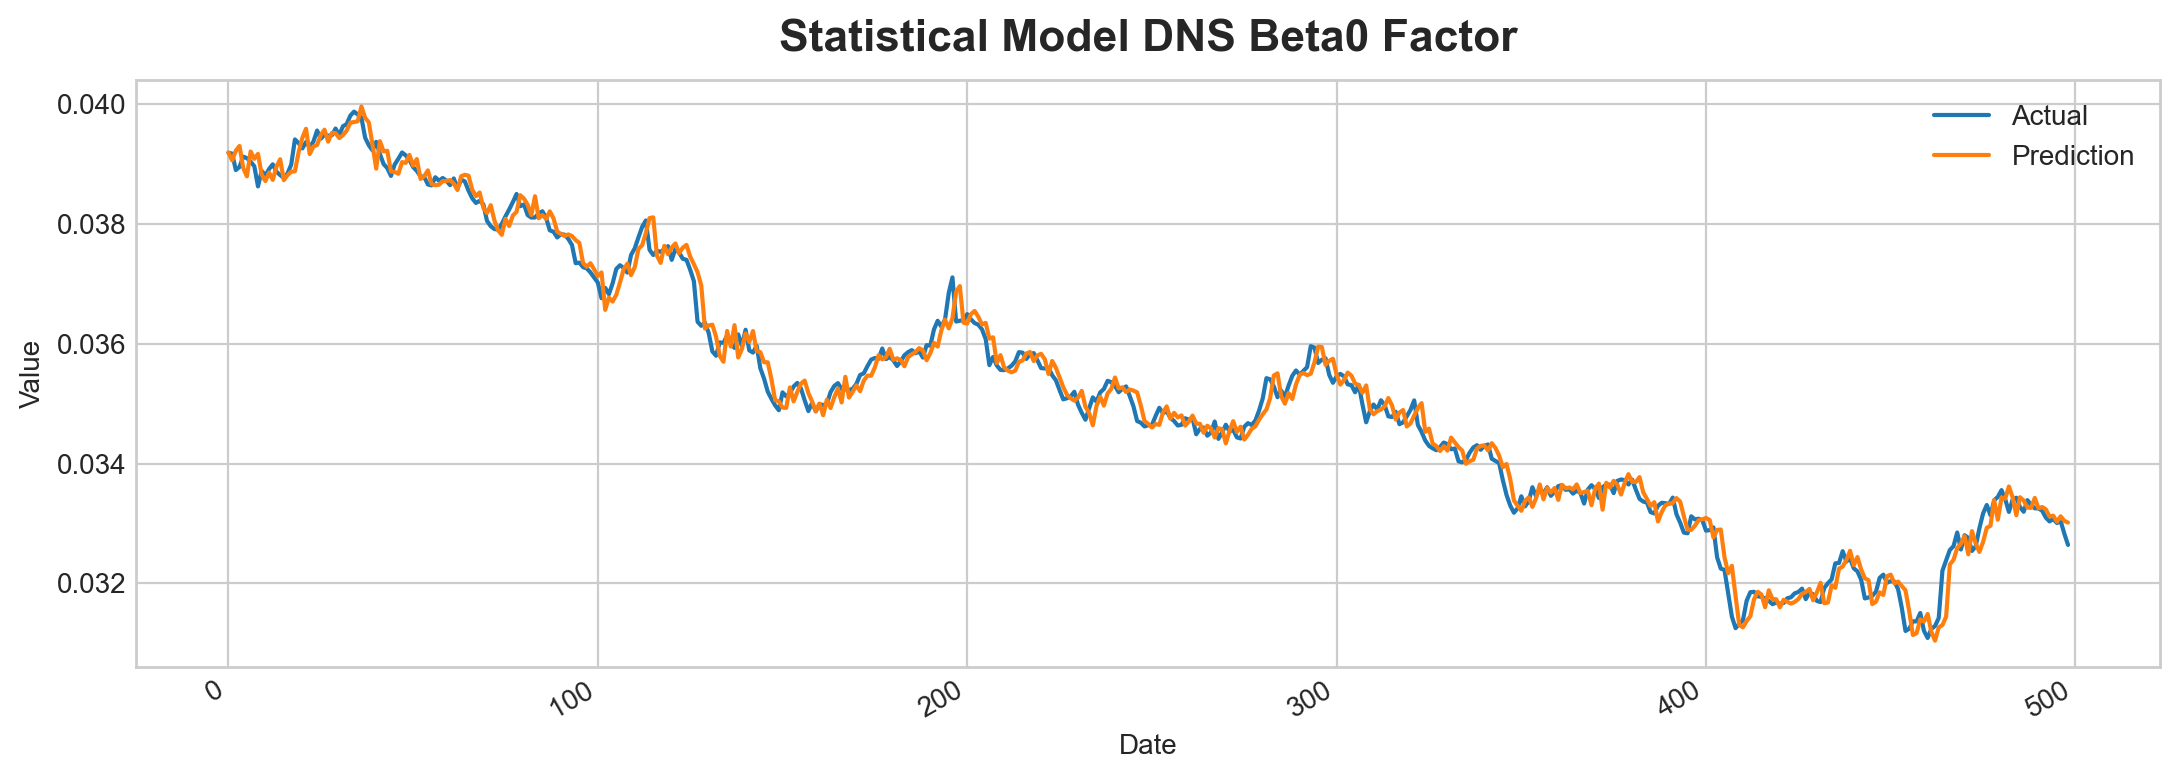

In [11]:
fig, ax = plt.subplots()

ax.plot(new_actual_dns_df['Beta0'], label="Actual")
ax.plot(pred_stats_dns_df['Beta0'], label="Prediction")
ax.set_xlabel('Date')
ax.set_ylabel('Value')

plt.title("Statistical Model DNS Beta0 Factor")
fig.autofmt_xdate()
plt.tight_layout()
plt.legend()

In [12]:
dns_stats_beta0_indicator_list = cal_indicator(new_actual_dns_df['Beta0'], pred_stats_dns_df['Beta0'])
dns_stats_beta0_indicator_list

[0.00017891099949170057, 0.5110055427041235, 0.0002322631627358337]

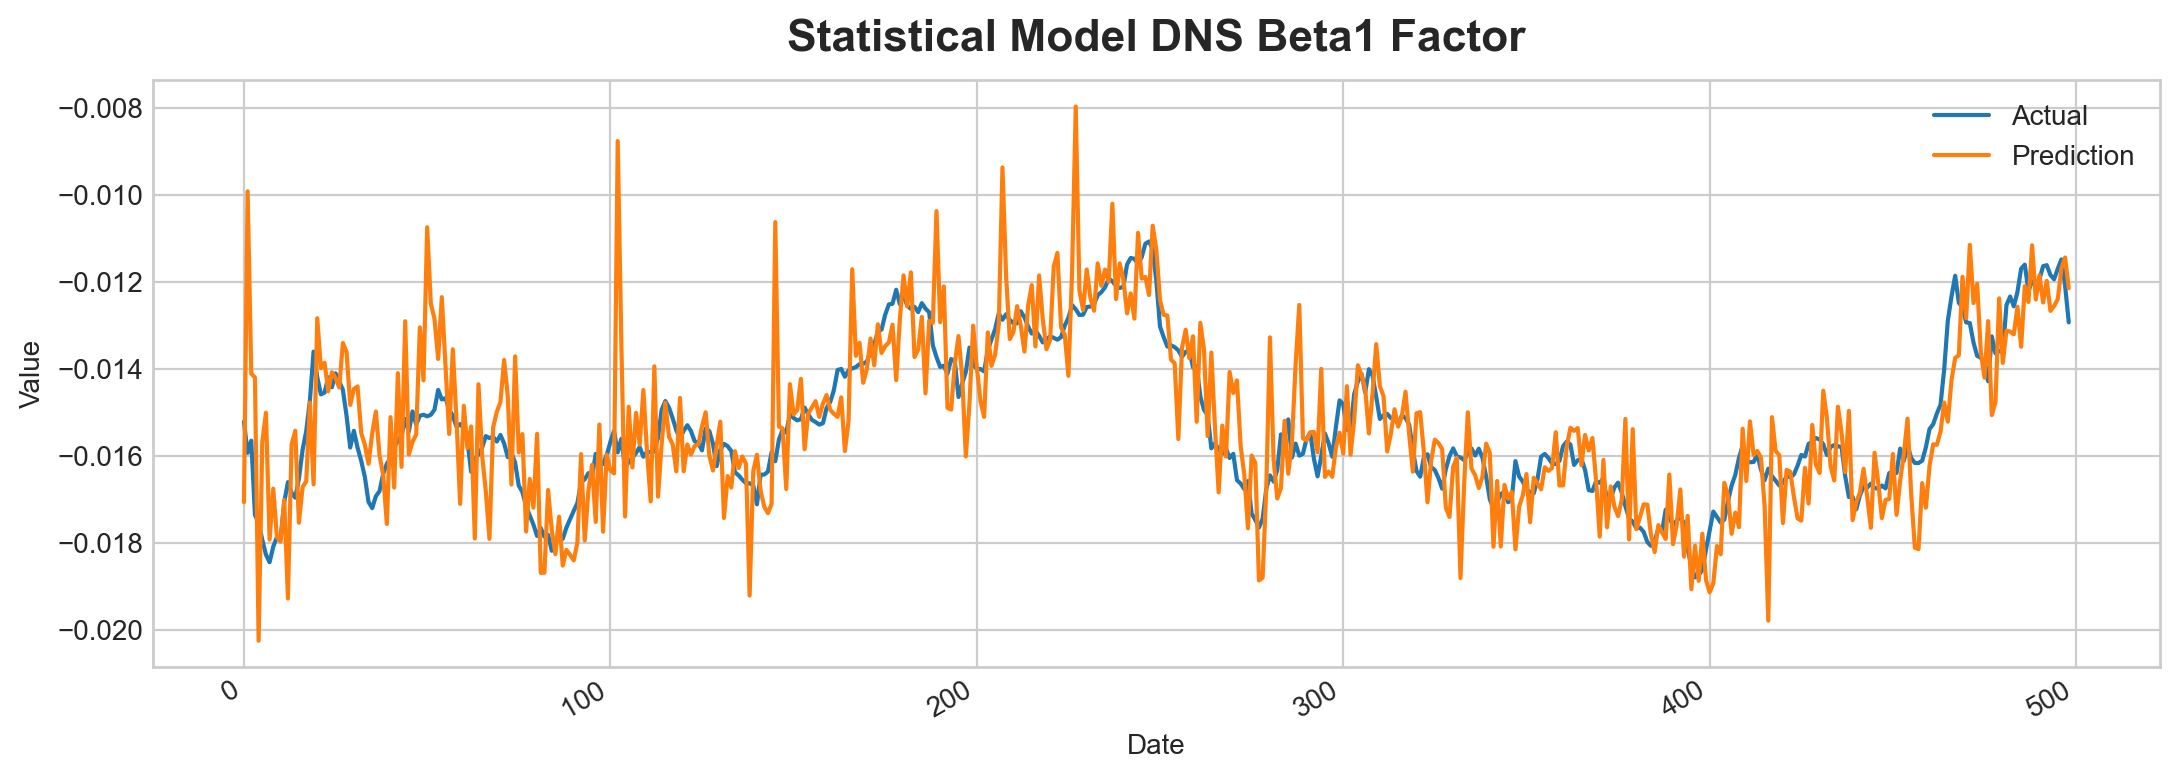

In [13]:
fig, ax = plt.subplots()

ax.plot(new_actual_dns_df['Beta1'], label="Actual")
ax.plot(pred_stats_dns_df['Beta1'], label="Prediction")
ax.set_xlabel('Date')
ax.set_ylabel('Value')

plt.title("Statistical Model DNS Beta1 Factor")
fig.autofmt_xdate()
plt.tight_layout()
plt.legend()

In [14]:
dns_stats_beta1_indicator_list = cal_indicator(new_actual_dns_df['Beta1'], pred_stats_dns_df['Beta1'])
dns_stats_beta1_indicator_list

[0.0008765676332652004, 5.793234703071795, 0.0011976822122264797]

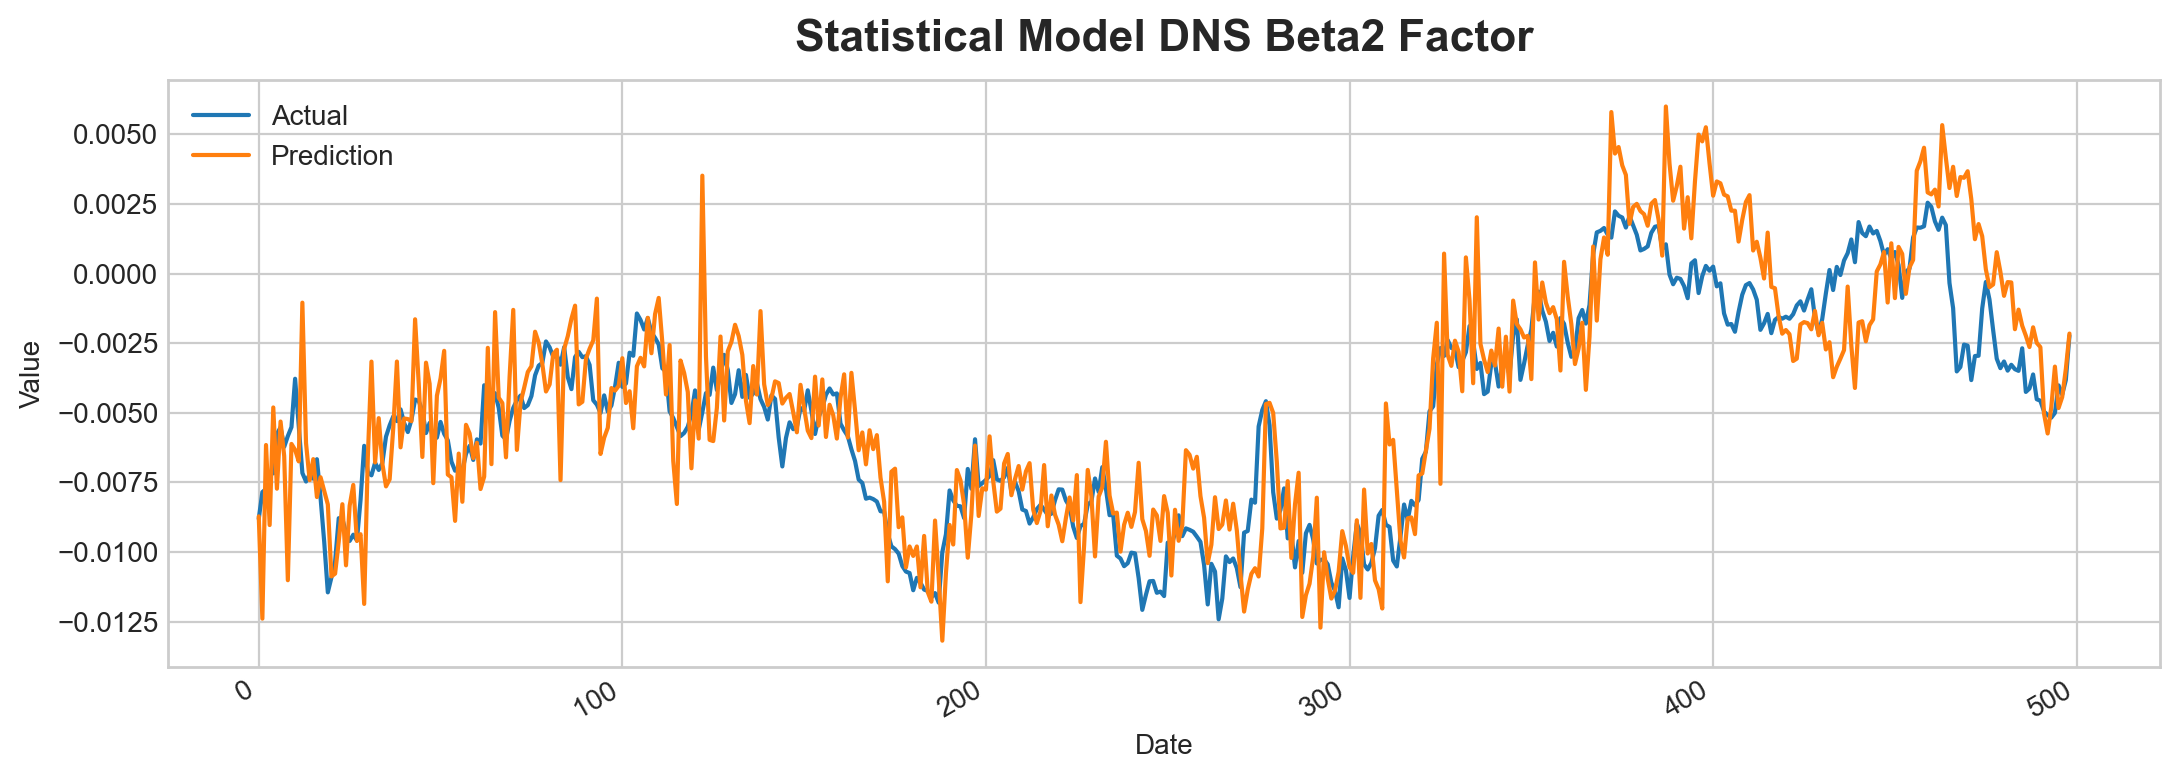

In [15]:
fig, ax = plt.subplots()

ax.plot(new_actual_dns_df['Beta2'], label="Actual")
ax.plot(pred_stats_dns_df['Beta2'], label="Prediction")
ax.set_xlabel('Date')
ax.set_ylabel('Value')

plt.title("Statistical Model DNS Beta2 Factor")
fig.autofmt_xdate()
plt.tight_layout()
plt.legend()

In [16]:
dns_stats_beta2_indicator_list = cal_indicator(new_actual_dns_df['Beta2'], pred_stats_dns_df['Beta2'])
dns_stats_beta2_indicator_list

[0.001647807538329835, 145.4672610919048, 0.002125369726511037]

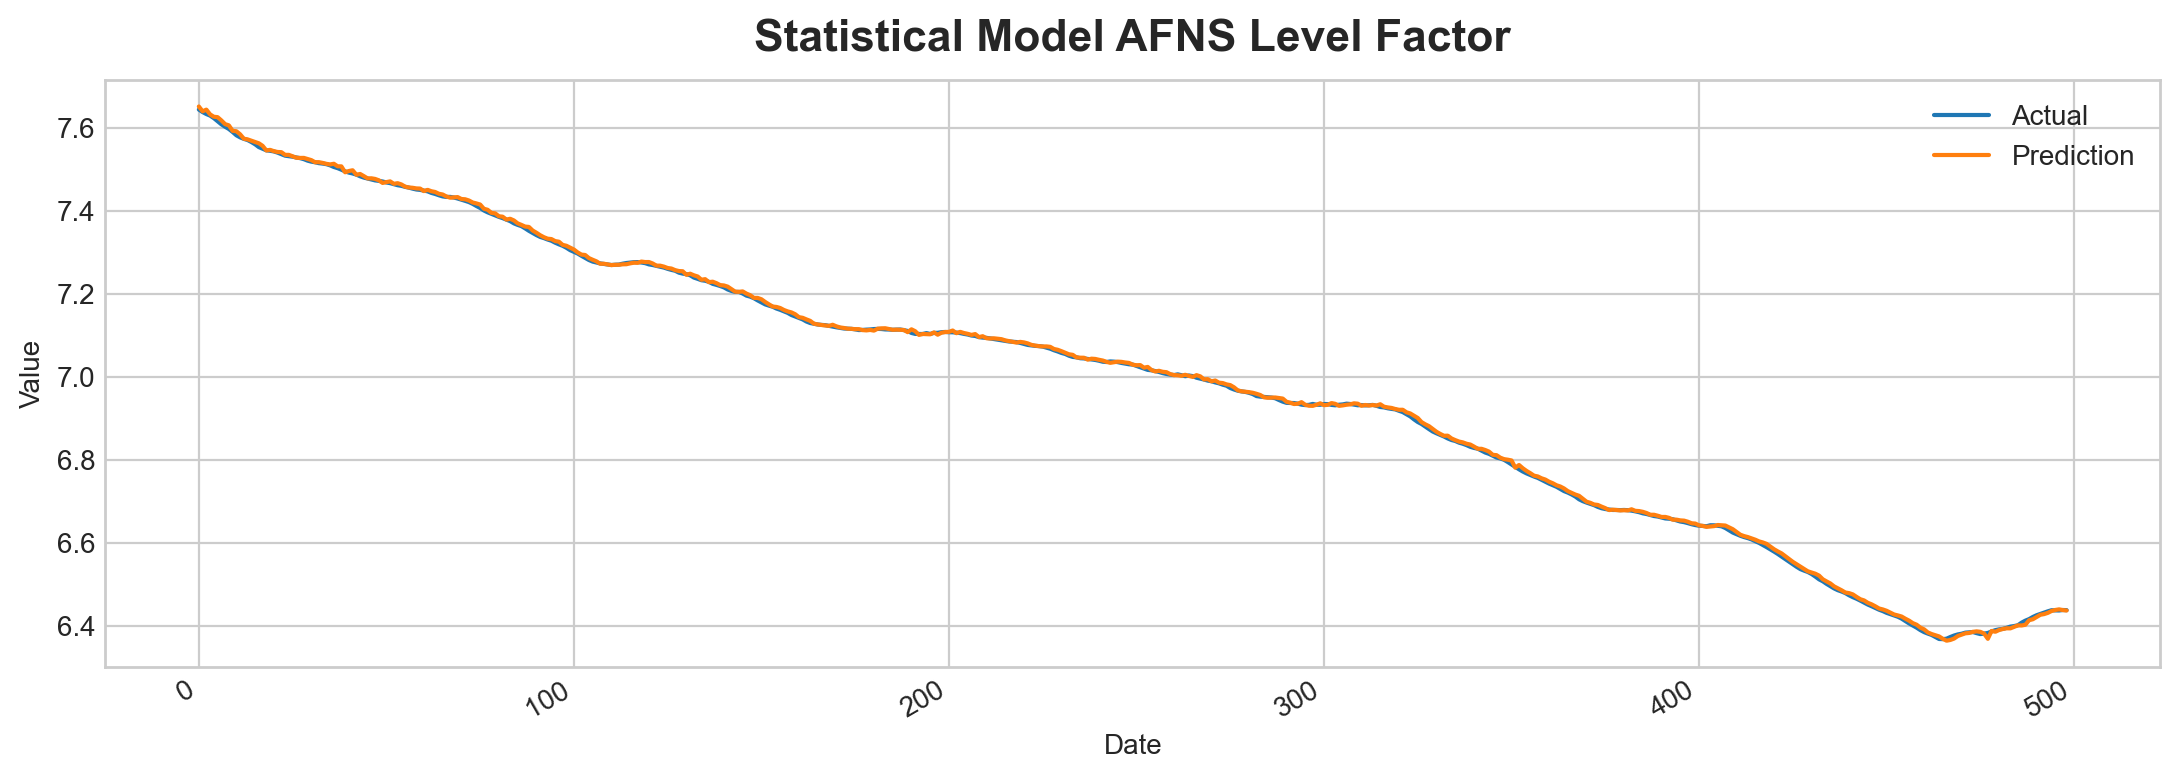

In [17]:
fig, ax = plt.subplots()

ax.plot(new_actual_afns_df['Level'], label="Actual")
ax.plot(pred_stats_afns_df['Level'], label="Prediction")
ax.set_xlabel('Date')
ax.set_ylabel('Value')

plt.title("Statistical Model AFNS Level Factor")
fig.autofmt_xdate()
plt.tight_layout()
plt.legend()

In [18]:
afns_stats_level_indicator_list = cal_indicator(new_actual_afns_df['Level'], pred_stats_afns_df['Level'])
afns_stats_level_indicator_list

[0.003311954881065515, 0.04765698377425484, 0.004059535492142739]

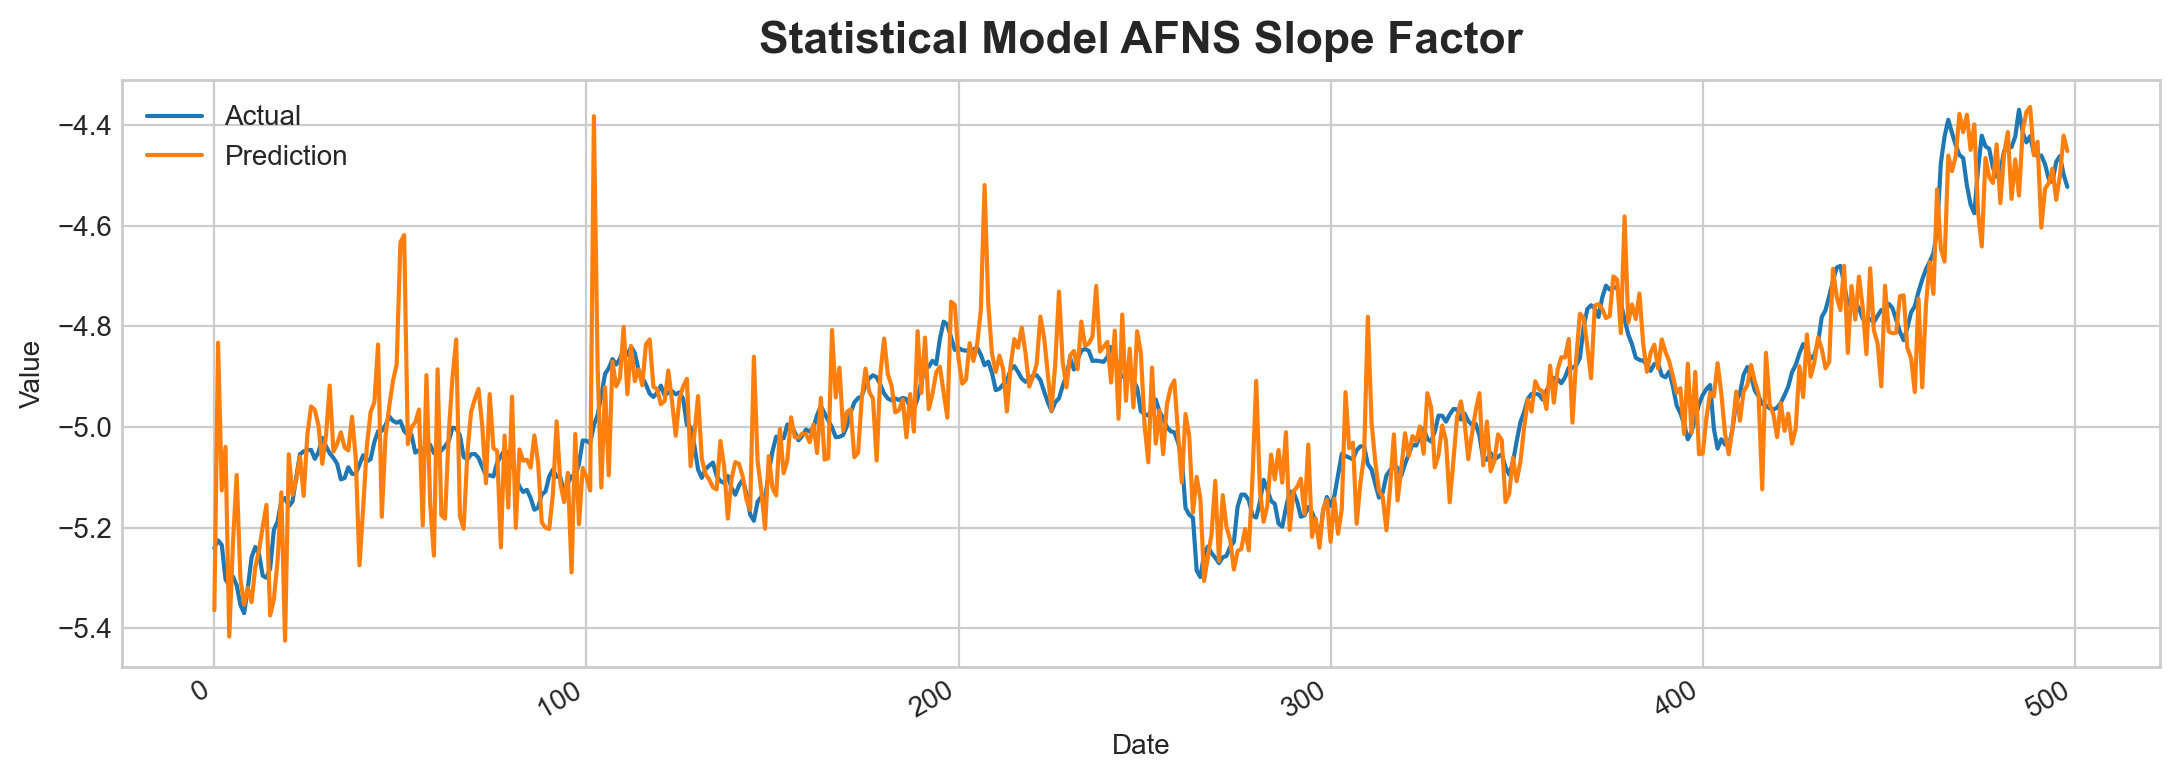

In [19]:
fig, ax = plt.subplots()

ax.plot(new_actual_afns_df['Slope'], label="Actual")
ax.plot(pred_stats_afns_df['Slope'], label="Prediction")
ax.set_xlabel('Date')
ax.set_ylabel('Value')

plt.title("Statistical Model AFNS Slope Factor")
fig.autofmt_xdate()
plt.tight_layout()
plt.legend()

In [20]:
afns_stats_slope_indicator_list = cal_indicator(new_actual_afns_df['Slope'], pred_stats_afns_df['Slope'])
afns_stats_slope_indicator_list

[0.0695906109178755, 1.4038706941519554, 0.09583617773218649]

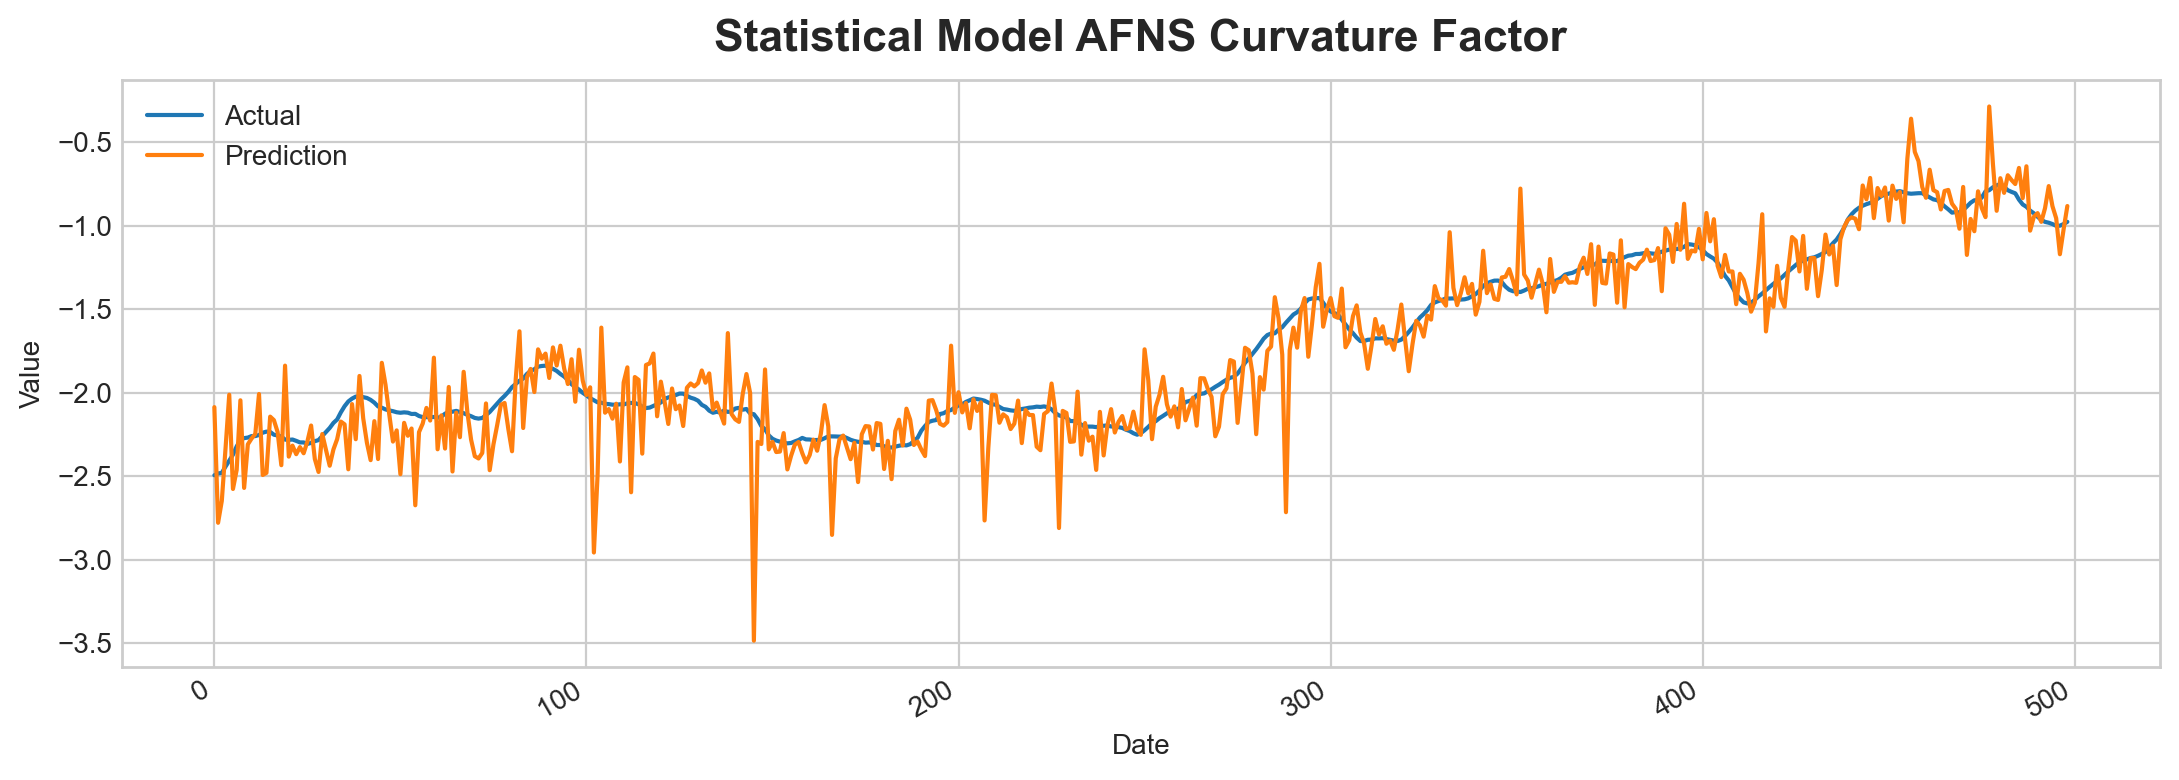

In [21]:
fig, ax = plt.subplots()

ax.plot(new_actual_afns_df['Curvature'], label="Actual")
ax.plot(pred_stats_afns_df['Curvature'], label="Prediction")
ax.set_xlabel('Date')
ax.set_ylabel('Value')

plt.title("Statistical Model AFNS Curvature Factor")
fig.autofmt_xdate()
plt.tight_layout()
plt.legend()

In [22]:
afns_stats_curvature_indicator_list = cal_indicator(new_actual_afns_df['Curvature'], pred_stats_afns_df['Curvature'])
afns_stats_curvature_indicator_list

[0.12740821087887808, 7.816782169434846, 0.18817340925615506]

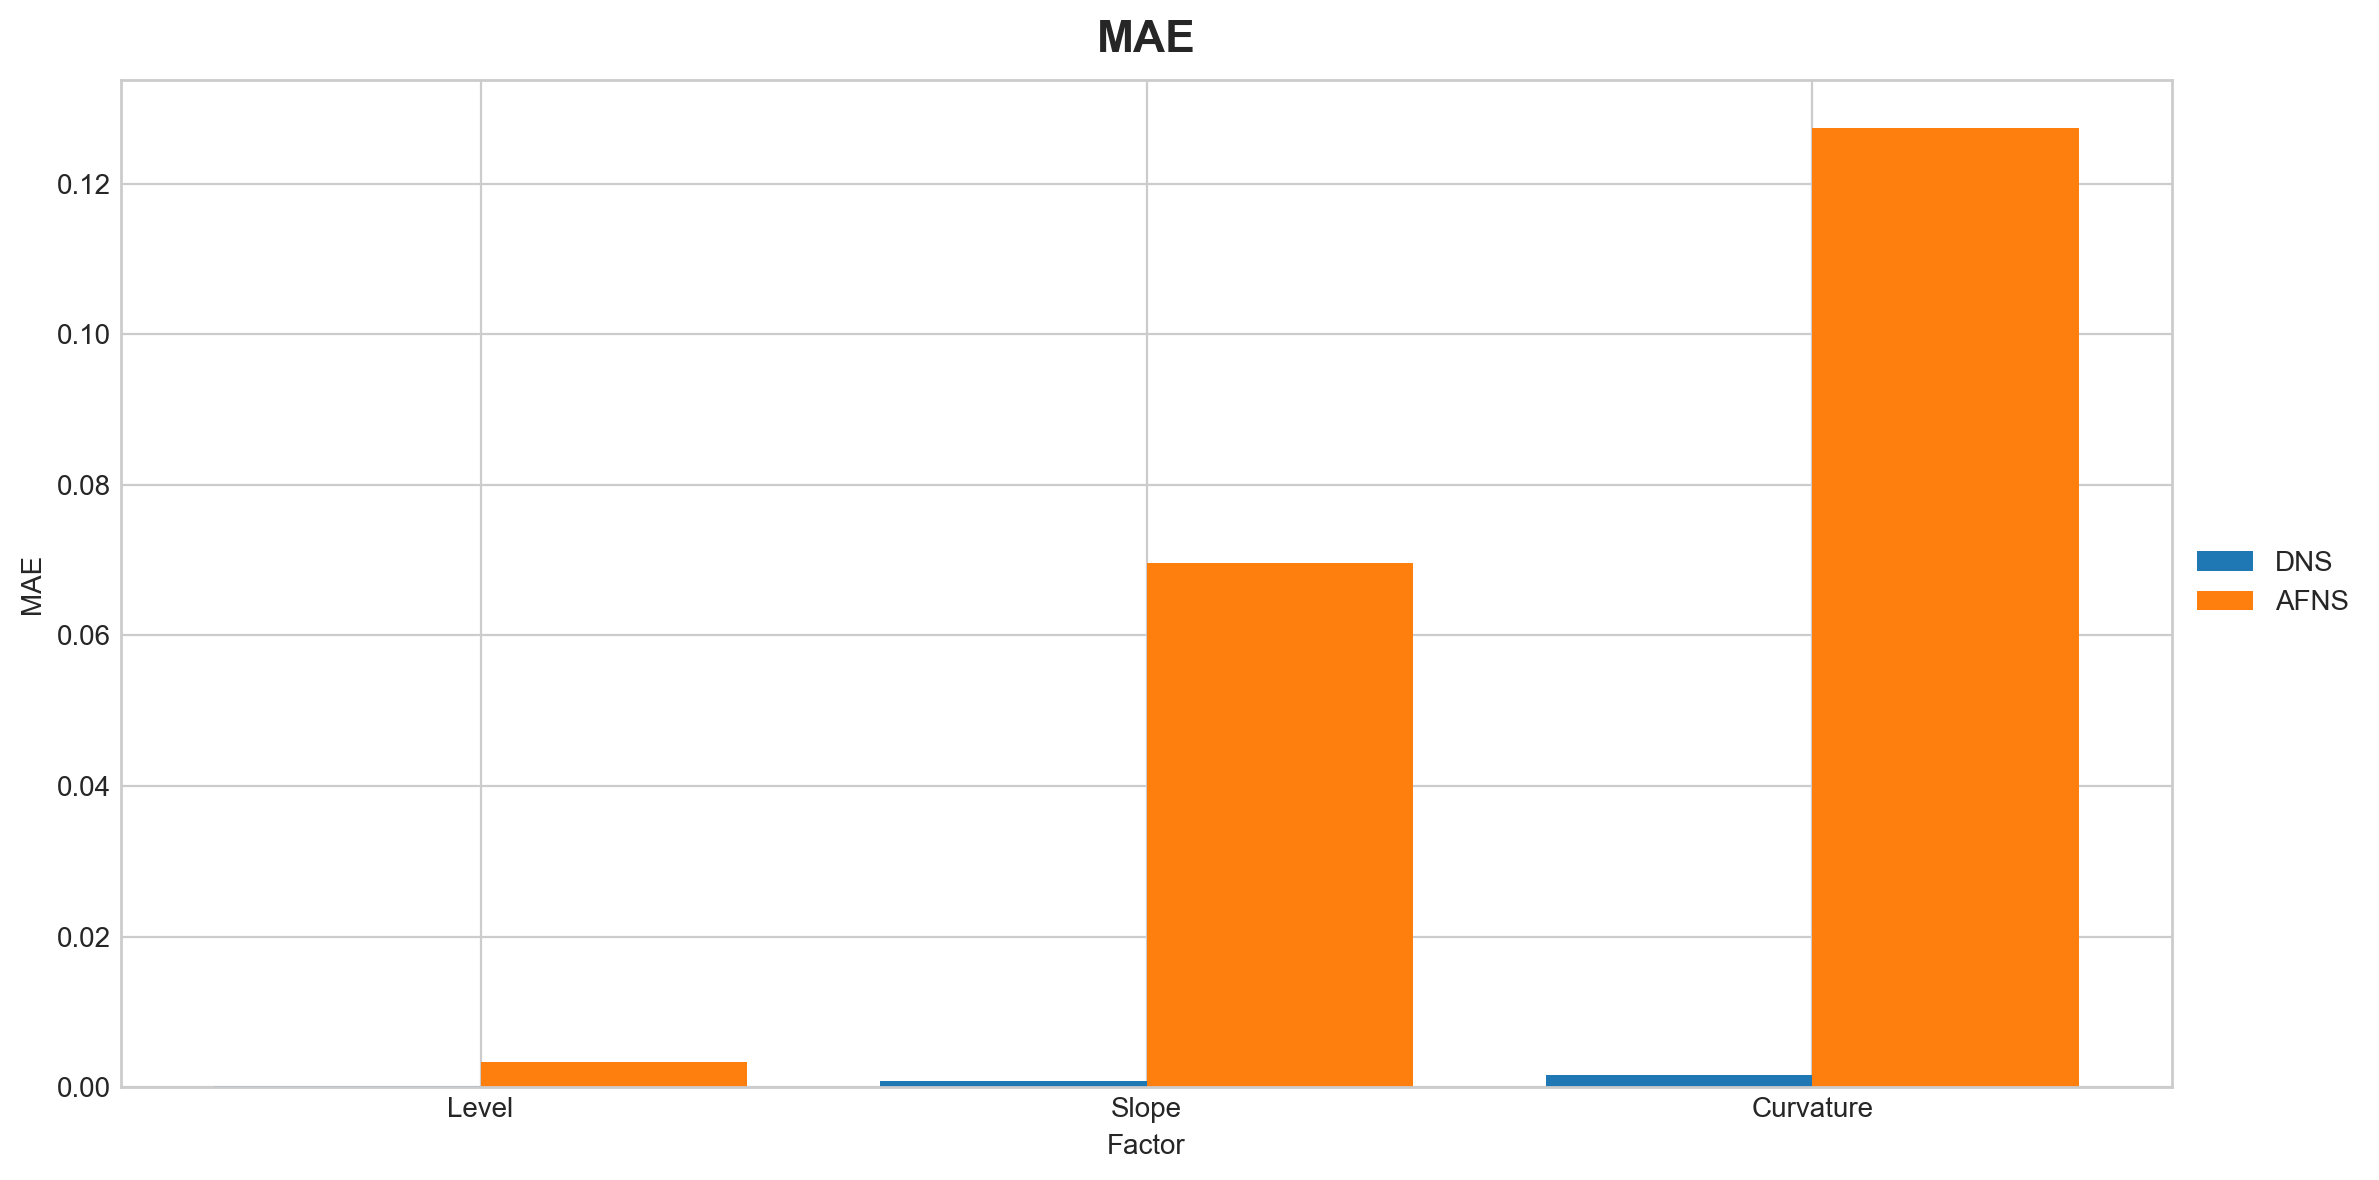

In [23]:
# MAE 可视化
# 

mae_dns_stats = [dns_stats_beta0_indicator_list[0], dns_stats_beta1_indicator_list[0], dns_stats_beta2_indicator_list[0]]
mae_afns_stats = [afns_stats_level_indicator_list[0], afns_stats_slope_indicator_list[0], afns_stats_curvature_indicator_list[0]]

def plot_indicator(dns_stats, mae_afns_stats, label_nums, label_name="MAE"):
    fig, ax = plt.subplots(figsize=(12, 6))

    label_list = ["Level", "Slope", "Curvature"]

    totalWidth=0.8 # 一组柱状体的宽度
    #labelNums=2 # 一组有两种类别
    barWidth=totalWidth/label_nums # 单个柱体的宽度
    seriesNums=len(label_list) # 一共有多少组

    ax.bar([x for x in range(seriesNums)], dns_stats, label="DNS", width=barWidth)
    ax.bar([x+1*barWidth for x in range(seriesNums)], mae_afns_stats, label="AFNS", width=barWidth)
    #ax.bar([x+2*barWidth for x in range(seriesNums)], anfs_error_df['MAPE'], label="AFNS", width=barWidth)

    plt.xticks([x+barWidth/2*(label_nums-1) for x in range(3)], label_list)
    plt.xlabel("Factor")
    plt.ylabel(label_name)
    plt.title(label_name)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
plot_indicator(mae_dns_stats, mae_afns_stats, 2)

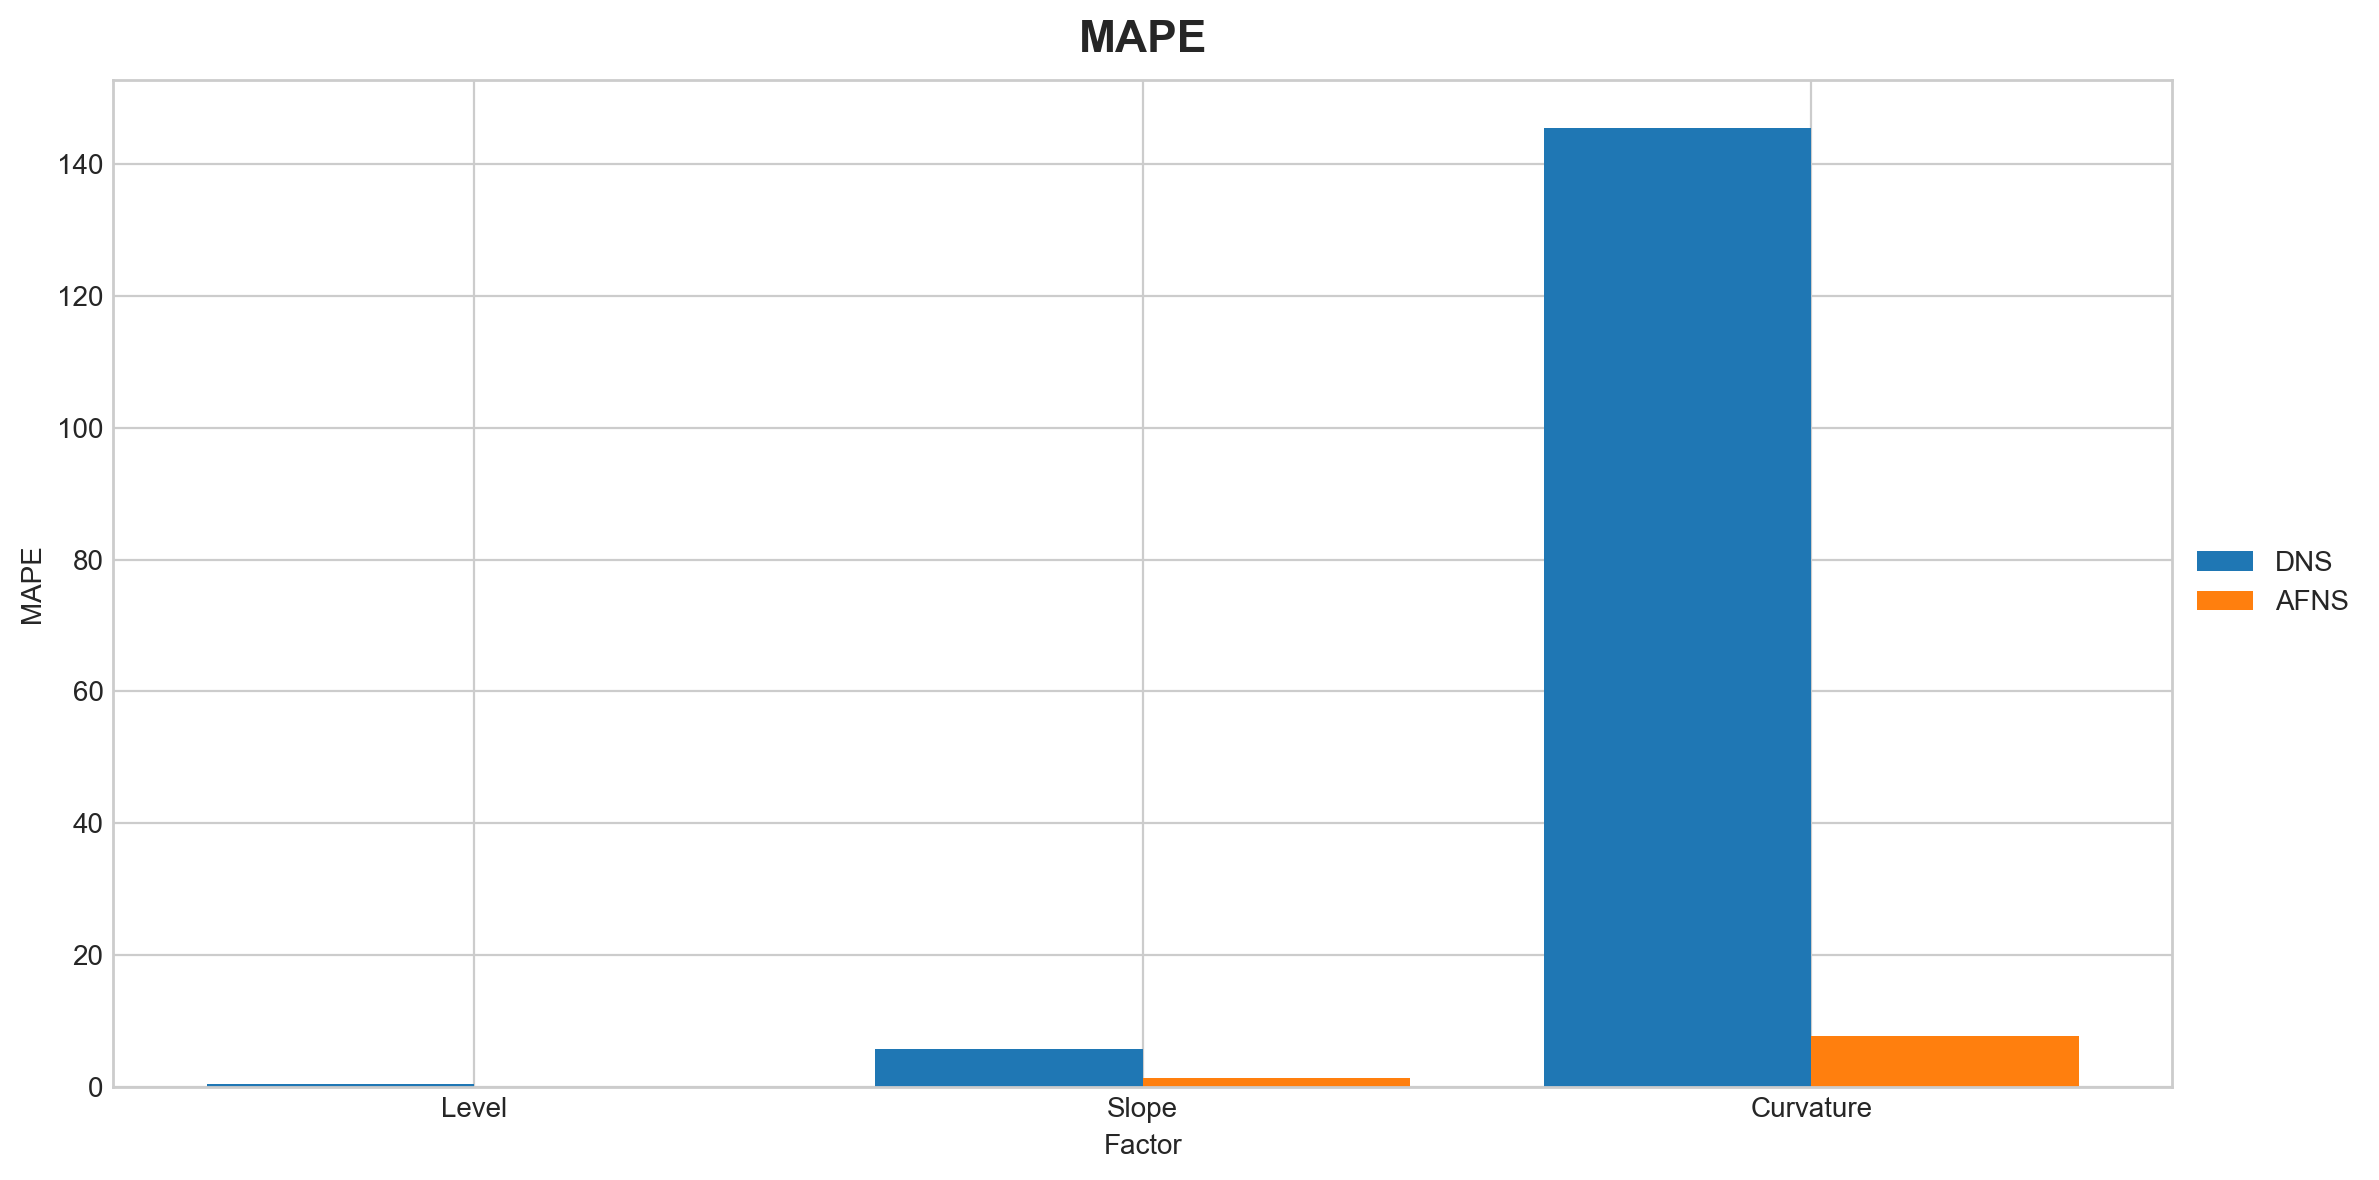

In [24]:
mape_dns_stats = [dns_stats_beta0_indicator_list[1], dns_stats_beta1_indicator_list[1], dns_stats_beta2_indicator_list[1]]
mape_afns_stats = [afns_stats_level_indicator_list[1], afns_stats_slope_indicator_list[1], afns_stats_curvature_indicator_list[1]]
plot_indicator(mape_dns_stats, mape_afns_stats, 2, "MAPE")

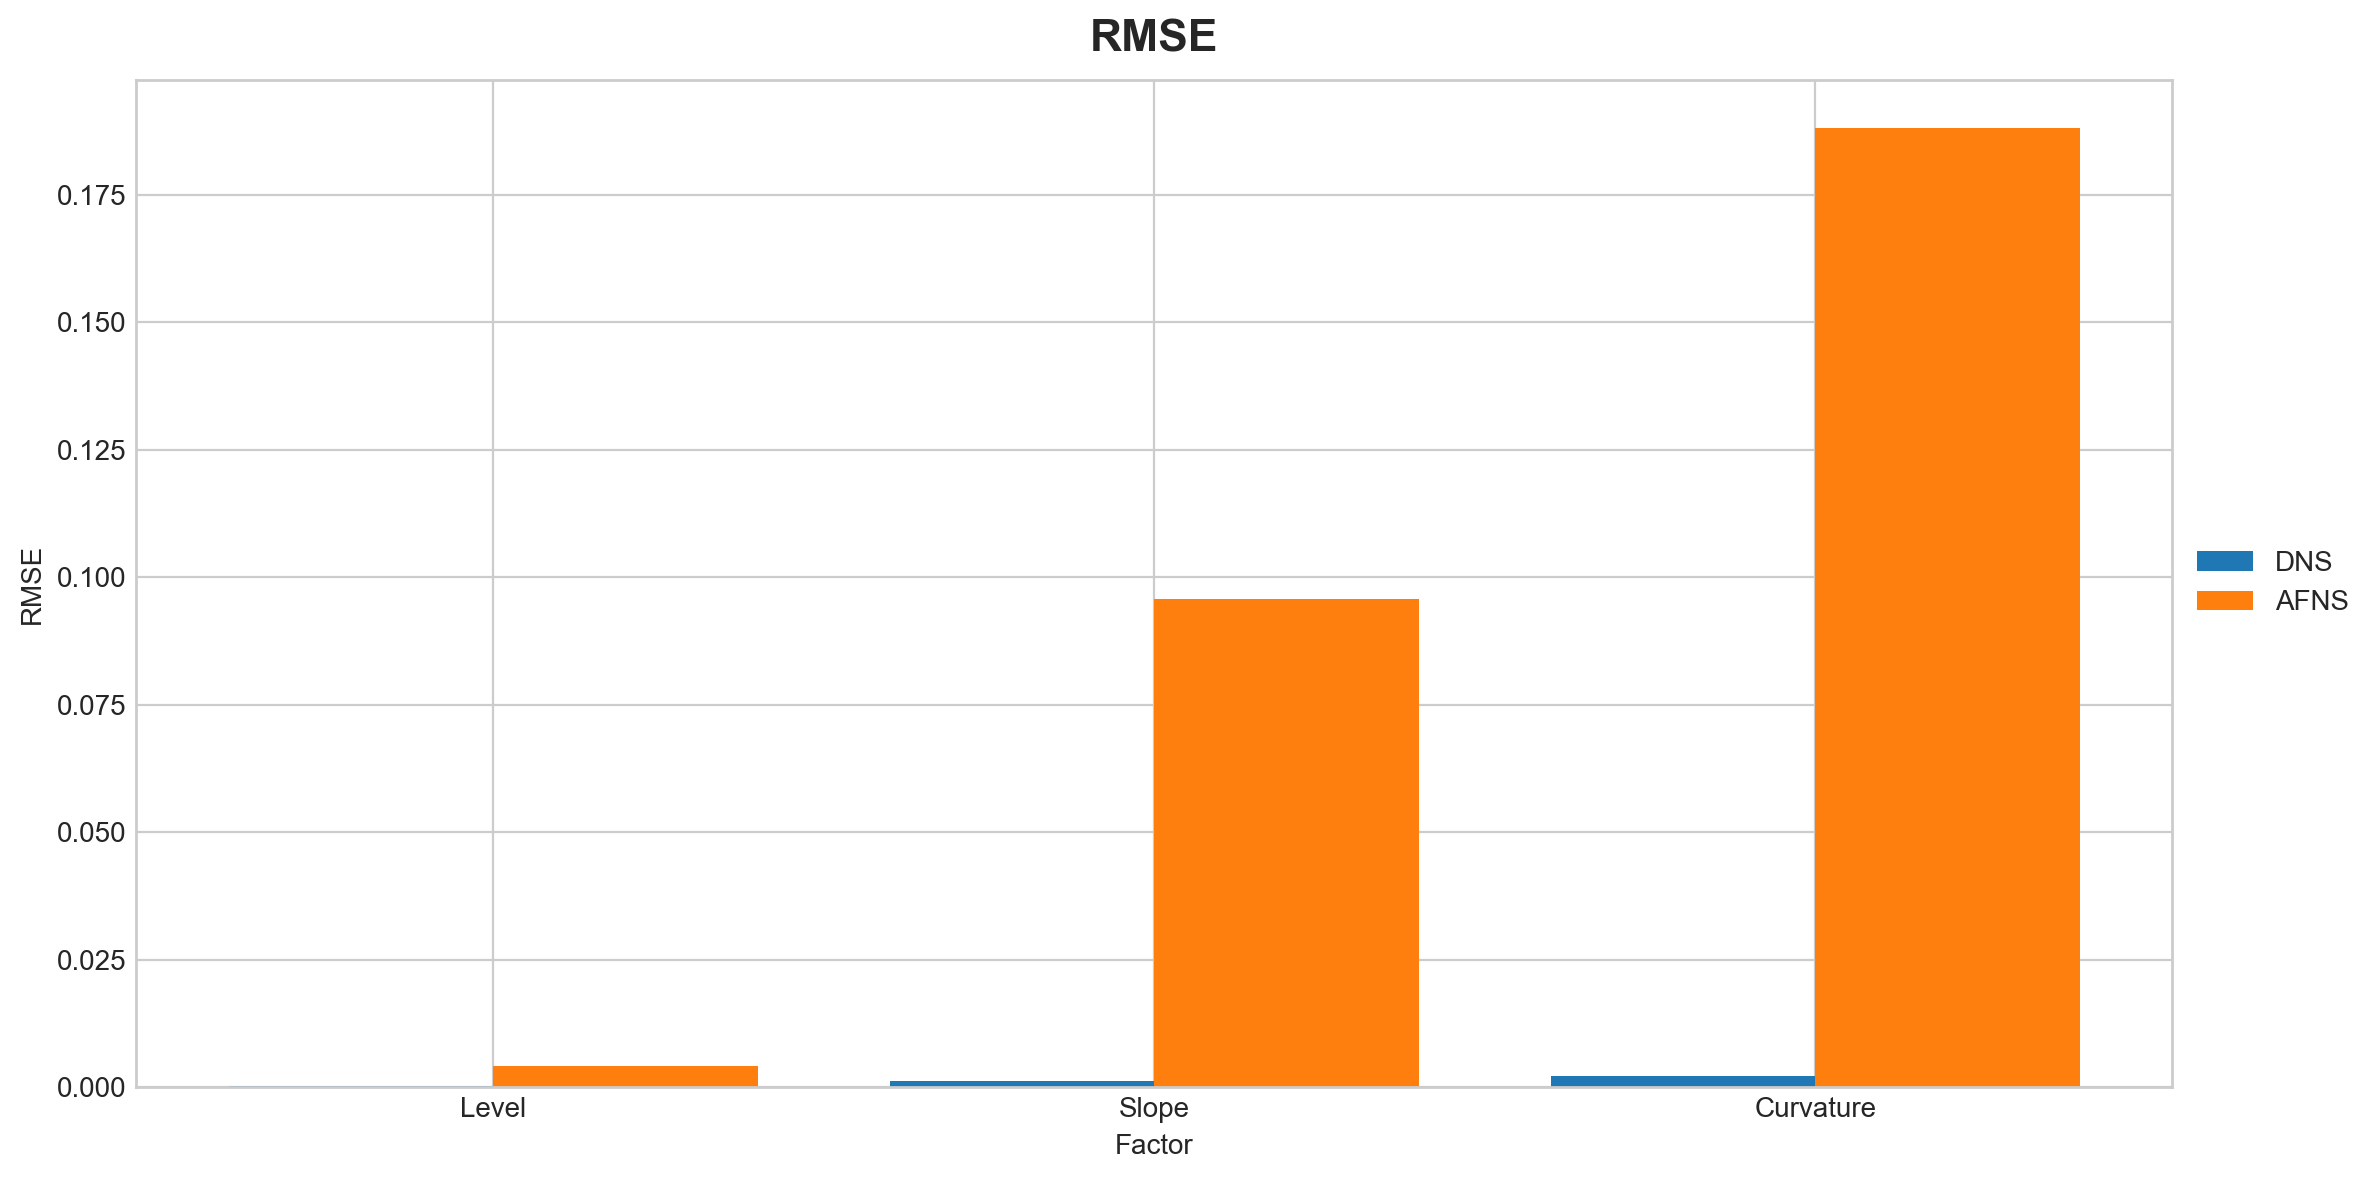

In [25]:
rmse_dns_stats = [dns_stats_beta0_indicator_list[2], dns_stats_beta1_indicator_list[2], dns_stats_beta2_indicator_list[2]]
rmse_afns_stats = [afns_stats_level_indicator_list[2], afns_stats_slope_indicator_list[2], afns_stats_curvature_indicator_list[2]]
plot_indicator(rmse_dns_stats, rmse_afns_stats, 2, "RMSE")

### 1.2 机器学习模型分析

machine learning model

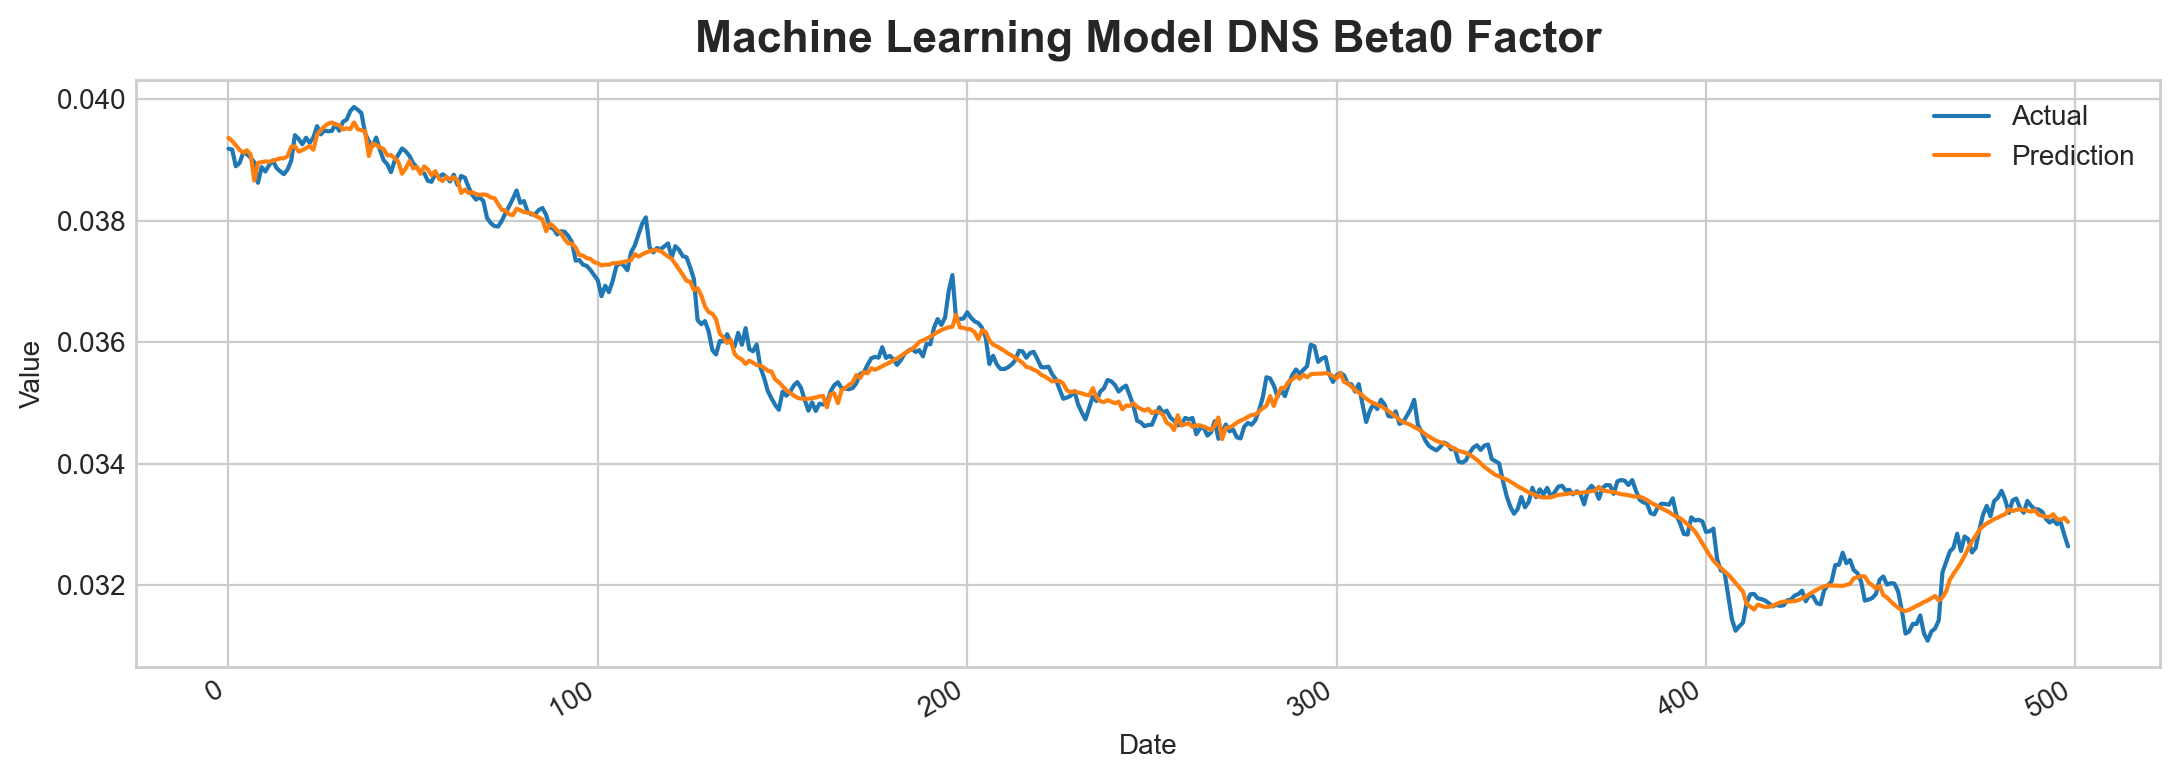

In [26]:
fig, ax = plt.subplots()

ax.plot(new_actual_dns_df['Beta0'], label="Actual")
ax.plot(pred_ml_dns_df['Beta0'], label="Prediction")
ax.set_xlabel('Date')
ax.set_ylabel('Value')

plt.title("Machine Learning Model DNS Beta0 Factor")
fig.autofmt_xdate()
plt.tight_layout()
plt.legend()

In [27]:
dns_ml_beta0_indicator_list = cal_indicator(new_actual_dns_df['Beta0'], pred_ml_dns_df['Beta0'])
dns_ml_beta0_indicator_list

[0.0001769611559650958, 0.5067890406701346, 0.00022878902226506655]

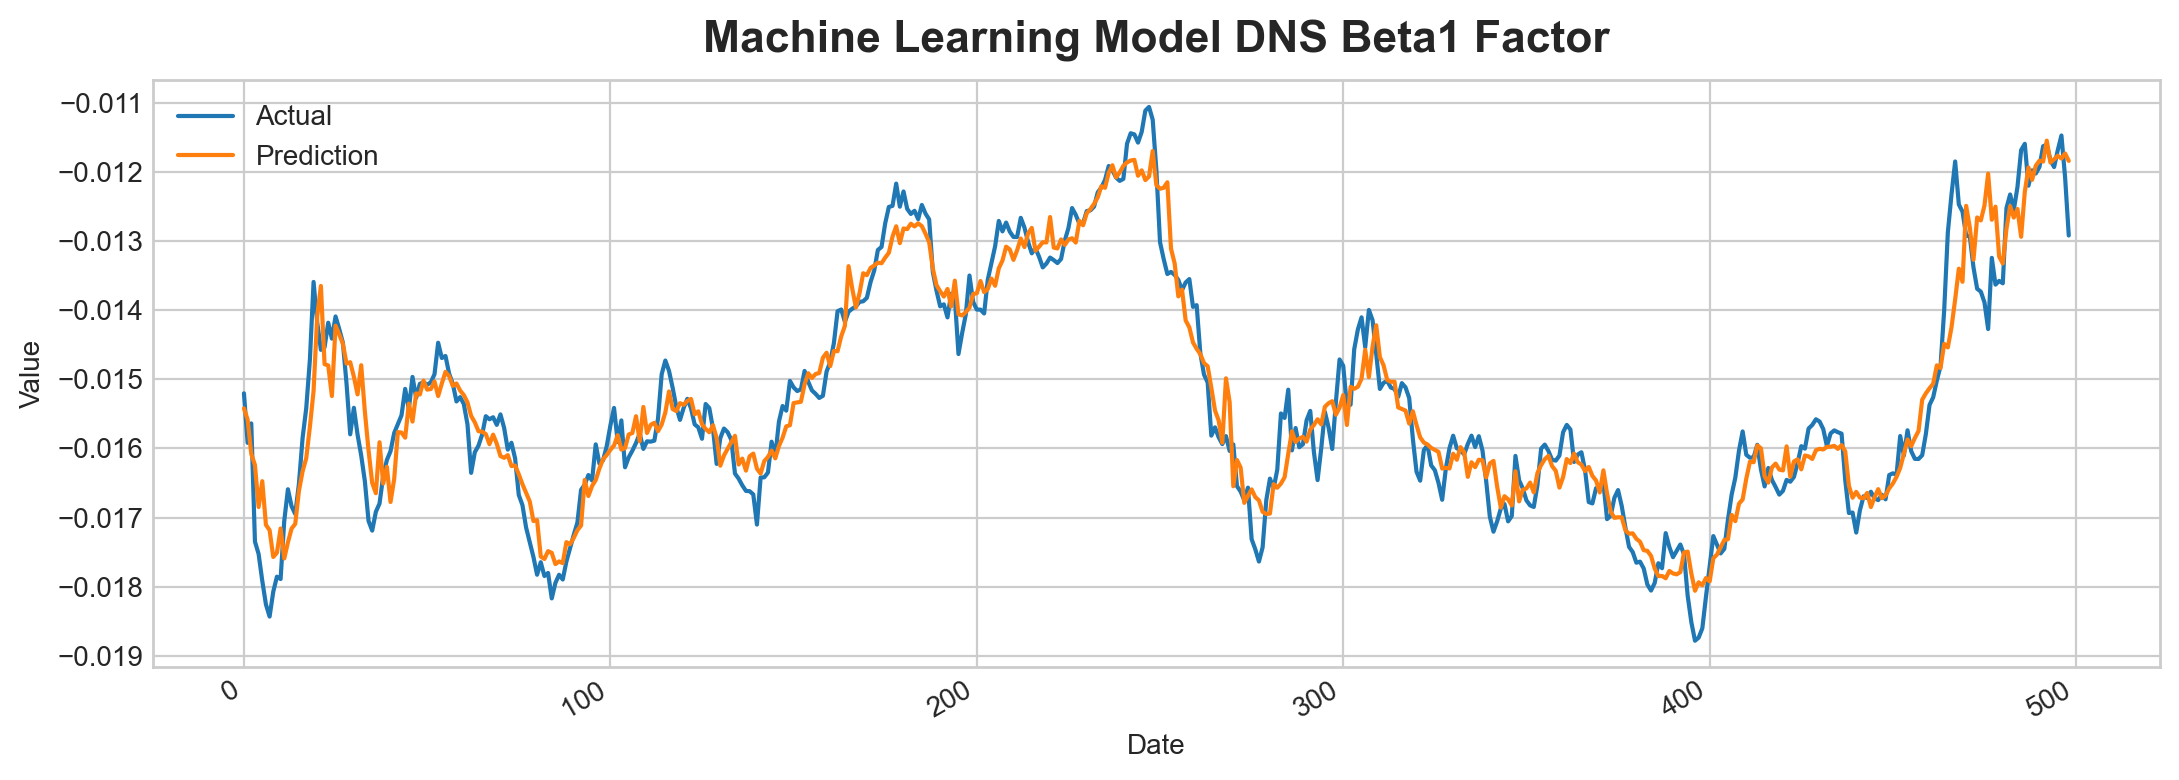

In [28]:
fig, ax = plt.subplots()

ax.plot(new_actual_dns_df['Beta1'], label="Actual")
ax.plot(pred_ml_dns_df['Beta1'], label="Prediction")
ax.set_xlabel('Date')
ax.set_ylabel('Value')

plt.title("Machine Learning Model DNS Beta1 Factor")
fig.autofmt_xdate()
plt.tight_layout()
plt.legend()

In [29]:
dns_ml_beta1_indicator_list = cal_indicator(new_actual_dns_df['Beta1'], pred_ml_dns_df['Beta1'])
dns_ml_beta1_indicator_list

[0.0003574636325445362, 2.3863830673932105, 0.00047749718839823463]

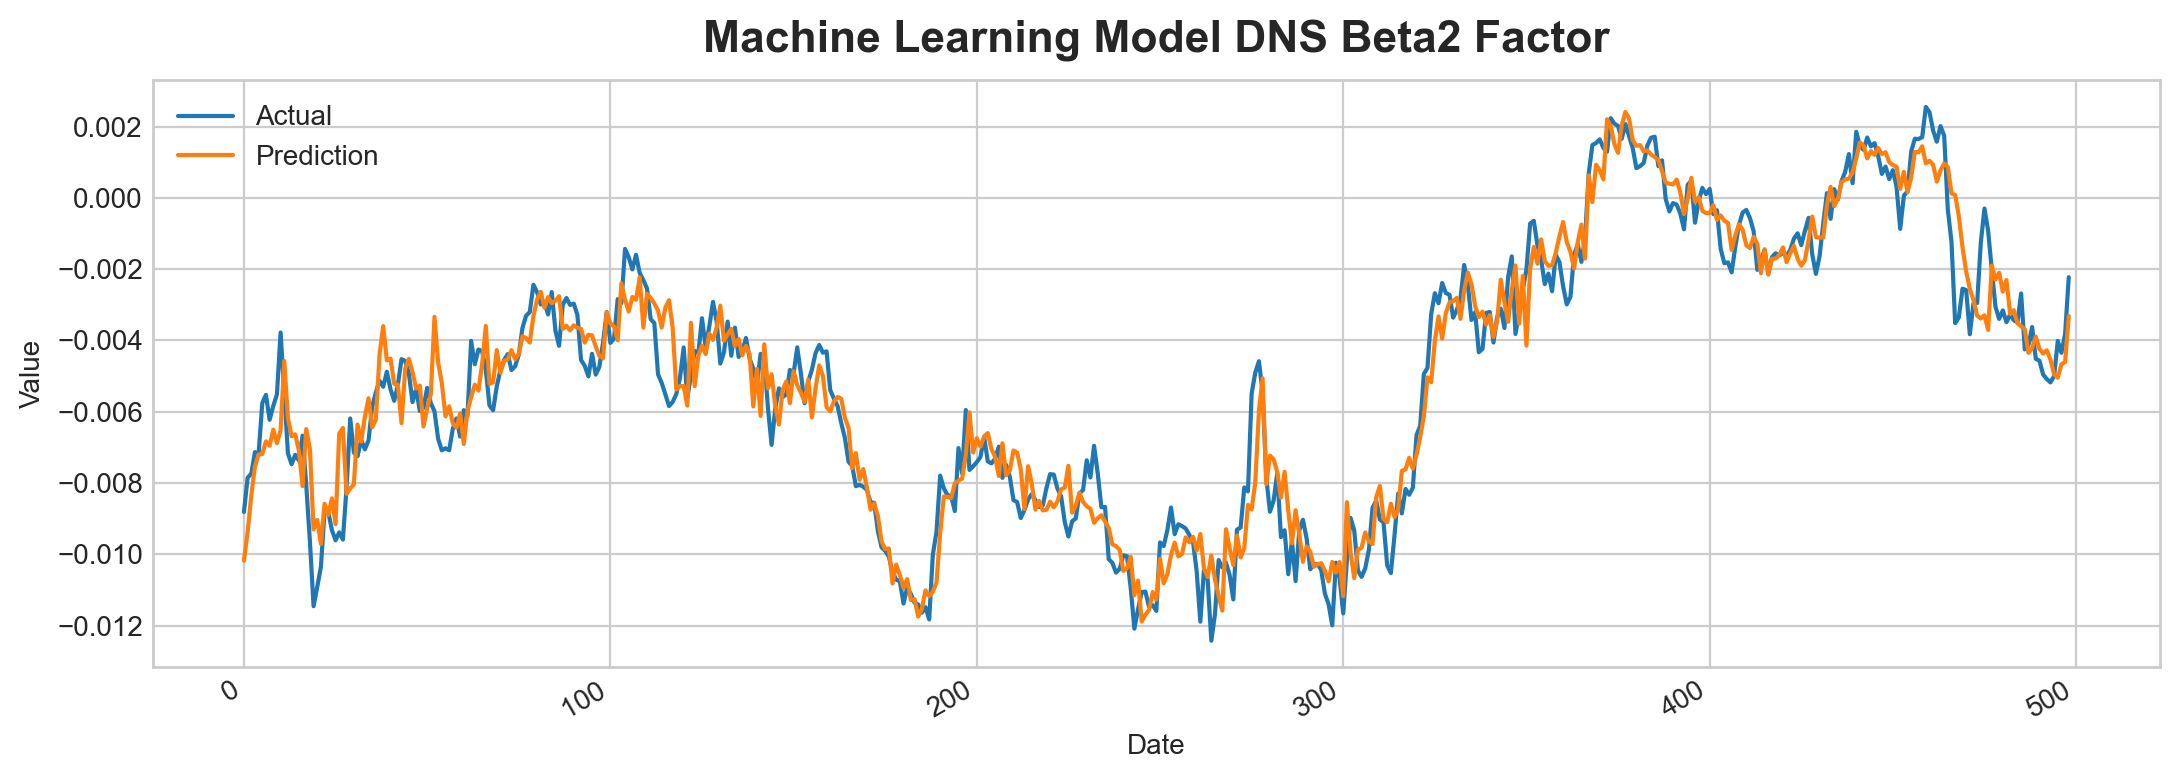

In [30]:
fig, ax = plt.subplots()

ax.plot(new_actual_dns_df['Beta2'], label="Actual")
ax.plot(pred_ml_dns_df['Beta2'], label="Prediction")
ax.set_xlabel('Date')
ax.set_ylabel('Value')

plt.title("Machine Learning Model DNS Beta2 Factor")
fig.autofmt_xdate()
plt.tight_layout()
plt.legend()

In [31]:
dns_ml_beta2_indicator_list = cal_indicator(new_actual_dns_df['Beta2'], pred_ml_dns_df['Beta2'])
dns_ml_beta2_indicator_list

[0.0007263349139388025, 35.23999091519574, 0.0009565652449633054]

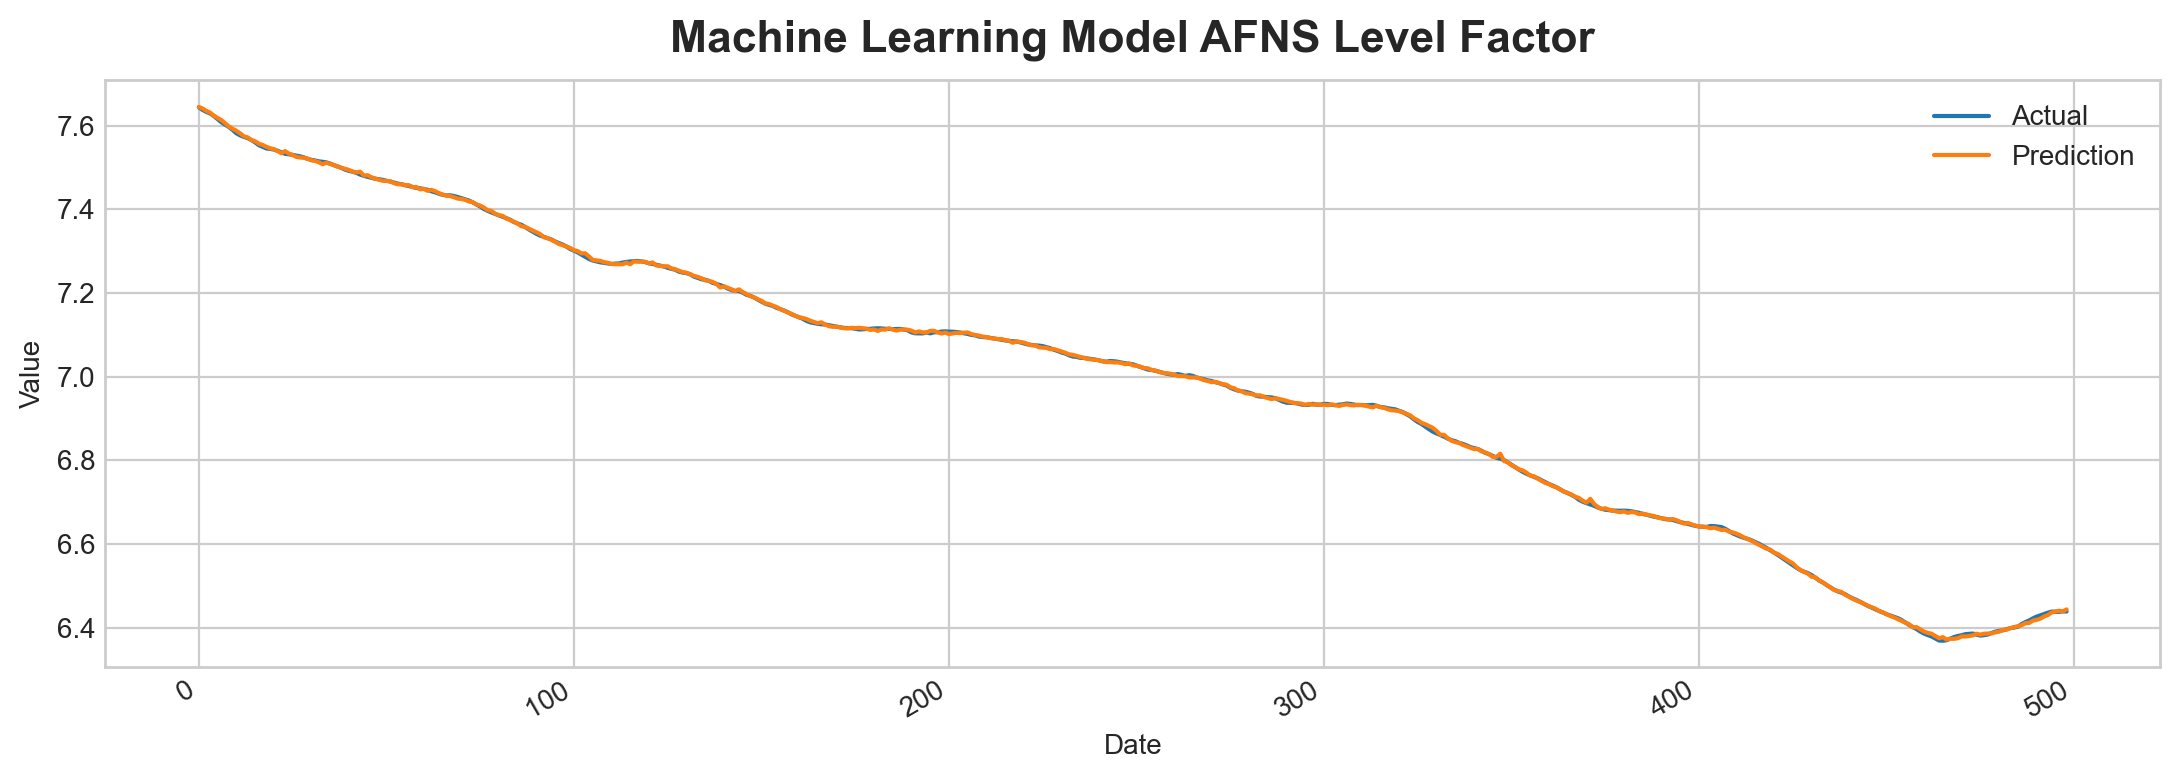

In [32]:
fig, ax = plt.subplots()

ax.plot(new_actual_afns_df['Level'], label="Actual")
ax.plot(pred_ml_afns_df['Level'], label="Prediction")
ax.set_xlabel('Date')
ax.set_ylabel('Value')

plt.title("Machine Learning Model AFNS Level Factor")
fig.autofmt_xdate()
plt.tight_layout()
plt.legend()

In [33]:
afns_ml_level_indicator_list = cal_indicator(new_actual_afns_df['Level'], pred_ml_afns_df['Level'])
afns_ml_level_indicator_list

[0.0020634667430035813, 0.029724996522354906, 0.002749899150510796]

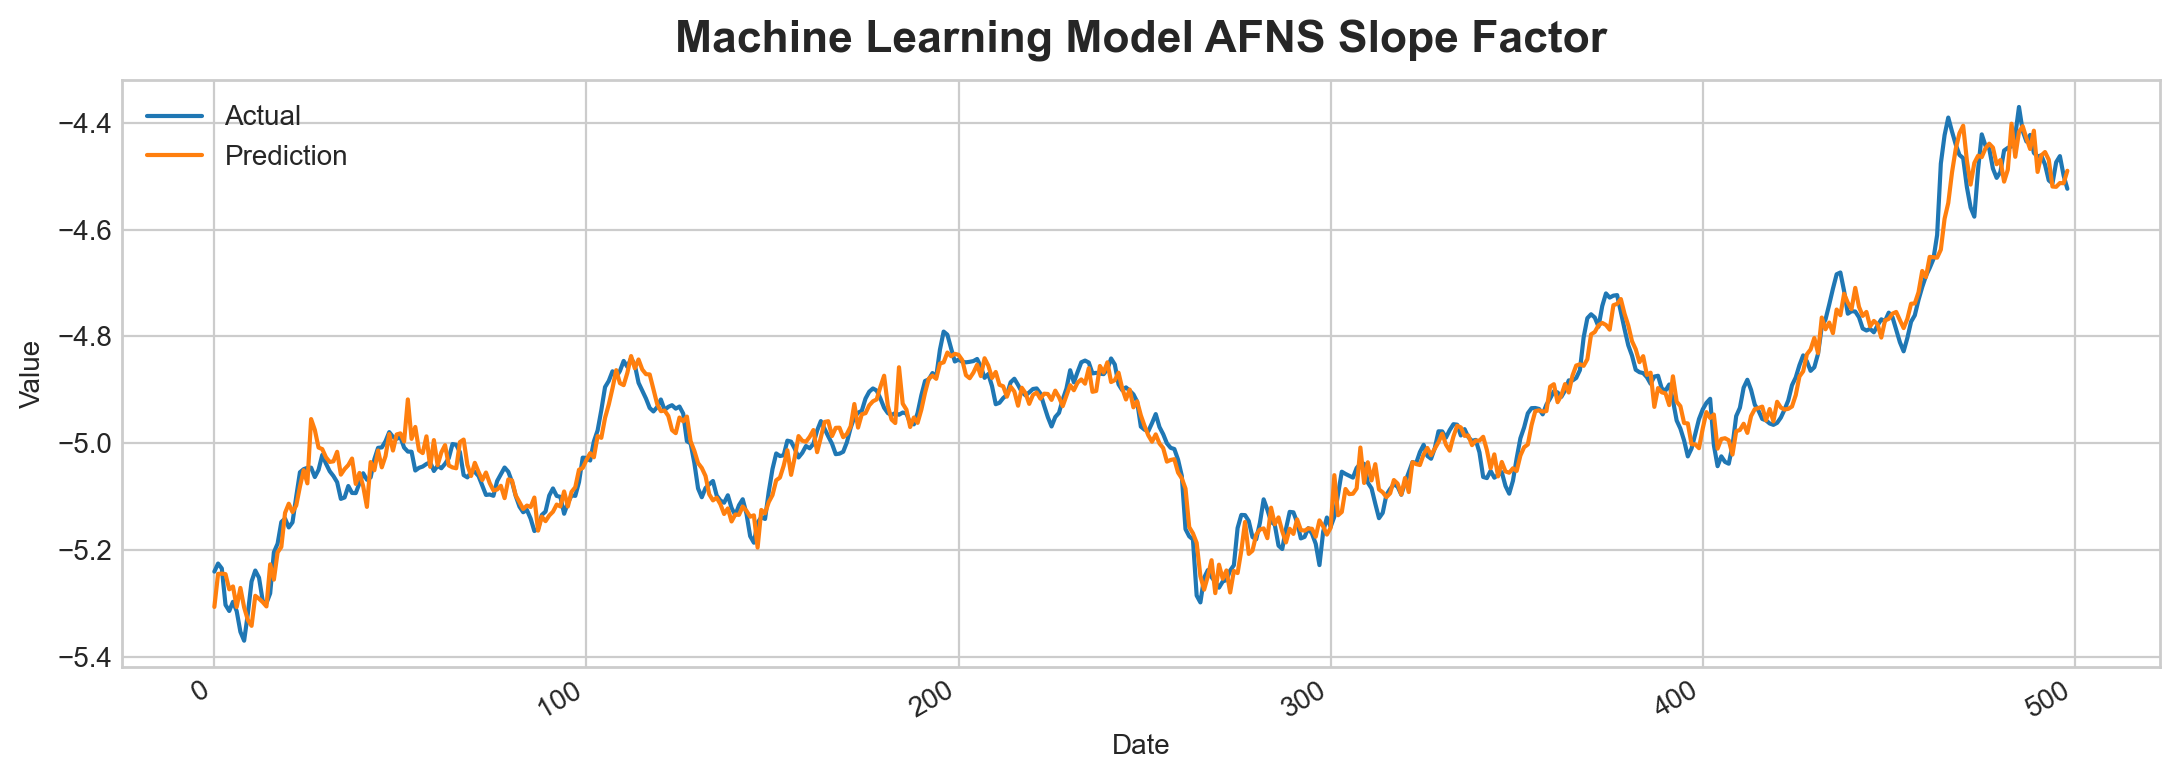

In [34]:
fig, ax = plt.subplots()

ax.plot(new_actual_afns_df['Slope'], label="Actual")
ax.plot(pred_ml_afns_df['Slope'], label="Prediction")
ax.set_xlabel('Date')
ax.set_ylabel('Value')

plt.title("Machine Learning Model AFNS Slope Factor")
fig.autofmt_xdate()
plt.tight_layout()
plt.legend()

In [35]:
afns_ml_slope_indicator_list = cal_indicator(new_actual_afns_df['Slope'], pred_ml_afns_df['Slope'])
afns_ml_slope_indicator_list

[0.028256497033411855, 0.5731956371570666, 0.03632834139605858]

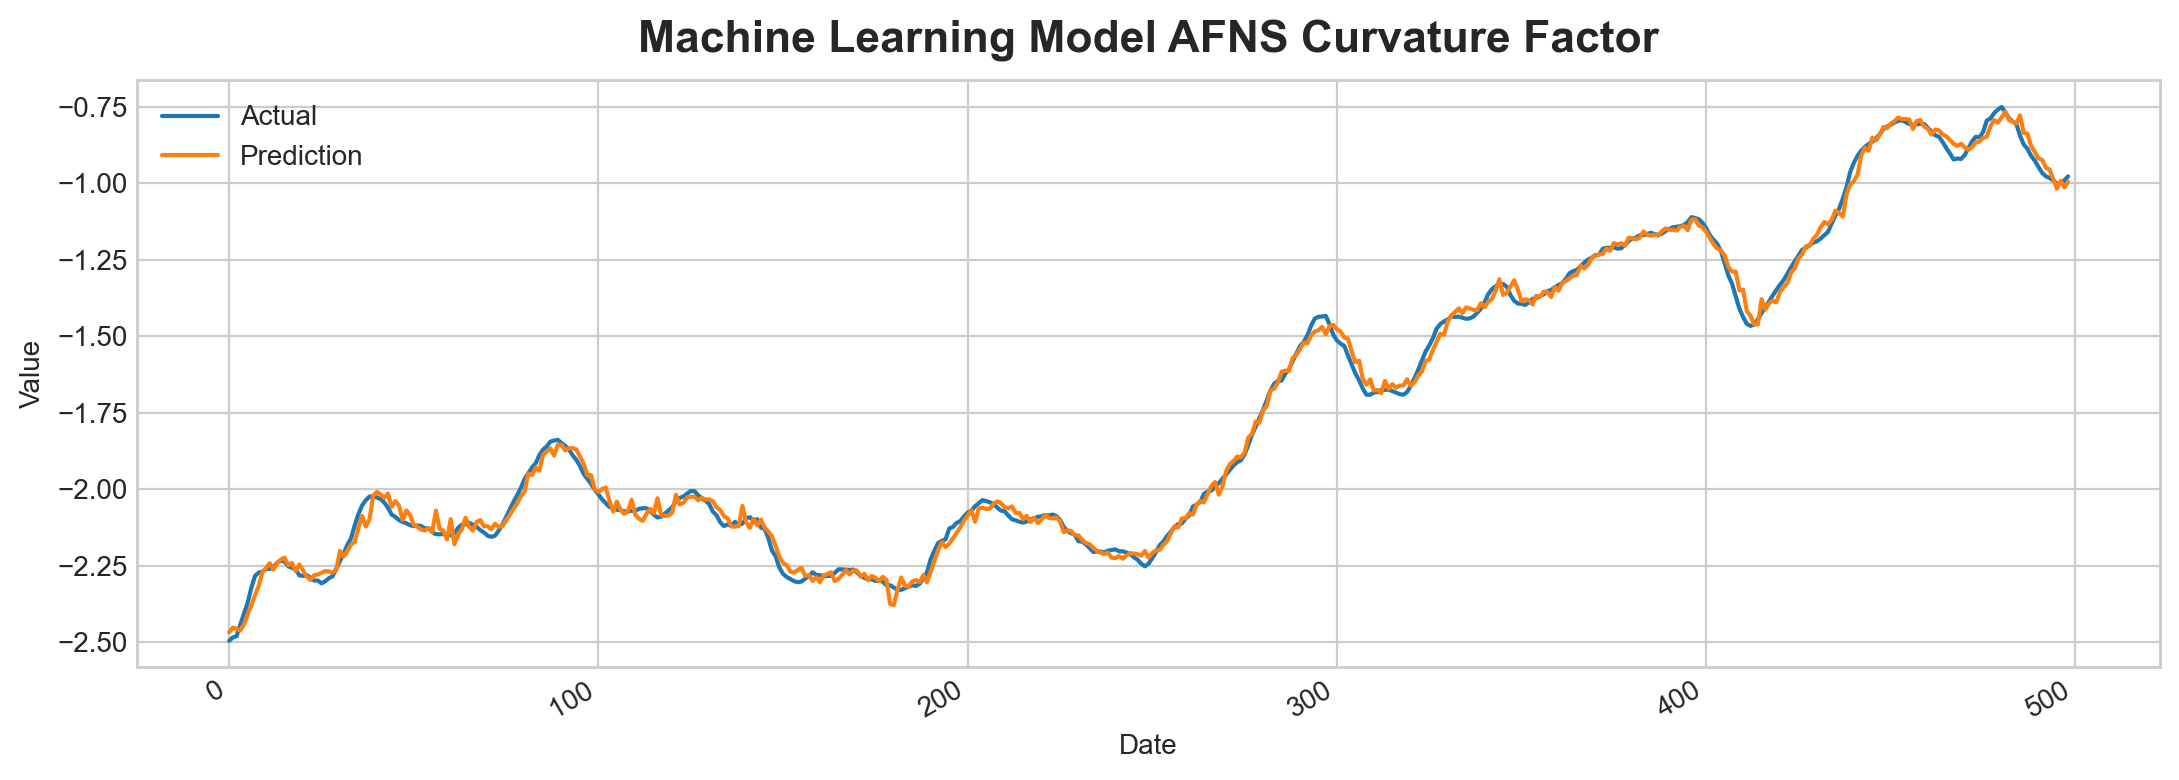

In [36]:
fig, ax = plt.subplots()

ax.plot(new_actual_afns_df['Curvature'], label="Actual")
ax.plot(pred_ml_afns_df['Curvature'], label="Prediction")
ax.set_xlabel('Date')
ax.set_ylabel('Value')

plt.title("Machine Learning Model AFNS Curvature Factor")
fig.autofmt_xdate()
plt.tight_layout()
plt.legend()

In [37]:
afns_ml_curvature_indicator_list = cal_indicator(new_actual_afns_df['Curvature'], pred_ml_afns_df['Curvature'])
afns_ml_curvature_indicator_list

[0.020321592567224208, 1.2959020794626226, 0.02601578682614412]

### 比较统计学模型跟机器学习模型

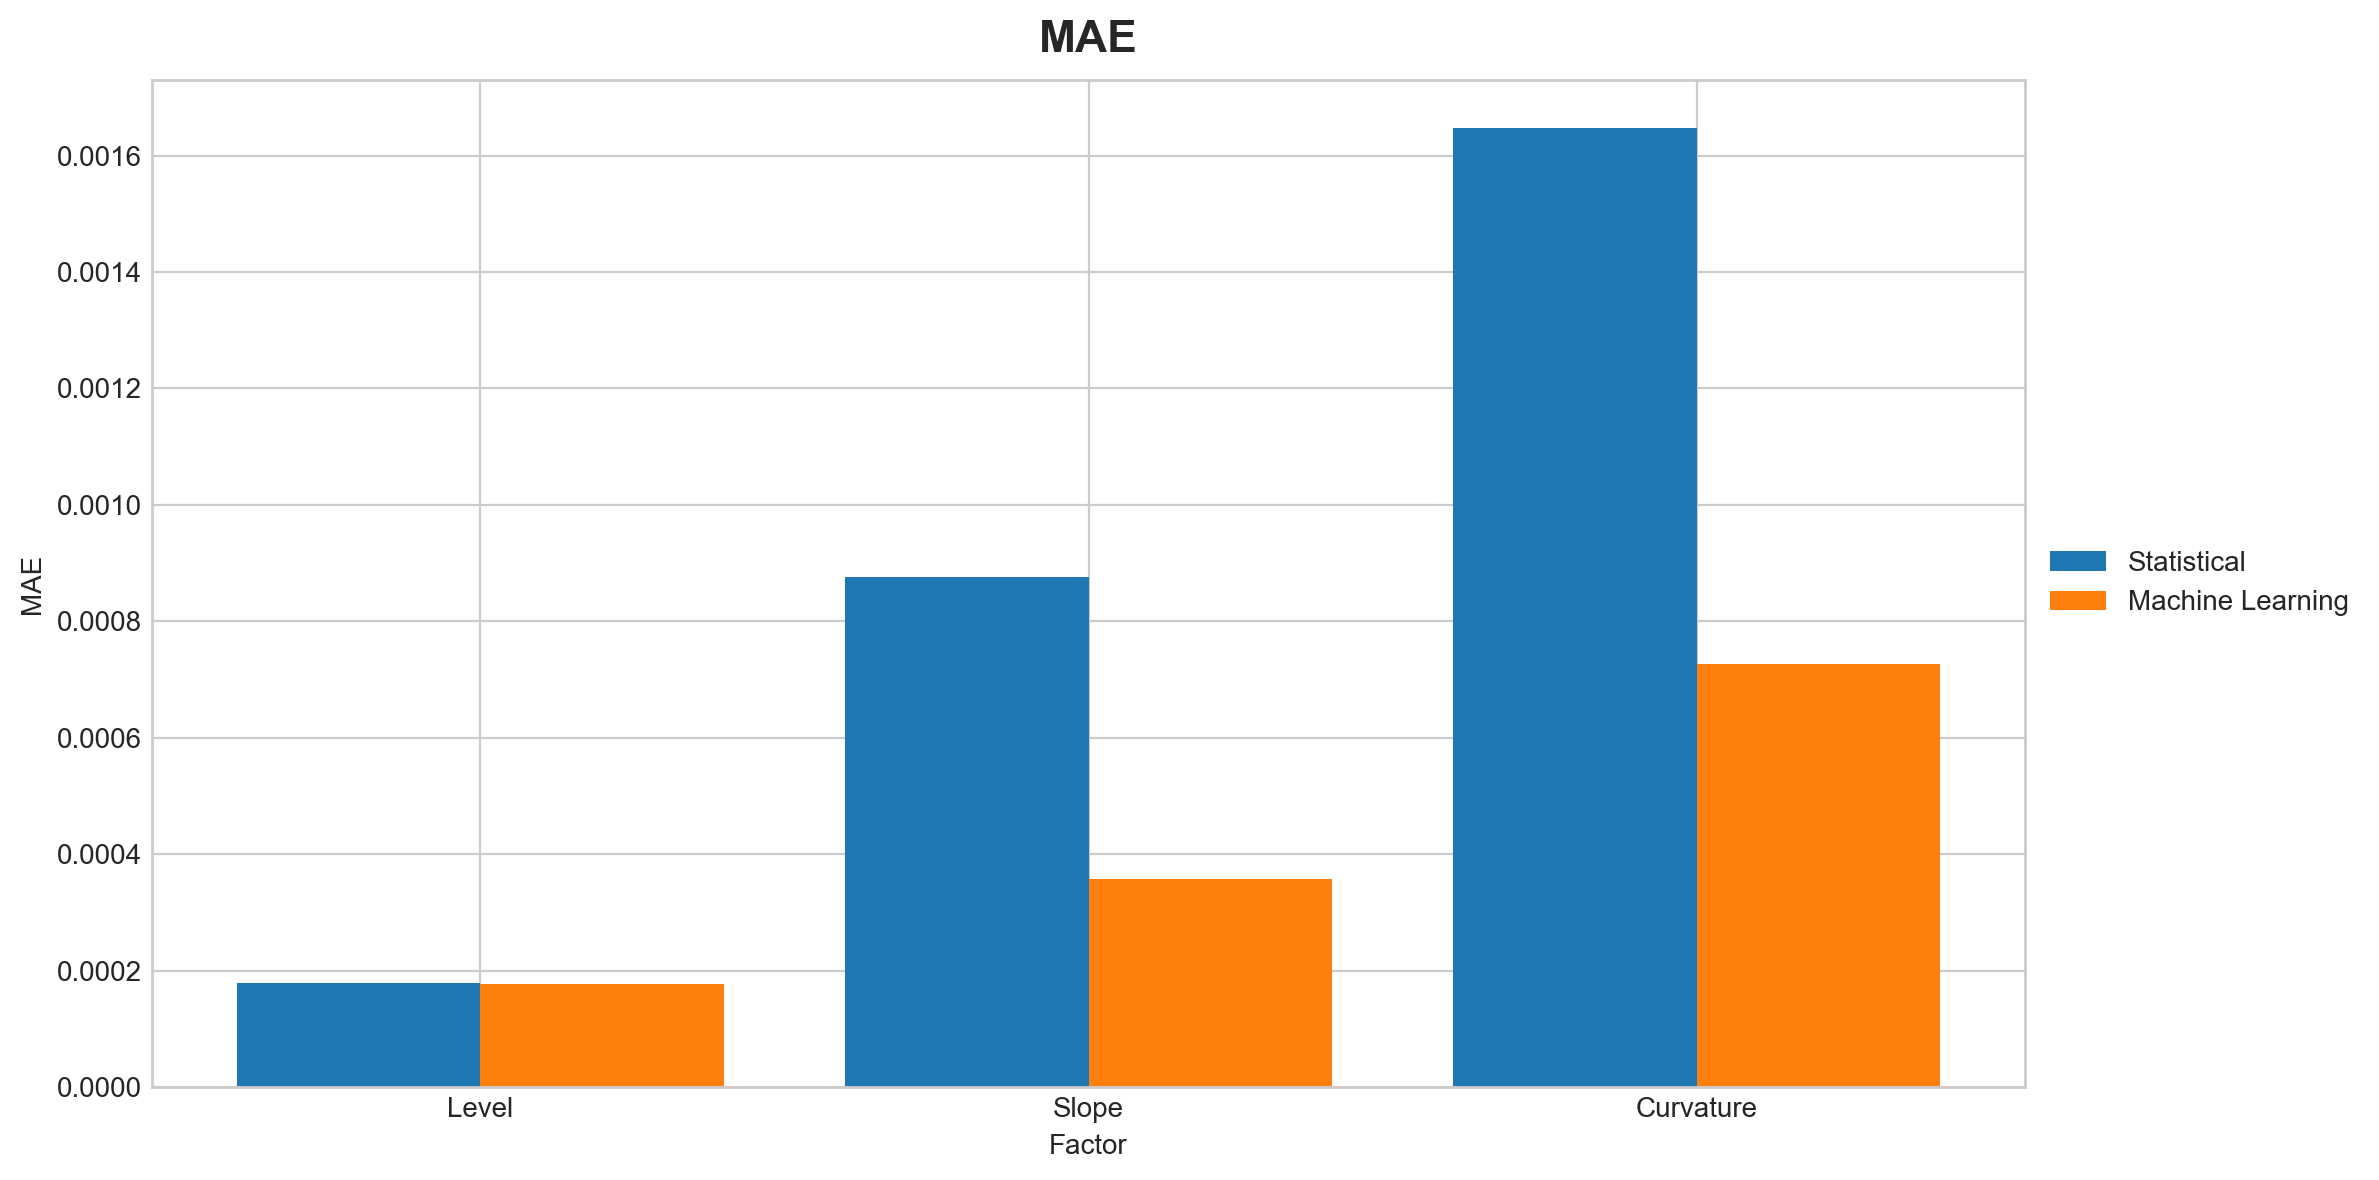

In [38]:
# MAE 可视化
# 

mae_dns_stats = [dns_stats_beta0_indicator_list[0], dns_stats_beta1_indicator_list[0], dns_stats_beta2_indicator_list[0]]
mae_dns_ml = [dns_ml_beta0_indicator_list[0], dns_ml_beta1_indicator_list[0], dns_ml_beta2_indicator_list[0]]

def plot_model_indicator(dns_stats, dns_ml, label_nums, label_name="MAE"):
    fig, ax = plt.subplots(figsize=(12, 6))

    label_list = ["Level", "Slope", "Curvature"]

    totalWidth=0.8 # 一组柱状体的宽度
    #labelNums=2 # 一组有两种类别
    barWidth=totalWidth/label_nums # 单个柱体的宽度
    seriesNums=len(label_list) # 一共有多少组

    ax.bar([x for x in range(seriesNums)], dns_stats, label="Statistical", width=barWidth)
    ax.bar([x+1*barWidth for x in range(seriesNums)], dns_ml, label="Machine Learning", width=barWidth)
    #ax.bar([x+2*barWidth for x in range(seriesNums)], anfs_error_df['MAPE'], label="AFNS", width=barWidth)

    plt.xticks([x+barWidth/2*(label_nums-1) for x in range(3)], label_list)
    plt.xlabel("Factor")
    plt.ylabel(label_name)
    plt.title(label_name)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    
plot_model_indicator(mae_dns_stats, mae_dns_ml, 2)

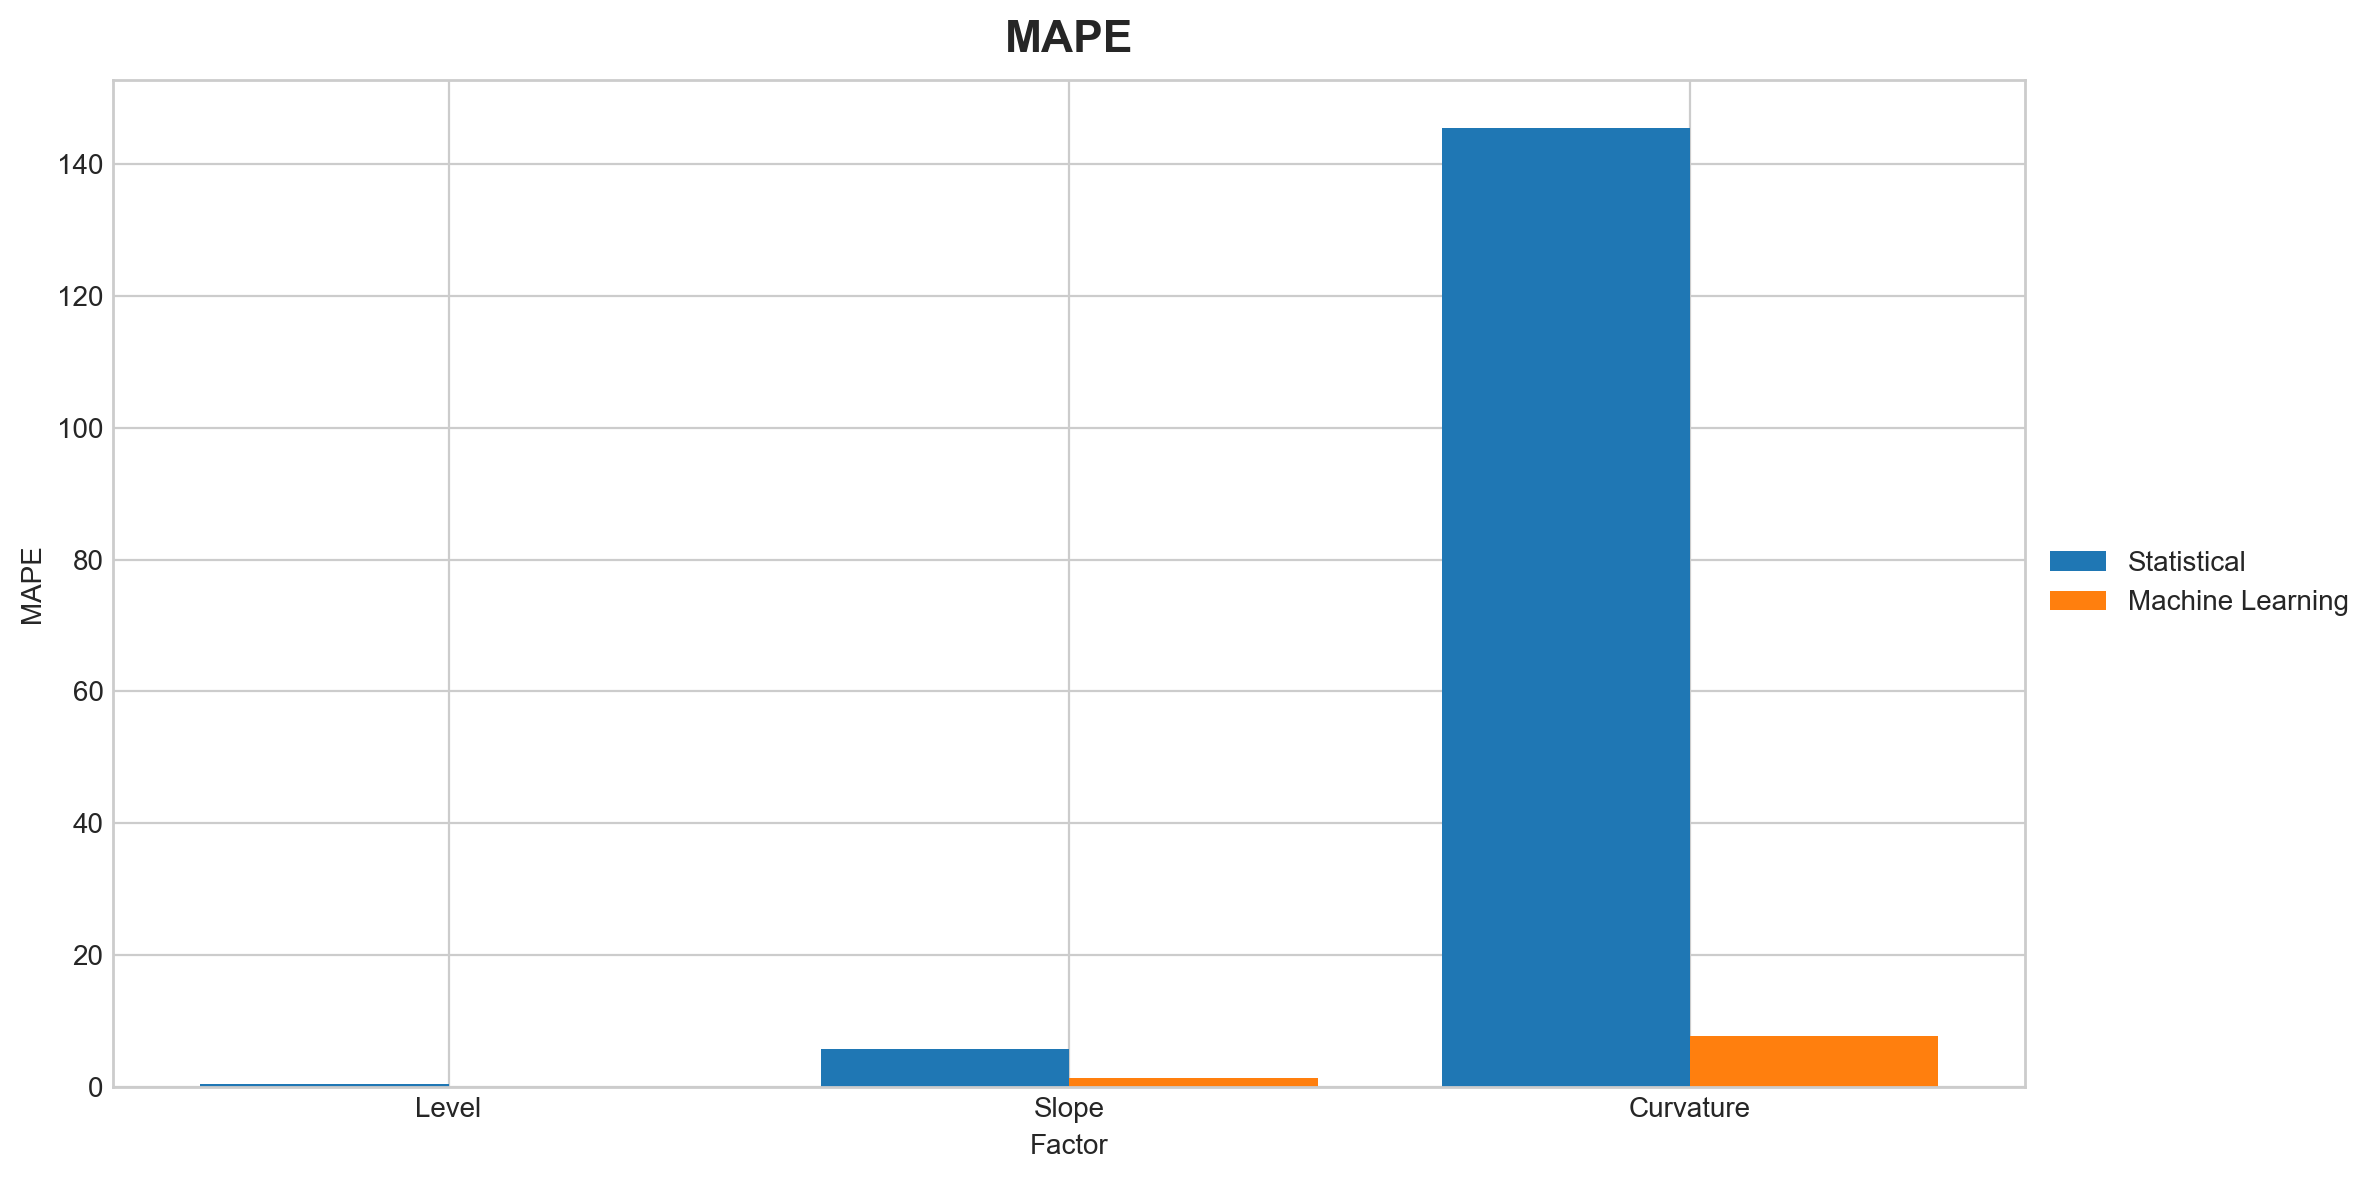

In [39]:
mape_dns_stats = [dns_stats_beta0_indicator_list[1], dns_stats_beta1_indicator_list[1], dns_stats_beta2_indicator_list[1]]
mape_afns_ml = [dns_ml_beta0_indicator_list[1], dns_ml_beta1_indicator_list[1], dns_ml_beta2_indicator_list[1]]
plot_model_indicator(mape_dns_stats, mape_afns_stats, 2, "MAPE")

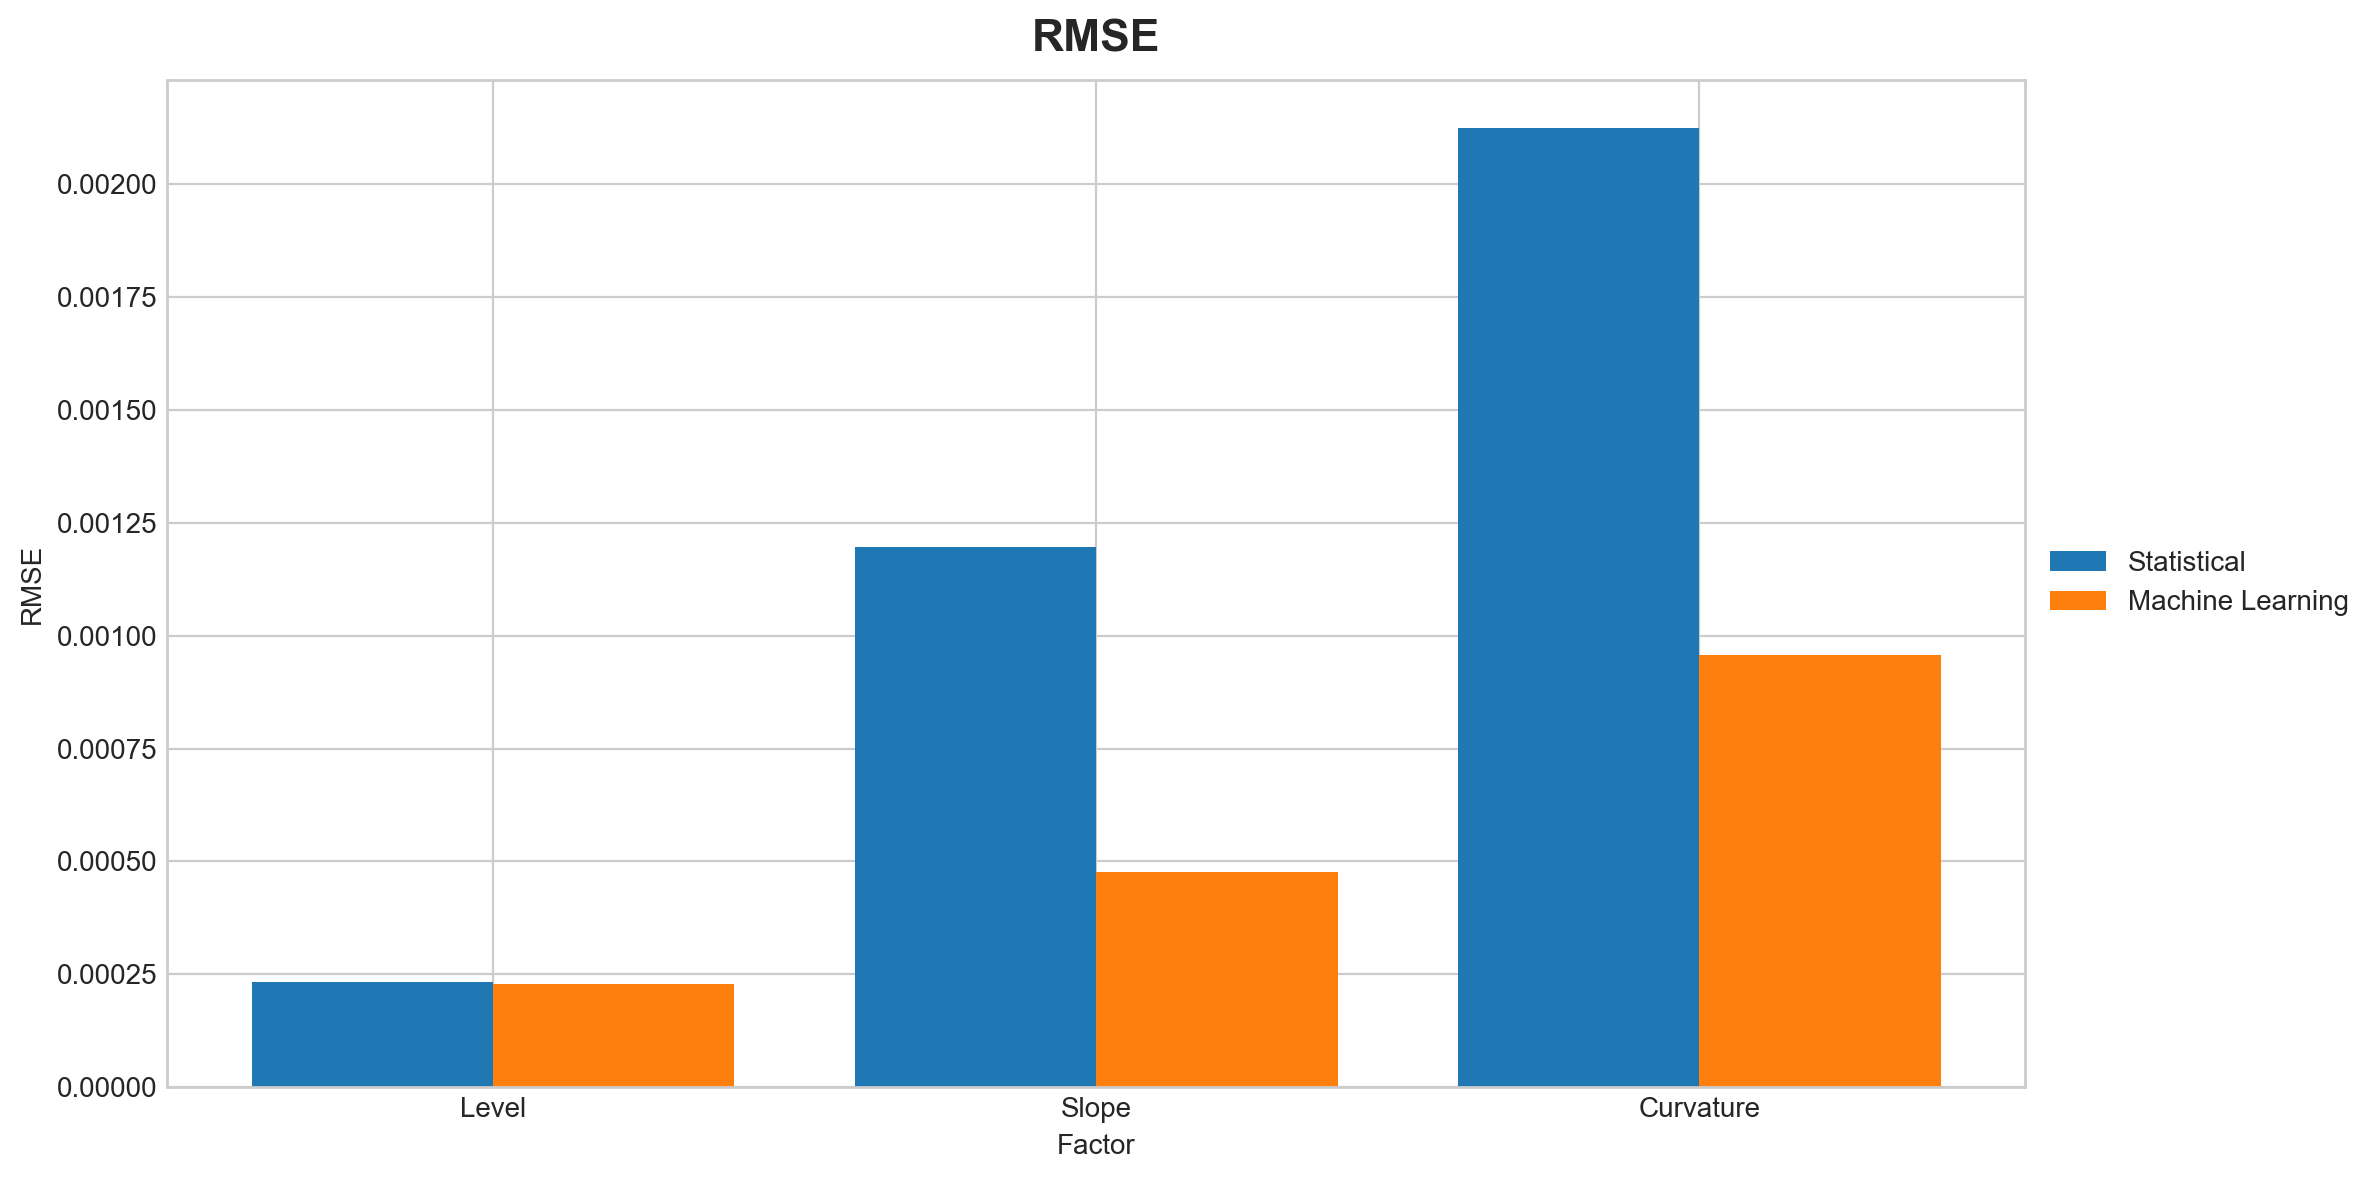

In [40]:
rmse_dns_stats = [dns_stats_beta0_indicator_list[2], dns_stats_beta1_indicator_list[2], dns_stats_beta2_indicator_list[2]]
mape_dns_ml = [dns_ml_beta0_indicator_list[2], dns_ml_beta1_indicator_list[2], dns_ml_beta2_indicator_list[2]]
plot_model_indicator(rmse_dns_stats, mape_dns_ml, 2, "RMSE")

## 2.关键期限预测-DNS

比较统计学方法跟机器学习方法

In [41]:
# 加载nelson siegel svensson模型代码
%run ../src/nelson_siegel_svensson/__init__.py
%run ../src/nelson_siegel_svensson/calibrate.py
%run ../src/nelson_siegel_svensson/cli.py
%run ../src/nelson_siegel_svensson/ns.py
%run ../src/nelson_siegel_svensson/nss.py

Usage: cli.py [OPTIONS] COMMAND [ARGS]...

  Commandline interface for nelson_siegel_svensson.

Options:
  --help  Show this message and exit.

Commands:
  calibrate  Calibrate a curve to the given data points.
  evaluate   Evaluate a curve at given points.
  plot       Plot a curve at given points.


<Figure size 1100x400 with 0 Axes>

In [42]:
# 获取真实值
actual_dns_ytm_df = pd.read_csv(actual_dns_ytm_file)
actual_dns_ytm_df['Date'] = pd.to_datetime(actual_dns_ytm_df['Date'])
actual_dns_ytm_df

# 获取模型值
model_dns_ytm_df = pd.read_csv(model_dns_ytm_file)
model_dns_ytm_df['Date'] = pd.to_datetime(model_dns_ytm_df['Date'])

print(actual_dns_ytm_df.shape, model_dns_ytm_df.shape)

(2744, 15) (2744, 15)


In [43]:
# 对其数据
new_actual_dns_ytm_df = datetime_df.merge(actual_dns_ytm_df, on ='Date')
new_actual_dns_ytm_df

new_model_dns_ytm_df = datetime_df.merge(model_dns_ytm_df, on ='Date')
new_model_dns_ytm_df

new_model_dns_ytm_df

,Date,6M,1Y,2Y,3Y,4Y,5Y,6Y,7Y,8Y,9Y,10Y,15Y,20Y,30Y
0,2021-01-04,2.461476,2.525581,2.652676,2.773103,2.883554,2.982826,3.070922,3.148493,3.216499,3.276007,3.328074,3.507787,3.608088,3.711315
1,2021-01-05,2.403081,2.479132,2.623889,2.755983,2.874077,2.978302,3.069556,3.149096,3.218287,3.278466,3.330871,3.510337,3.609851,3.712071
2,2021-01-06,2.402092,2.476628,2.618607,2.748254,2.864219,2.966600,3.056264,3.134433,3.202443,3.261601,3.313123,3.489592,3.587457,3.687987
3,2021-01-07,2.257002,2.349113,2.518941,2.669086,2.800300,2.914159,3.012574,3.097505,3.170812,3.234182,3.289101,3.475647,3.578382,3.683696
4,2021-01-08,2.257505,2.350742,2.522551,2.674363,2.806978,2.922018,3.021429,3.107203,3.181227,3.245210,3.300653,3.488954,3.592642,3.698927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,2022-12-26,2.180359,2.243047,2.358972,2.461774,2.551816,2.630083,2.697821,2.756338,2.806888,2.850613,2.888526,3.017419,3.088455,3.161289
495,2022-12-27,2.204023,2.271169,2.392231,2.496784,2.586553,2.663396,2.729111,2.785347,2.833564,2.875023,2.910800,3.031452,3.097489,3.165058
496,2022-12-28,2.224025,2.287330,2.402763,2.503654,2.591071,2.666432,2.731239,2.786944,2.834874,2.876203,2.911948,3.032954,3.099403,3.167461
497,2022-12-29,2.152341,2.223857,2.351752,2.461236,2.554598,2.634087,2.701774,2.759500,2.808858,2.851204,2.887682,3.010322,3.077271,3.145718


In [44]:
# 获取统计方法获取DNS因子的预测值
pred_stats_ytm_df = pd.DataFrame(columns= model_dns_ytm_df.columns)

tau = actual_dns_df['Tau'].unique()[0]
time_list = [0.50, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30]
tenor_list = ['6M', '1Y', '2Y', '3Y', '4Y', '5Y', '6Y', '7Y', 
              '8Y', '9Y', '10Y', '15Y', '20Y', '30Y']
    
for i in range(pred_stats_dns_df.shape[0]):
    date = pred_stats_dns_df['Date'][i]
    beta0 = pred_stats_dns_df['Beta0'][i]
    beta1 = pred_stats_dns_df['Beta1'][i]
    beta2 = pred_stats_dns_df['Beta2'][i]
    
    #print(beta0, beta1, beta2, tau)
    curve = NelsonSiegelCurve(beta0, beta1, beta2, tau)
    
    model_value_list = [date]
    for temp_time in time_list:
        temp_time_value = curve(temp_time) * 100
        model_value_list.append(temp_time_value)
        
    pred_stats_ytm_df.loc[len(pred_stats_ytm_df.index)] = model_value_list
    
pred_stats_ytm_df   

,Date,6M,1Y,2Y,3Y,4Y,5Y,6Y,7Y,8Y,9Y,10Y,15Y,20Y,30Y
0,2021-01-04,2.294424,2.373871,2.526298,2.666447,2.792407,2.903998,3.001983,3.087575,3.162156,3.227109,3.283729,3.477965,3.585824,3.696662
1,2021-01-05,2.900062,2.898645,2.924977,2.974468,3.034651,3.098022,3.160239,3.218956,3.273056,3.322164,3.366332,3.525640,3.617694,3.713388
2,2021-01-06,2.587940,2.660438,2.795366,2.915799,3.021786,3.114241,3.194479,3.263944,3.324050,3.376111,3.421299,3.575197,3.660140,3.747274
3,2021-01-07,2.563337,2.617882,2.729581,2.838419,2.940048,3.032524,3.115319,3.188703,3.253360,3.310152,3.359989,3.532846,3.629704,3.729504
4,2021-01-08,2.012175,2.142394,2.370282,2.560710,2.719989,2.853502,2.965767,3.060534,3.140889,3.209365,3.268029,3.463389,3.569158,3.677020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,2022-12-26,2.143979,2.222352,2.360540,2.476998,2.575081,2.657762,2.727604,2.786782,2.837116,2.880117,2.917031,3.040399,3.107399,3.175790
495,2022-12-27,2.135557,2.203016,2.326481,2.434811,2.528951,2.610289,2.680359,2.740671,2.792622,2.837456,2.876260,3.007779,3.080073,3.154140
496,2022-12-28,2.212526,2.276866,2.394233,2.496858,2.585808,2.662508,2.728481,2.785196,2.834001,2.876088,2.912492,3.035745,3.103436,3.172768
497,2022-12-29,2.236146,2.305044,2.427661,2.532074,2.620742,2.695984,2.759886,2.814267,2.860685,2.900454,2.934673,3.049496,3.112074,3.176019


In [45]:
# 获取统计方法获取DNS因子的预测值
pred_ml_ytm_df = pd.DataFrame(columns= model_dns_ytm_df.columns)

tau = actual_dns_df['Tau'].unique()[0]
time_list = [0.50, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30]
tenor_list = ['6M', '1Y', '2Y', '3Y', '4Y', '5Y', '6Y', '7Y', 
              '8Y', '9Y', '10Y', '15Y', '20Y', '30Y']
    
for i in range(pred_ml_dns_df.shape[0]):
    date = pred_ml_dns_df['Date'][i]
    beta0 = pred_ml_dns_df['Beta0'][i]
    beta1 = pred_ml_dns_df['Beta1'][i]
    beta2 = pred_ml_dns_df['Beta2'][i]
    
    #print(beta0, beta1, beta2, tau)
    curve = NelsonSiegelCurve(beta0, beta1, beta2, tau)
    
    model_value_list = [date]
    for temp_time in time_list:
        temp_time_value = curve(temp_time) * 100
        model_value_list.append(temp_time_value)
        
    pred_ml_ytm_df.loc[len(pred_ml_ytm_df.index)] = model_value_list
    
pred_ml_ytm_df 

,Date,6M,1Y,2Y,3Y,4Y,5Y,6Y,7Y,8Y,9Y,10Y,15Y,20Y,30Y
0,2021-01-04,2.447838,2.504829,2.623239,2.740002,2.849845,2.950296,3.040551,3.120754,3.191556,3.253840,3.308558,3.498700,3.605406,3.715402
1,2021-01-05,2.434945,2.498350,2.625609,2.747500,2.860082,2.961764,3.052316,3.132260,3.202486,3.264031,3.317944,3.504395,3.608624,3.715945
2,2021-01-06,2.391325,2.465398,2.608027,2.739612,2.858150,2.963343,3.055824,3.136686,3.207198,3.268641,3.322226,3.506186,3.608402,3.713461
3,2021-01-07,2.376223,2.456887,2.608589,2.745409,2.866722,2.973139,3.065887,3.146445,3.216330,3.276983,3.329713,3.509779,3.609391,3.711640
4,2021-01-08,2.318749,2.406427,2.569033,2.713655,2.840600,2.951121,3.046896,3.129713,3.201309,3.263277,3.317033,3.499936,3.600807,3.704253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,2022-12-26,2.200461,2.262606,2.377503,2.479372,2.568582,2.646116,2.713215,2.771175,2.821241,2.864546,2.902093,3.029734,3.100077,3.172199
495,2022-12-27,2.196451,2.257557,2.370947,2.471853,2.560462,2.637631,2.704519,2.762369,2.812388,2.855685,2.893248,3.021075,3.091580,3.163889
496,2022-12-28,2.194745,2.258602,2.375705,2.478661,2.568266,2.645776,2.712608,2.770174,2.819787,2.862623,2.899711,3.025488,3.094661,3.165542
497,2022-12-29,2.205342,2.269042,2.385732,2.488213,2.577330,2.654370,2.720764,2.777931,2.827185,2.869702,2.906505,3.031277,3.099879,3.170168


In [46]:
# 比较统计模型跟机器学习模型
tenor_list = ['6M', '1Y', '2Y', '3Y', '4Y', '5Y', '6Y', '7Y', 
              '8Y', '9Y', '10Y', '15Y', '20Y', '30Y']


stats_mae_list = []
stats_mape_list = []
stats_rmse_list = []

ml_mae_list = []
ml_mape_list = []
ml_rmse_list = []

for tenor in tenor_list:
    actual_value = new_actual_dns_ytm_df[tenor]
    pred_stats_value = pred_stats_ytm_df[tenor]
    pred_ml_value = pred_ml_ytm_df[tenor]
    
    
    pred_stats_mae = mae(actual_value, pred_stats_value)
    pred_ml_mae = mae(actual_value, pred_ml_value)
    
    pred_stats_mape = mape(actual_value, pred_stats_value)
    pred_ml_mape = mape(actual_value, pred_ml_value)
    
    pred_stats_rmse = rmse(actual_value, pred_stats_value)
    pred_ml_rmse = rmse(actual_value, pred_ml_value)
    
    
    stats_mae_list.append(pred_stats_mae)
    stats_mape_list.append(pred_stats_mape)
    stats_rmse_list.append(pred_stats_rmse)
    
    ml_mae_list.append(pred_ml_mae)
    ml_mape_list.append(pred_ml_mape)
    ml_rmse_list.append(pred_ml_rmse)
    
    


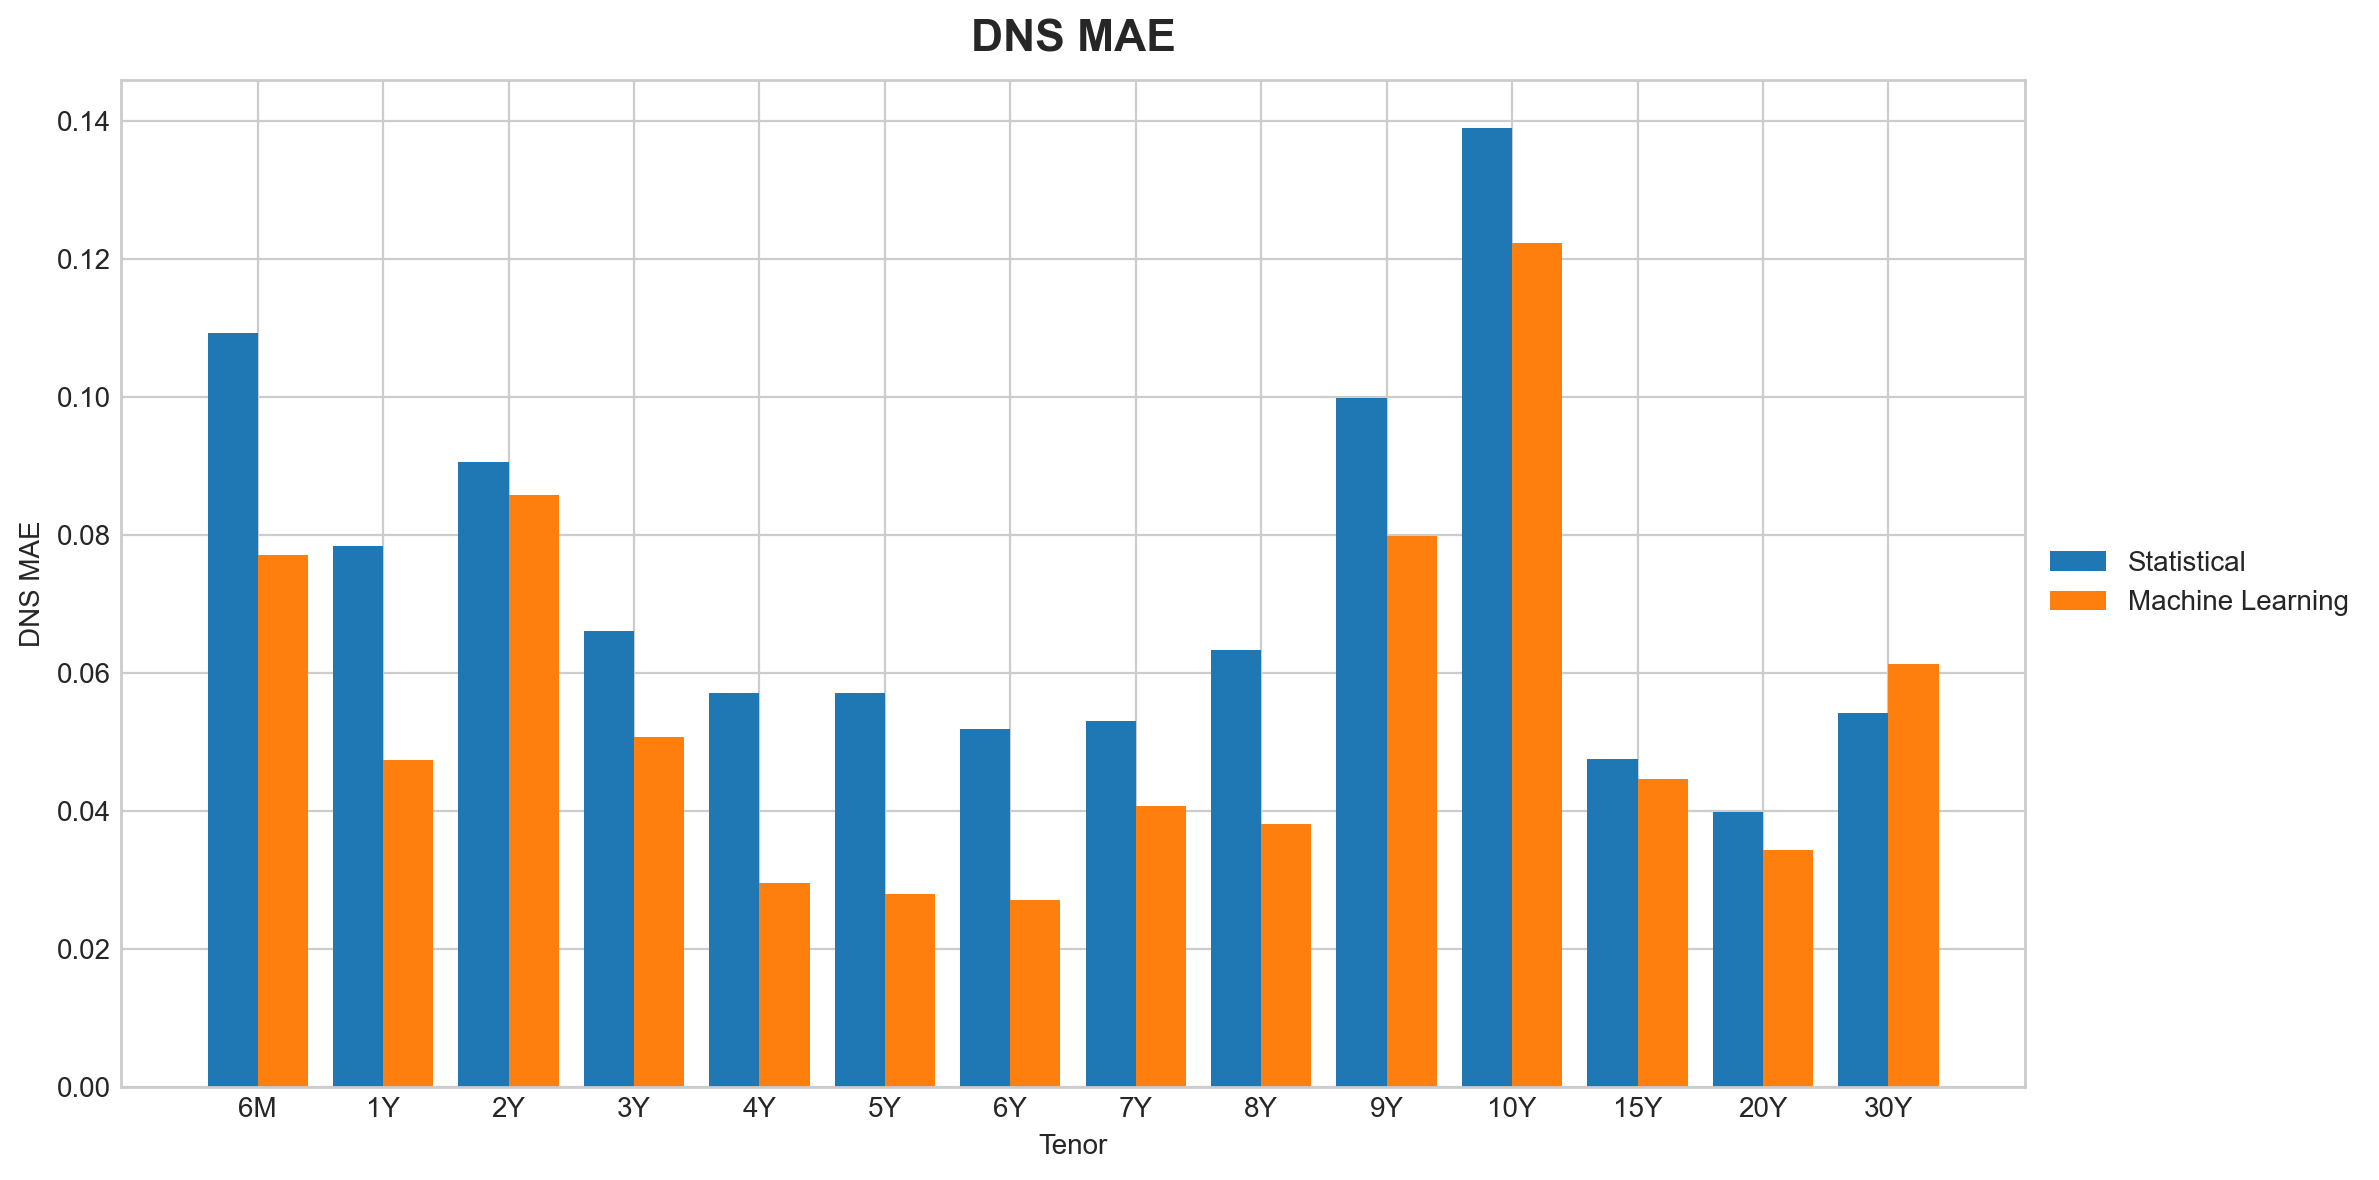

In [47]:
# 可视化


def plot_model_pred(data_list, label):
    fig, ax = plt.subplots(figsize=(12, 6))
    tenor_list = ['6M', '1Y', '2Y', '3Y', '4Y', '5Y', '6Y', '7Y', 
                  '8Y', '9Y', '10Y', '15Y', '20Y', '30Y']

    totalWidth=0.8 # 一组柱状体的宽度
    labelNums=2 # 一组有两种类别
    barWidth=totalWidth/labelNums # 单个柱体的宽度
    seriesNums=len(tenor_list) # 一共有多少组

    ax.bar([x for x in range(seriesNums)], data_list[0], label="Statistical", width=barWidth)
    ax.bar([x+1*barWidth for x in range(seriesNums)], data_list[1], label="Machine Learning", width=barWidth)


    plt.xticks([x+barWidth/2*(labelNums-1) for x in range(seriesNums)], tenor_list)
    plt.xlabel("Tenor")
    plt.ylabel(label)
    plt.title(label)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    
plot_model_pred(data_list= [stats_mae_list, ml_mae_list], label="DNS MAE")

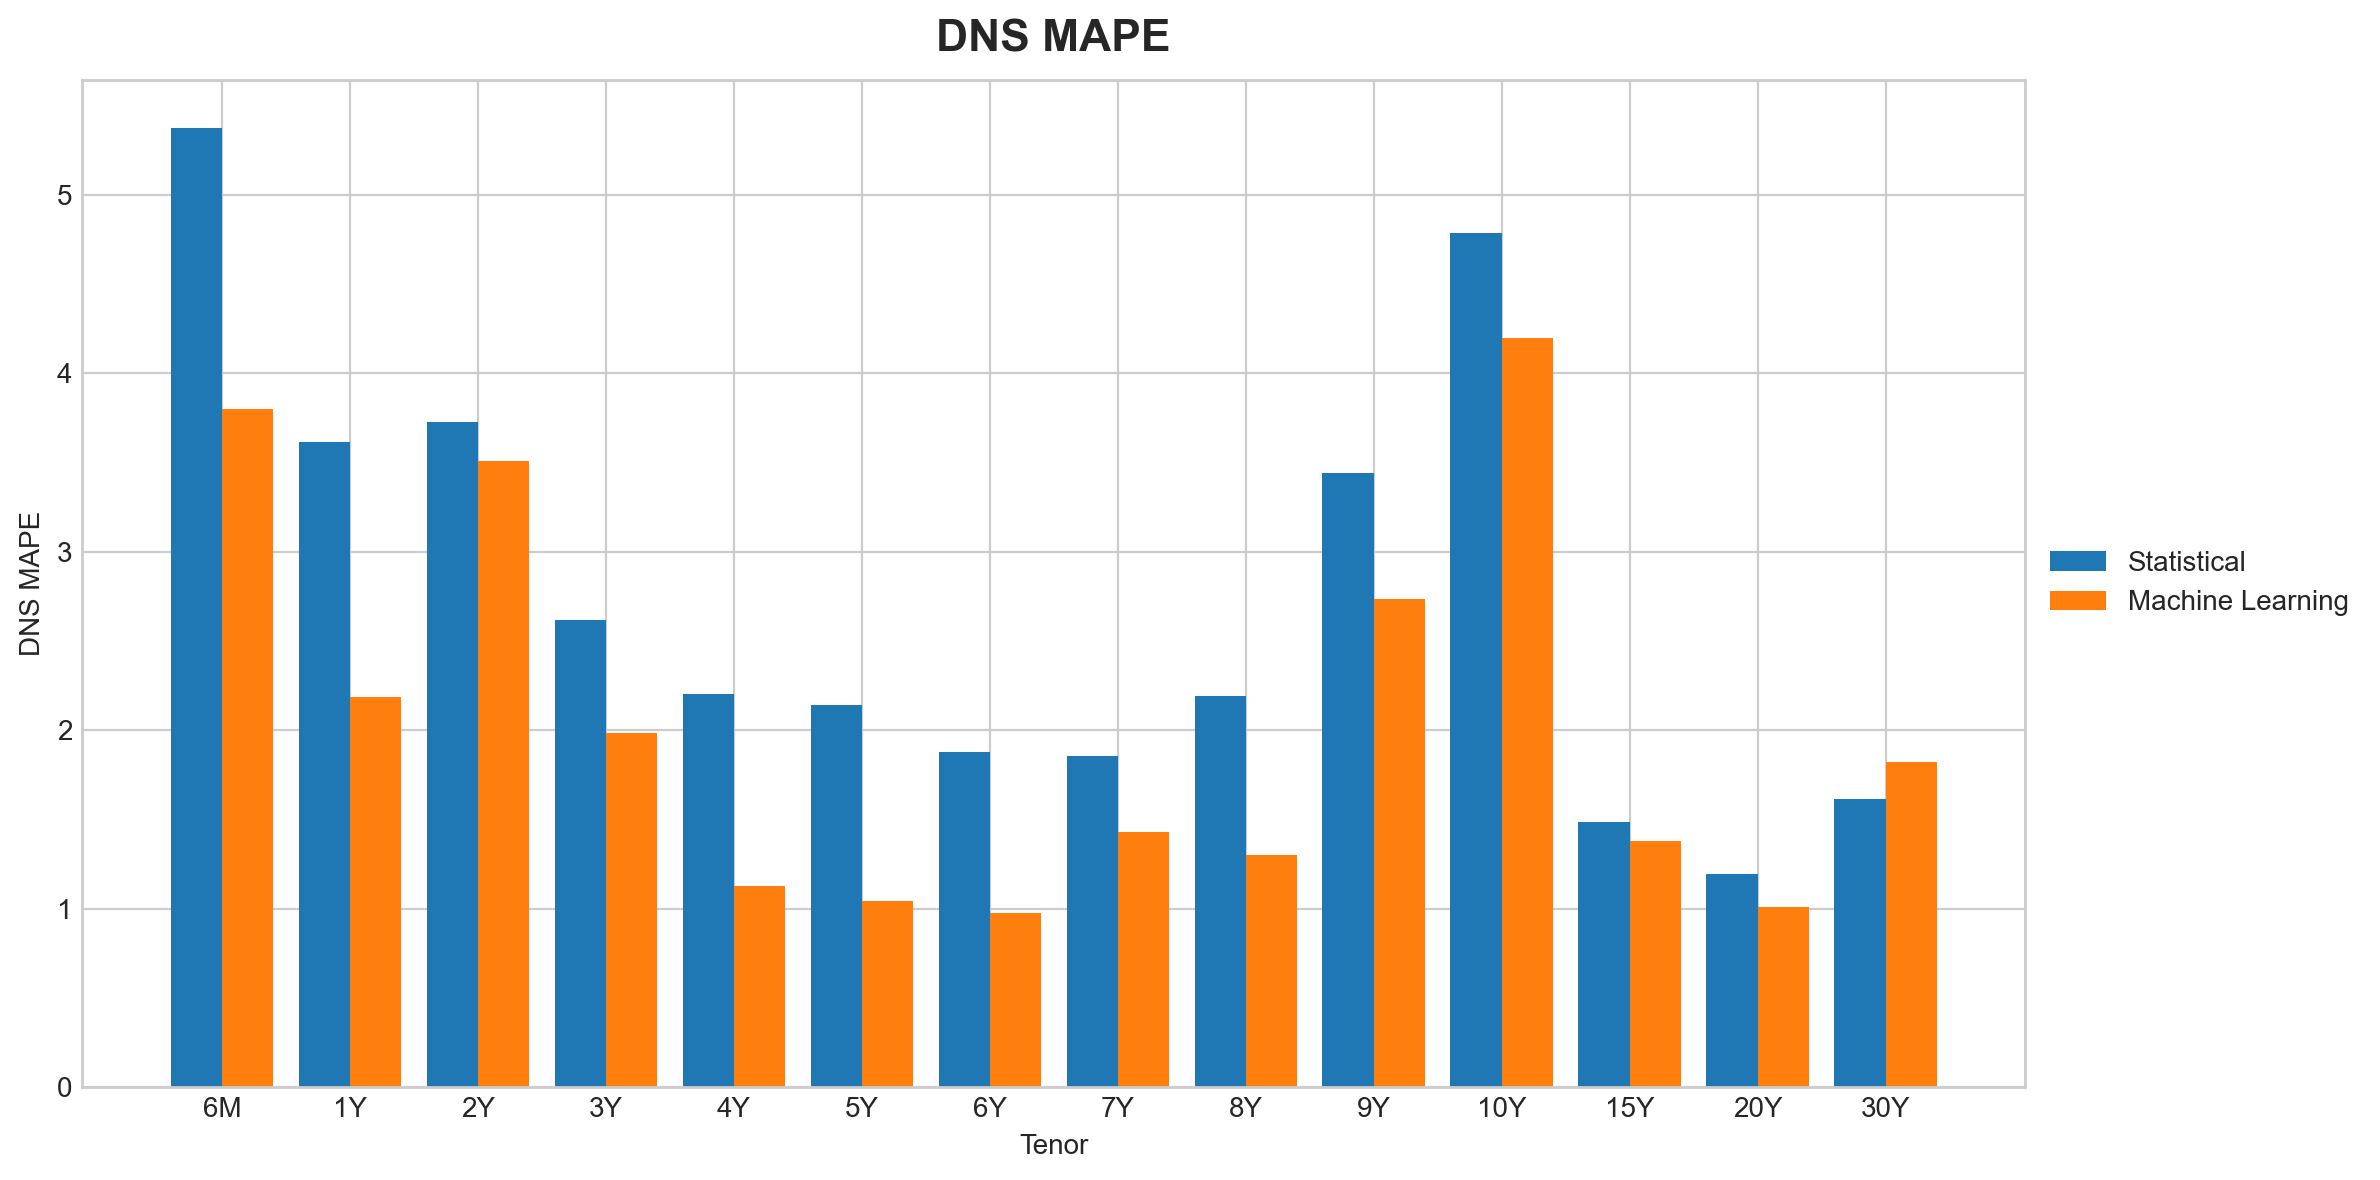

In [48]:
plot_model_pred(data_list= [stats_mape_list, ml_mape_list], label="DNS MAPE")

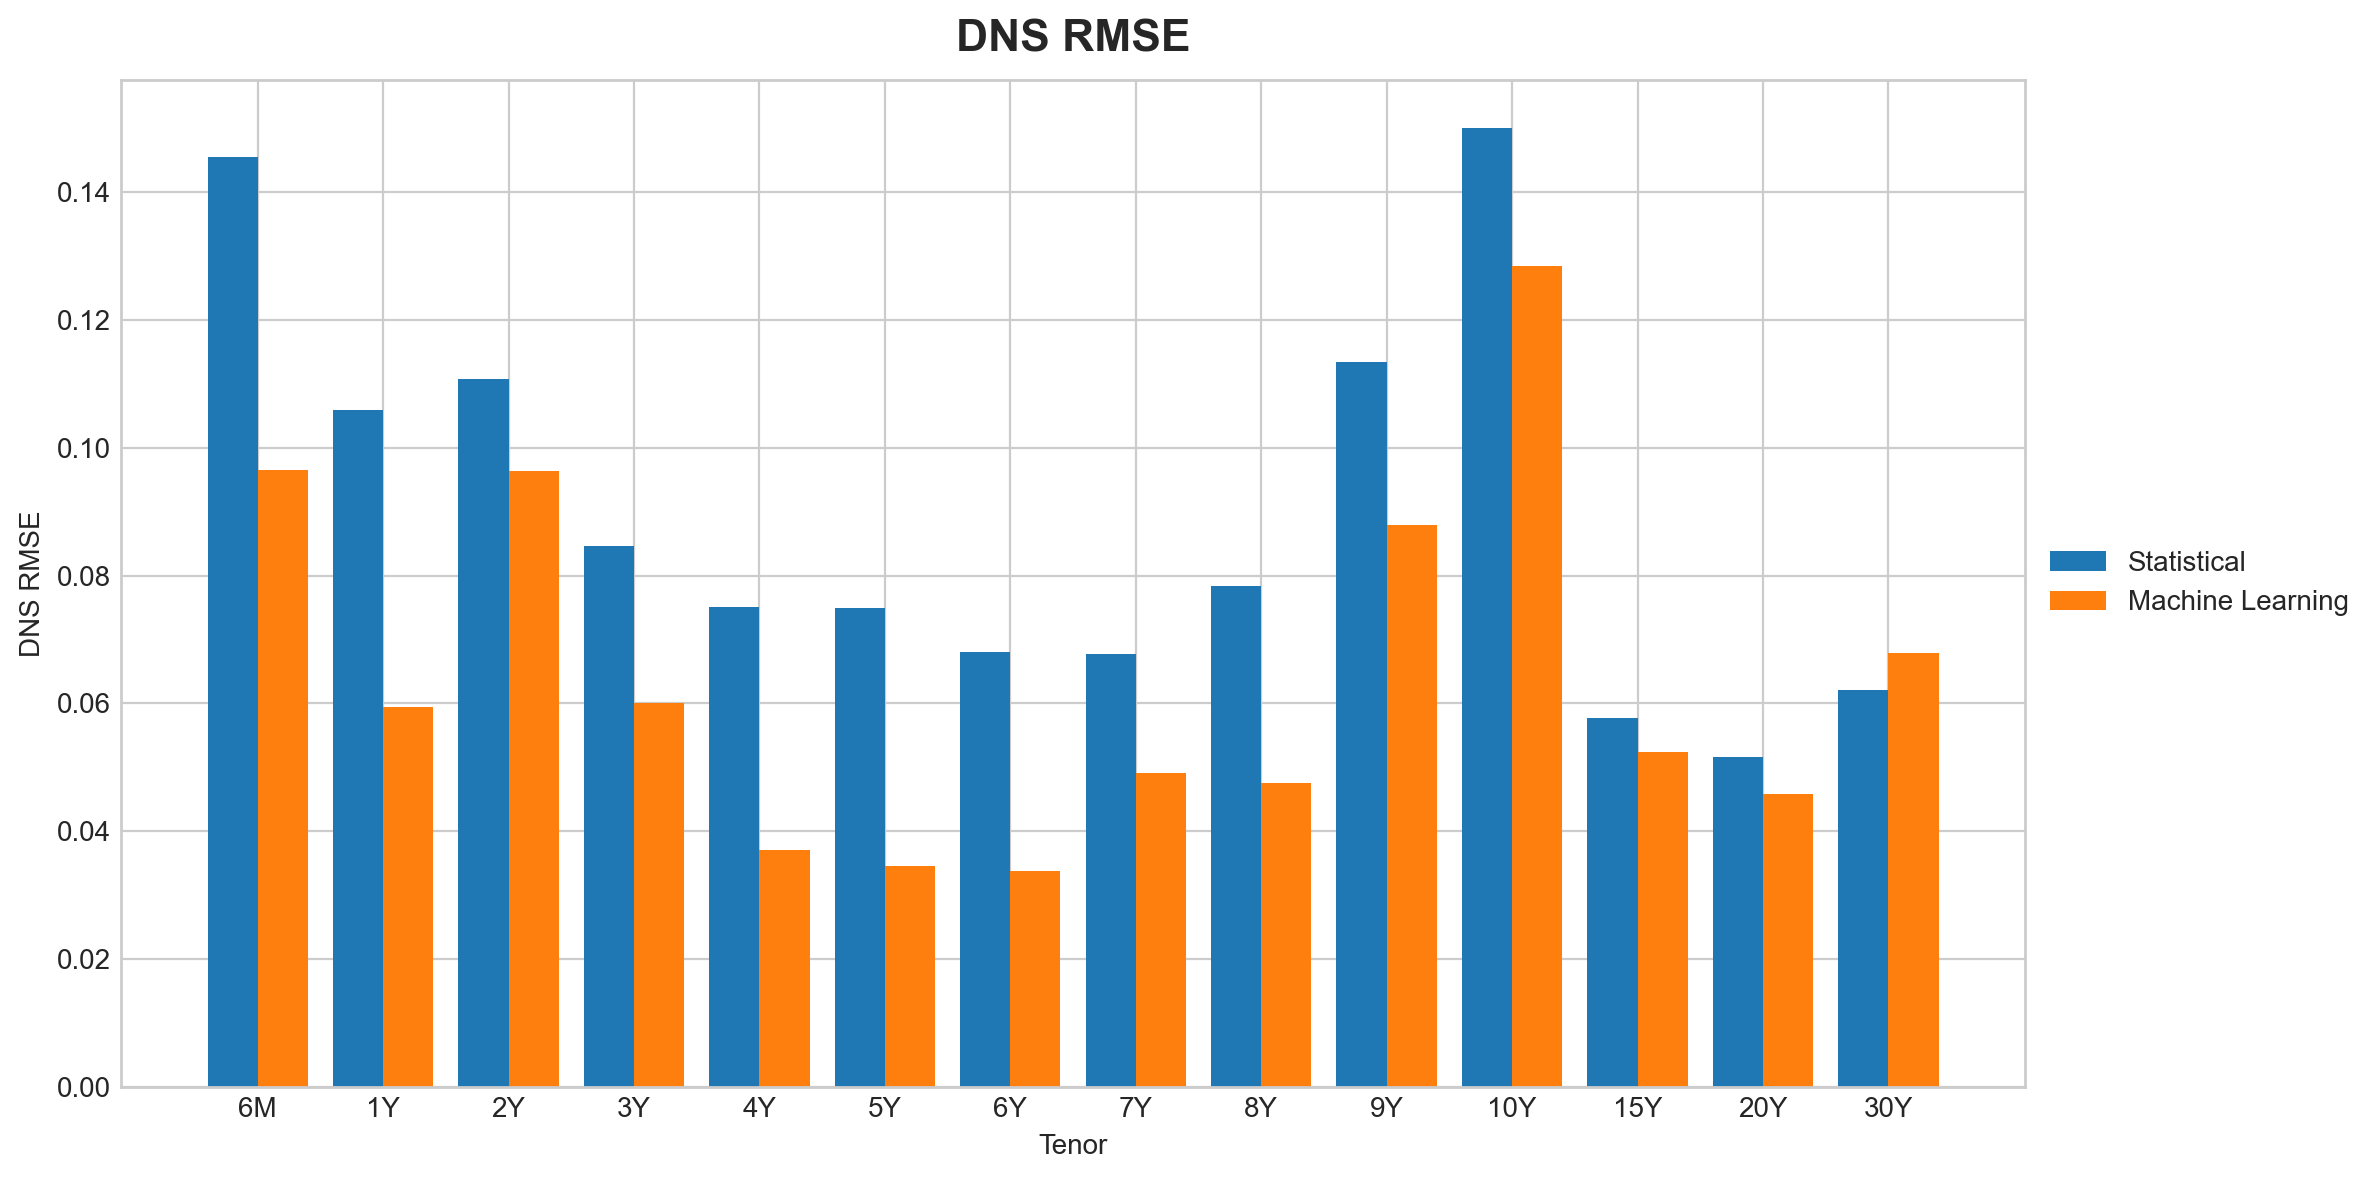

In [49]:
plot_model_pred(data_list= [stats_rmse_list, ml_rmse_list], label="DNS RMSE")

In [50]:
# 数据保存
pred_stats_ytm_df.to_csv("./data/CN_DNS_Pred_Stats_Yield_6M.csv", index=False, encoding="utf-8-sig")

In [51]:
# 数据保存
pred_ml_ytm_df.to_csv("./data/CN_DNS_Pred_ML_Yield_6M.csv", index=False, encoding="utf-8-sig")

In [52]:
pred_stats_ytm_df

,Date,6M,1Y,2Y,3Y,4Y,5Y,6Y,7Y,8Y,9Y,10Y,15Y,20Y,30Y
0,2021-01-04,2.294424,2.373871,2.526298,2.666447,2.792407,2.903998,3.001983,3.087575,3.162156,3.227109,3.283729,3.477965,3.585824,3.696662
1,2021-01-05,2.900062,2.898645,2.924977,2.974468,3.034651,3.098022,3.160239,3.218956,3.273056,3.322164,3.366332,3.525640,3.617694,3.713388
2,2021-01-06,2.587940,2.660438,2.795366,2.915799,3.021786,3.114241,3.194479,3.263944,3.324050,3.376111,3.421299,3.575197,3.660140,3.747274
3,2021-01-07,2.563337,2.617882,2.729581,2.838419,2.940048,3.032524,3.115319,3.188703,3.253360,3.310152,3.359989,3.532846,3.629704,3.729504
4,2021-01-08,2.012175,2.142394,2.370282,2.560710,2.719989,2.853502,2.965767,3.060534,3.140889,3.209365,3.268029,3.463389,3.569158,3.677020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,2022-12-26,2.143979,2.222352,2.360540,2.476998,2.575081,2.657762,2.727604,2.786782,2.837116,2.880117,2.917031,3.040399,3.107399,3.175790
495,2022-12-27,2.135557,2.203016,2.326481,2.434811,2.528951,2.610289,2.680359,2.740671,2.792622,2.837456,2.876260,3.007779,3.080073,3.154140
496,2022-12-28,2.212526,2.276866,2.394233,2.496858,2.585808,2.662508,2.728481,2.785196,2.834001,2.876088,2.912492,3.035745,3.103436,3.172768
497,2022-12-29,2.236146,2.305044,2.427661,2.532074,2.620742,2.695984,2.759886,2.814267,2.860685,2.900454,2.934673,3.049496,3.112074,3.176019


## 3.关键期限预测-AFNS

In [53]:


# 获取实际利率
actual_afns_ytm_df = pd.read_csv(actual_afns_ytm_file)
actual_afns_ytm_df['Date'] = pd.to_datetime(actual_afns_ytm_df['Date'])



actual_afns_ytm_df = datetime_df.merge(actual_afns_ytm_df, on ='Date')
actual_afns_ytm_df

,Date,6M,1Y,2Y,3Y,4Y,5Y,6Y,7Y,8Y,9Y,10Y,15Y,20Y,30Y
0,2021-01-04,2.4387,2.4654,2.7325,2.8437,2.9052,2.9666,3.0877,3.2087,3.1937,3.1787,3.1637,3.5537,3.6628,3.7453
1,2021-01-05,2.3438,2.4500,2.7100,2.8358,2.9117,2.9876,3.0861,3.1846,3.1710,3.1574,3.1438,3.5786,3.6873,3.7453
2,2021-01-06,2.3337,2.4453,2.7287,2.8354,2.8971,2.9587,3.0611,3.1635,3.1569,3.1503,3.1437,3.5453,3.6647,3.7249
3,2021-01-07,2.1987,2.3175,2.6125,2.7498,2.8306,2.9113,3.0221,3.1328,3.1305,3.1282,3.1259,3.5126,3.6532,3.7248
4,2021-01-08,2.2046,2.3238,2.6046,2.7468,2.8338,2.9208,3.0329,3.1450,3.1444,3.1438,3.1432,3.5328,3.6614,3.7325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,2022-12-26,2.1778,2.2398,2.3669,2.4616,2.5396,2.6175,2.7175,2.8175,2.8249,2.8324,2.8398,2.9777,3.0579,3.2225
495,2022-12-27,2.2125,2.2615,2.3889,2.4898,2.5777,2.6656,2.7526,2.8395,2.8475,2.8556,2.8636,3.0014,3.0676,3.2182
496,2022-12-28,2.2398,2.2732,2.4056,2.4746,2.5771,2.6795,2.7595,2.8395,2.8496,2.8598,2.8699,3.0078,3.0679,3.2125
497,2022-12-29,2.1737,2.1952,2.3605,2.4405,2.5415,2.6425,2.7314,2.8202,2.8255,2.8309,2.8362,2.9741,3.0459,3.2021


In [54]:
afns_pred_stats_ytm_df = pd.read_csv(pred_stats_afns_ytm_file)
afns_pred_stats_ytm_df['Date'] = pd.to_datetime(afns_pred_stats_ytm_df['Date'])
afns_pred_stats_ytm_df

,Date,6M,1Y,2Y,3Y,4Y,5Y,6Y,7Y,8Y,9Y,10Y,15Y,20Y,30Y
0,2021-01-04,2.423670,2.532800,2.713984,2.859599,2.981264,3.086615,3.180650,3.266626,3.346654,3.422087,3.493782,3.808721,4.057522,4.340245
1,2021-01-05,2.893807,2.958786,3.062317,3.142630,3.209427,3.268721,3.324138,3.377775,3.430758,3.483611,3.536489,3.795945,4.024510,4.301189
2,2021-01-06,2.621951,2.702578,2.834261,2.939029,3.027100,3.104932,3.176529,3.244312,3.309687,3.373418,3.435862,3.728857,3.976324,4.271758
3,2021-01-07,2.705731,2.793963,2.937953,3.051748,3.146173,3.228186,3.302210,3.371015,3.436292,3.499042,3.559818,3.838862,4.069940,4.338267
4,2021-01-08,2.351467,2.465175,2.654398,2.806754,2.934066,3.044141,3.142122,3.231389,3.314156,3.391863,3.465441,3.785807,4.036430,4.319389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,2022-12-26,2.096017,2.213787,2.404289,2.550467,2.665826,2.759550,2.837906,2.905185,2.964337,3.017397,3.065767,3.262242,3.405669,3.534724
495,2022-12-27,2.036155,2.153762,2.344361,2.491097,2.607367,2.702269,2.782000,2.850794,2.911555,2.966281,3.016346,3.221060,3.371552,3.510695
496,2022-12-28,2.075034,2.183358,2.358013,2.491815,2.597659,2.684222,2.757347,2.820972,2.877752,2.929475,2.977343,3.178818,3.332179,3.480141
497,2022-12-29,2.155737,2.266246,2.444108,2.579817,2.686530,2.773136,2.845654,2.908168,2.963451,3.013389,3.059262,3.249469,3.391985,3.523467


In [55]:
afns_pred_ml_ytm_df = pd.read_csv(pred_ml_afns_ytm_file)
afns_pred_ml_ytm_df['Date'] = pd.to_datetime(afns_pred_ml_ytm_df['Date'])
afns_pred_ml_ytm_df

,Date,6M,1Y,2Y,3Y,4Y,5Y,6Y,7Y,8Y,9Y,10Y,15Y,20Y,30Y
0,2021-01-04,2.457297,2.551033,2.705908,2.830347,2.935104,3.027088,3.110689,3.188655,3.262667,3.333722,3.402380,3.714845,3.970855,4.271674
1,2021-01-05,2.513645,2.605579,2.757044,2.878316,2.980134,3.069390,3.150460,3.226077,3.297909,3.366941,3.433720,3.738604,3.989292,4.283496
2,2021-01-06,2.508171,2.599949,2.751148,2.872208,2.973858,3.062983,3.143952,3.219493,3.291269,3.360262,3.427016,3.731901,3.982683,4.277102
3,2021-01-07,2.502933,2.594555,2.745496,2.866359,2.967863,3.056884,3.137782,3.213279,3.285035,3.354024,3.420788,3.725845,3.976867,4.271705
4,2021-01-08,2.469055,2.562423,2.716479,2.840018,2.943822,3.034822,3.117425,3.194393,3.267418,3.337506,3.405222,3.713464,3.966125,4.262390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,2022-12-26,2.060892,2.176321,2.363066,2.506533,2.620031,2.712582,2.790319,2.857423,2.916751,2.970261,3.019295,3.220783,3.369864,3.508125
495,2022-12-27,2.061703,2.176054,2.360986,2.503028,2.615421,2.707133,2.784247,2.850905,2.909932,2.963260,3.012206,3.214116,3.364204,3.504443
496,2022-12-28,2.071079,2.186053,2.371992,2.514772,2.627686,2.719740,2.797052,2.863794,2.922814,2.976062,3.024872,3.225642,3.374390,3.512413
497,2022-12-29,2.068484,2.182738,2.367465,2.509293,2.621470,2.712964,2.789862,2.856308,2.915129,2.968257,3.017010,3.218072,3.367502,3.506860


In [56]:
tenor_list = ['6M', '1Y', '2Y', '3Y', '4Y', '5Y', '6Y', '7Y', 
              '8Y', '9Y', '10Y', '15Y', '20Y', '30Y']


afns_stats_mae_list = []
afns_stats_mape_list = []
afns_stats_rmse_list = []


afns_ml_mae_list = []
afns_ml_mape_list = []
afns_ml_rmse_list = []


for tenor in tenor_list:
    actual_value = actual_afns_ytm_df[tenor]
    afns_pred_stats_value = afns_pred_stats_ytm_df[tenor]
    afns_pred_ml_value = afns_pred_ml_ytm_df[tenor]
    
    
    afns_pred_stats_mae = mae(actual_value, afns_pred_stats_value)
    afns_pred_ml_mae = mae(actual_value, afns_pred_ml_value)
    
    afns_pred_stats_mape = mape(actual_value, afns_pred_stats_value)
    afns_pred_ml_mape = mape(actual_value, afns_pred_ml_value)
    
    afns_pred_stats_rmse = rmse(actual_value, afns_pred_stats_value)
    afns_pred_ml_rmse = rmse(actual_value, afns_pred_ml_value)
    
    afns_stats_mae_list.append(afns_pred_stats_mae)
    afns_stats_mape_list.append(afns_pred_stats_mape)
    afns_stats_rmse_list.append(afns_pred_stats_rmse)
    
    afns_ml_mae_list.append(afns_pred_ml_mae)
    afns_ml_mape_list.append(afns_pred_ml_mape)
    afns_ml_rmse_list.append(afns_pred_ml_rmse)

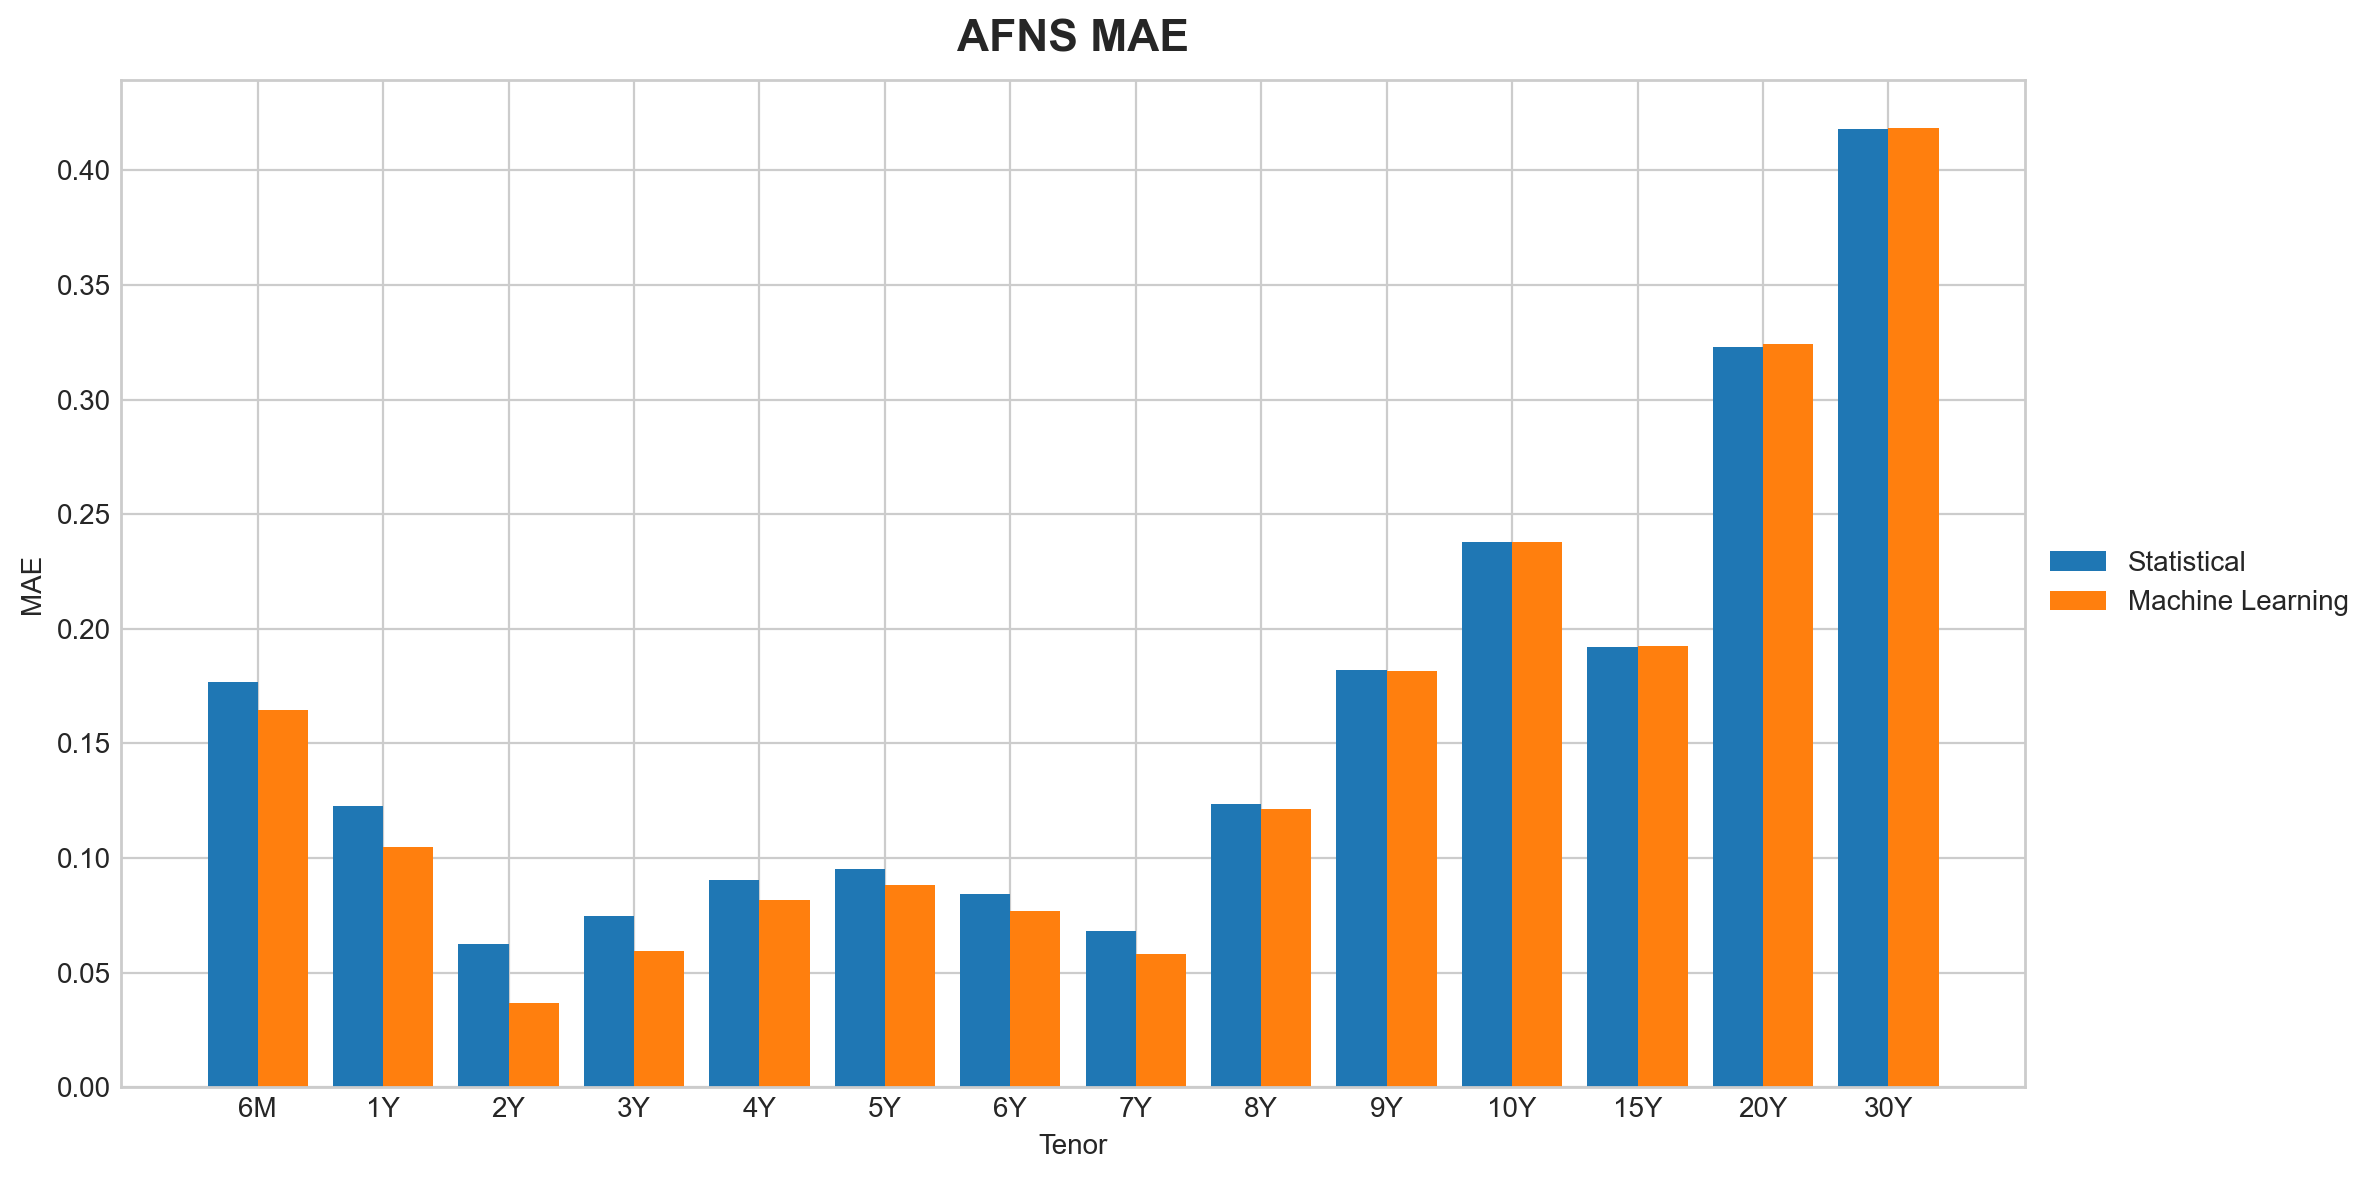

In [57]:
#plot_model_pred(data_list= [afns_model_mae_list, afns_stats_mae_list], label="MAE")

label="MAE"
fig, ax = plt.subplots(figsize=(12, 6))
tenor_list = ['6M', '1Y', '2Y', '3Y', '4Y', '5Y', '6Y', '7Y', 
              '8Y', '9Y', '10Y', '15Y', '20Y', '30Y']

totalWidth=0.8 # 一组柱状体的宽度
labelNums=2 # 一组有两种类别
barWidth=totalWidth/labelNums # 单个柱体的宽度
seriesNums=len(tenor_list) # 一共有多少组

ax.bar([x for x in range(seriesNums)], afns_stats_mae_list, label="Statistical", width=barWidth)
ax.bar([x+1*barWidth for x in range(seriesNums)], afns_ml_mae_list, label="Machine Learning", width=barWidth)


plt.xticks([x+barWidth/2*(labelNums-1) for x in range(seriesNums)], tenor_list)
plt.xlabel("Tenor")
plt.ylabel(label)
plt.title("AFNS "+ label)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

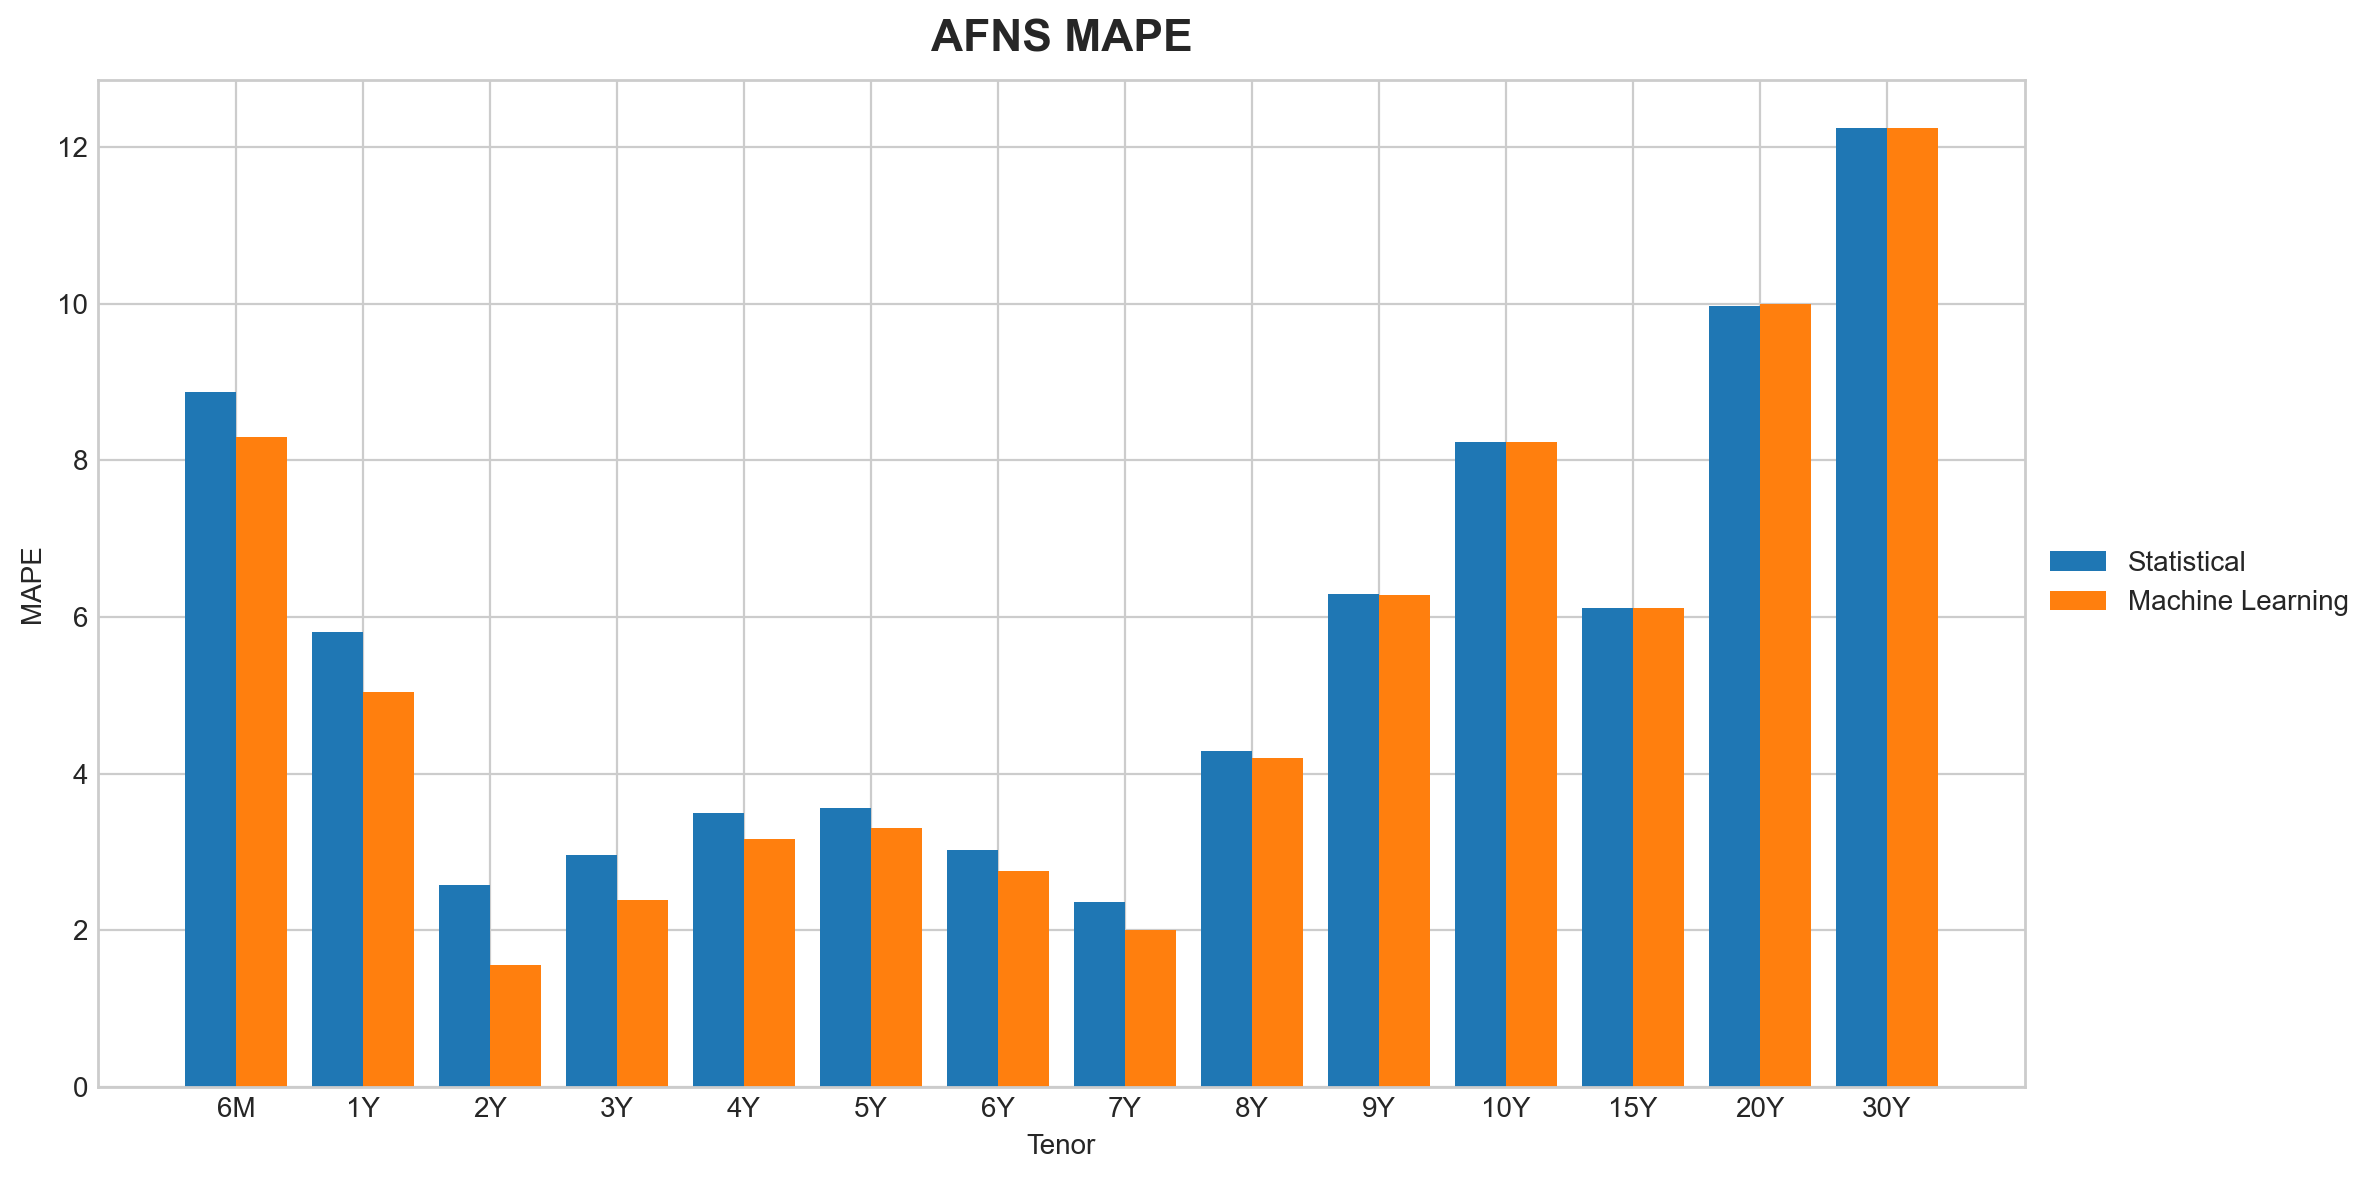

In [58]:
label="MAPE"
fig, ax = plt.subplots(figsize=(12, 6))
tenor_list = ['6M', '1Y', '2Y', '3Y', '4Y', '5Y', '6Y', '7Y', 
              '8Y', '9Y', '10Y', '15Y', '20Y', '30Y']

totalWidth=0.8 # 一组柱状体的宽度
labelNums=2 # 一组有两种类别
barWidth=totalWidth/labelNums # 单个柱体的宽度
seriesNums=len(tenor_list) # 一共有多少组

ax.bar([x for x in range(seriesNums)], afns_stats_mape_list, label="Statistical", width=barWidth)
ax.bar([x+1*barWidth for x in range(seriesNums)], afns_ml_mape_list, label="Machine Learning", width=barWidth)


plt.xticks([x+barWidth/2*(labelNums-1) for x in range(seriesNums)], tenor_list)
plt.xlabel("Tenor")
plt.ylabel(label)
plt.title("AFNS "+ label)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

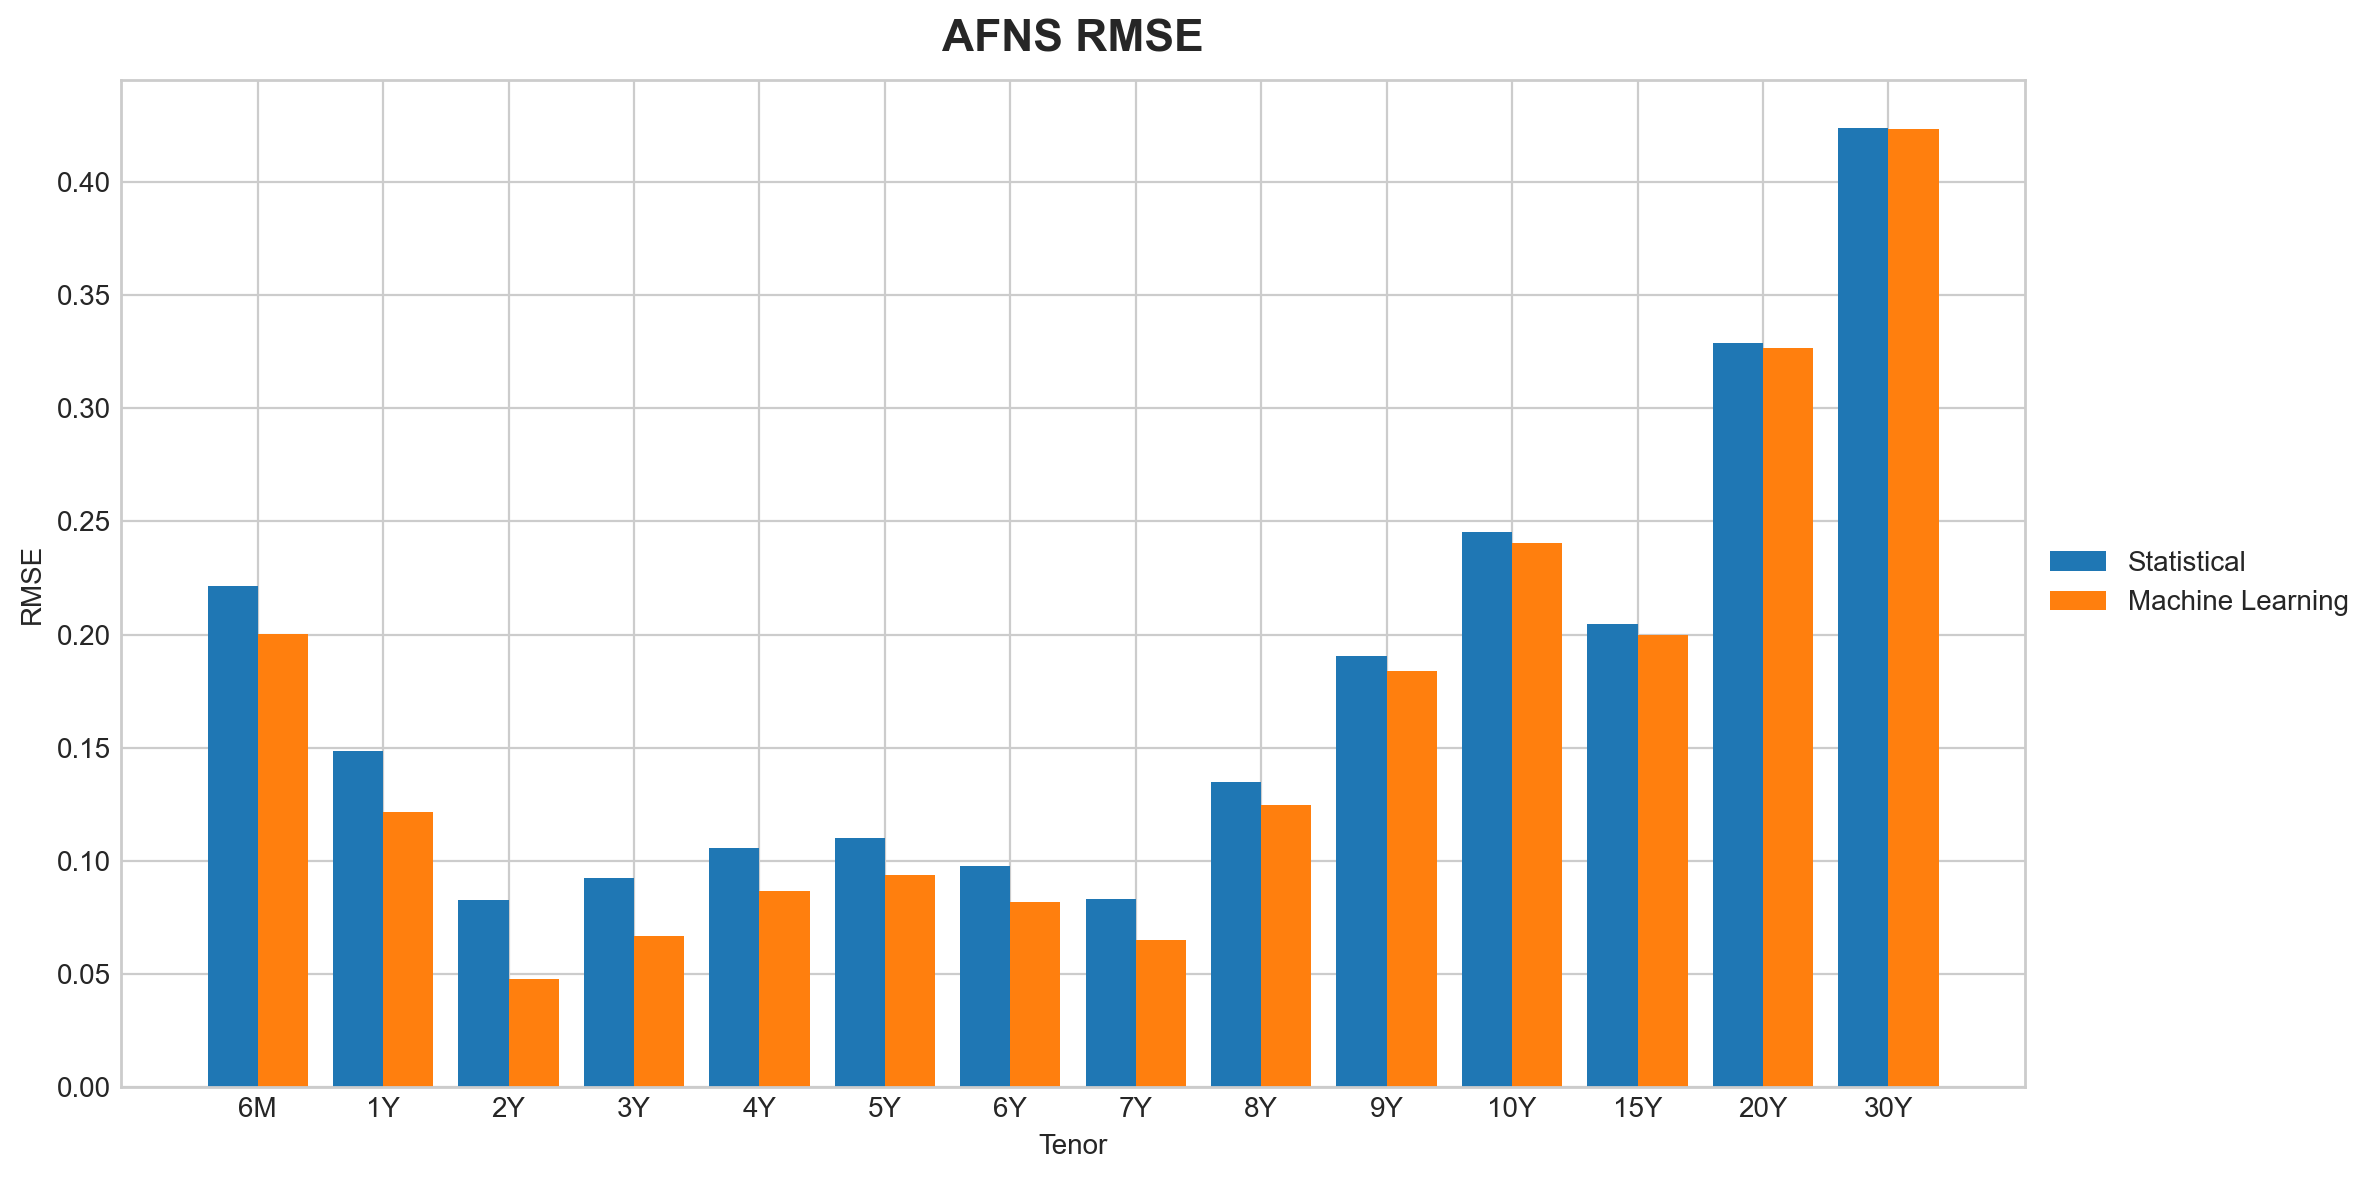

In [59]:
label="RMSE"
fig, ax = plt.subplots(figsize=(12, 6))
tenor_list = ['6M', '1Y', '2Y', '3Y', '4Y', '5Y', '6Y', '7Y', 
              '8Y', '9Y', '10Y', '15Y', '20Y', '30Y']

totalWidth=0.8 # 一组柱状体的宽度
labelNums=2 # 一组有两种类别
barWidth=totalWidth/labelNums # 单个柱体的宽度
seriesNums=len(tenor_list) # 一共有多少组

ax.bar([x for x in range(seriesNums)], afns_stats_rmse_list, label="Statistical", width=barWidth)
ax.bar([x+1*barWidth for x in range(seriesNums)], afns_ml_rmse_list, label="Machine Learning", width=barWidth)


plt.xticks([x+barWidth/2*(labelNums-1) for x in range(seriesNums)], tenor_list)
plt.xlabel("Tenor")
plt.ylabel(label)
plt.title("AFNS "+ label)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## 比较DNS跟AFNS

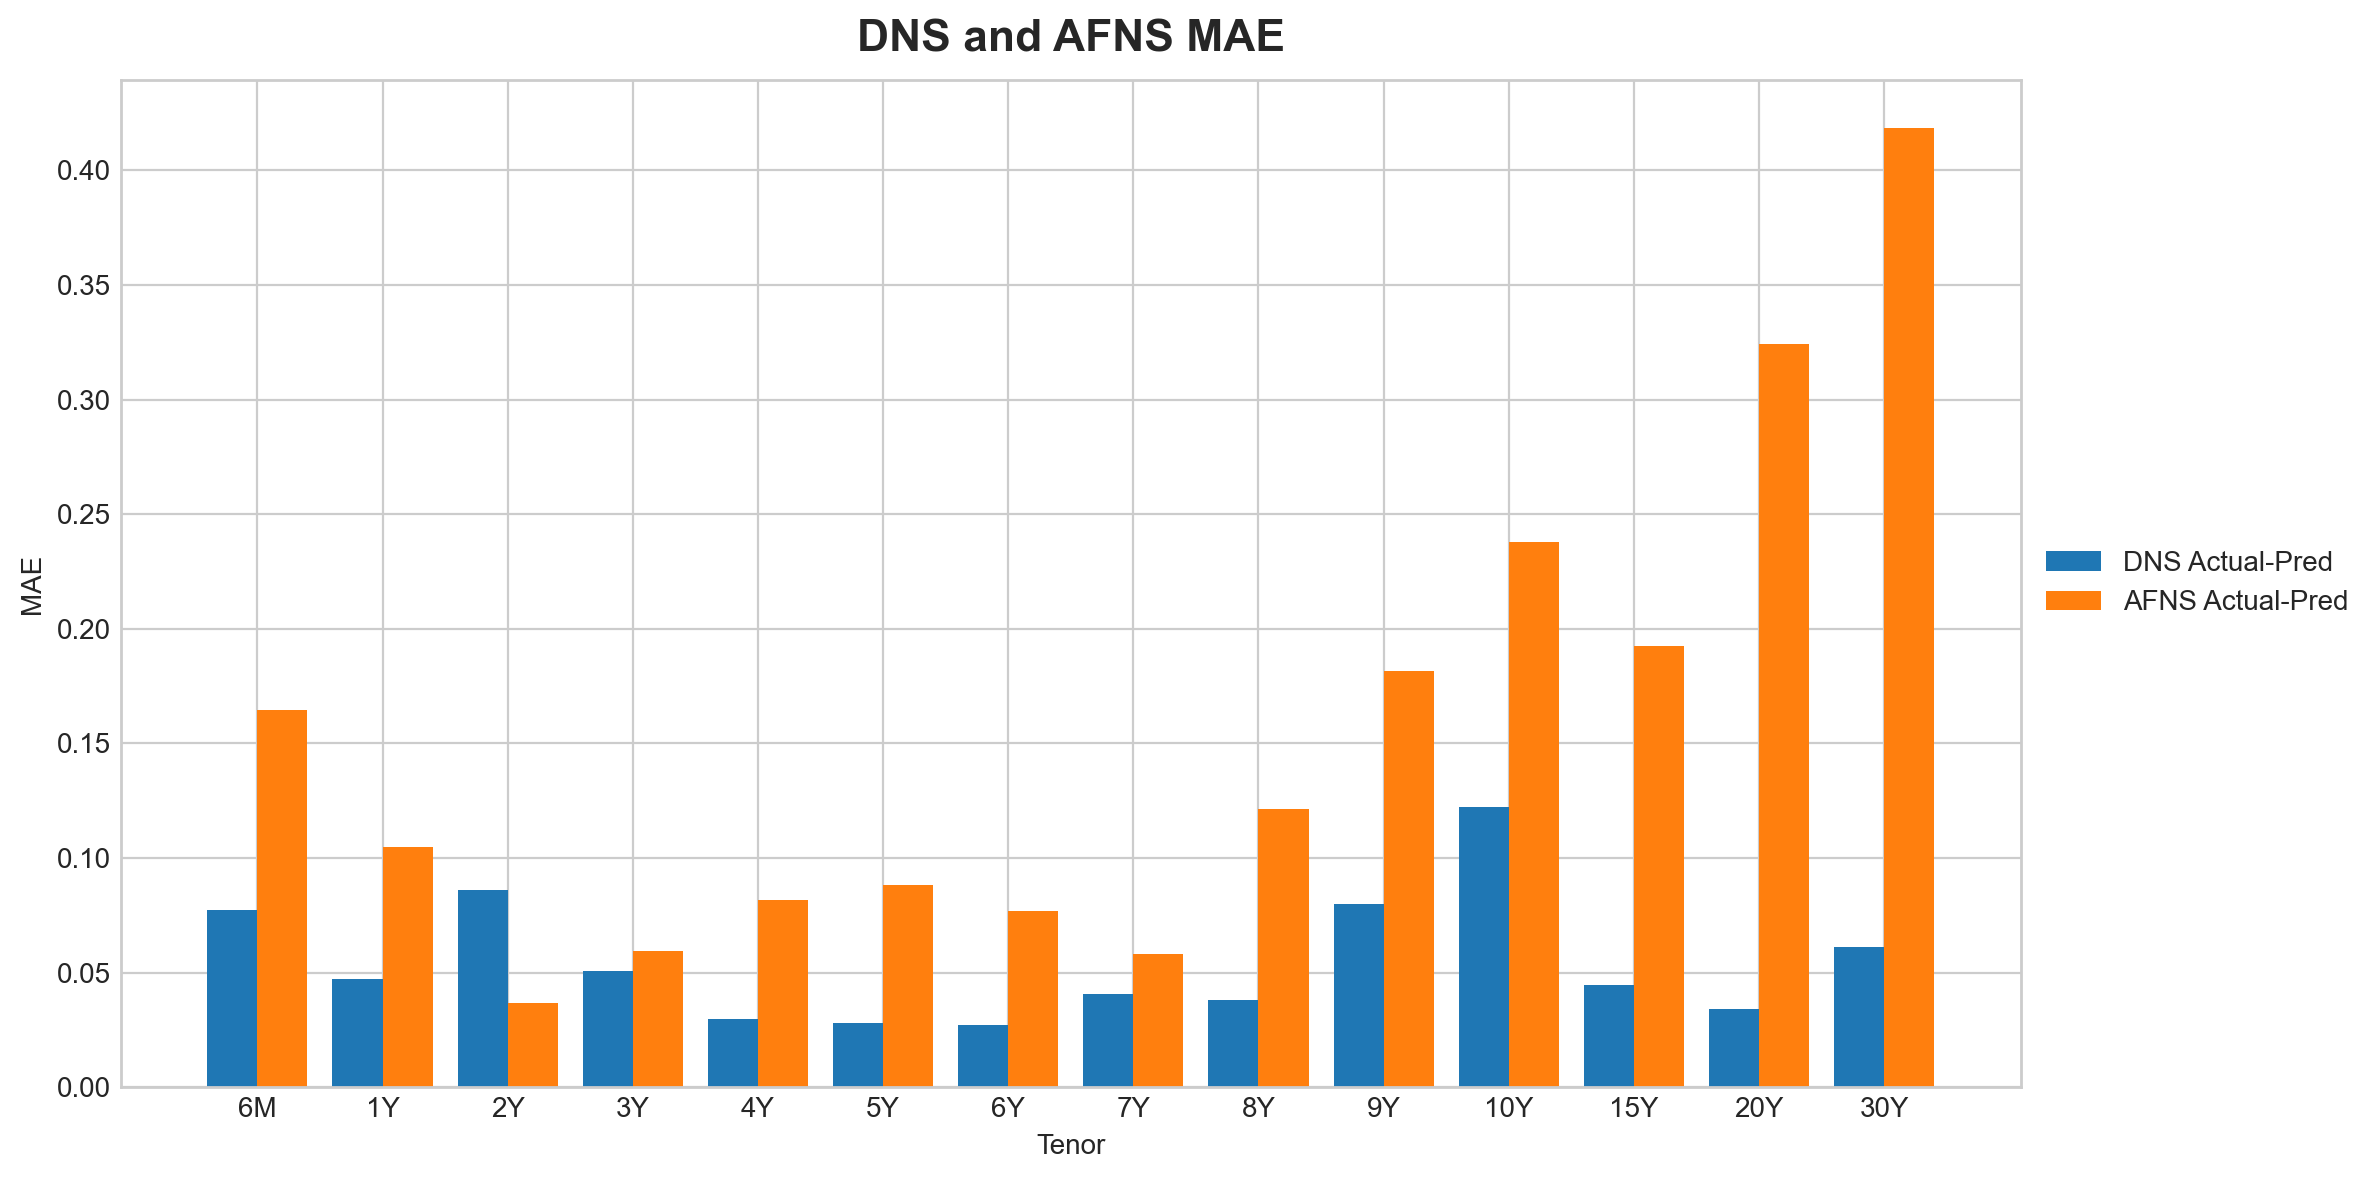

In [60]:
label="MAE"
fig, ax = plt.subplots(figsize=(12, 6))
tenor_list = ['6M', '1Y', '2Y', '3Y', '4Y', '5Y', '6Y', '7Y', 
              '8Y', '9Y', '10Y', '15Y', '20Y', '30Y']

totalWidth=0.8 # 一组柱状体的宽度
labelNums=2 # 一组有两种类别
barWidth=totalWidth/labelNums # 单个柱体的宽度
seriesNums=len(tenor_list) # 一共有多少组

ax.bar([x for x in range(seriesNums)], ml_mae_list, label="DNS Actual-Pred", width=barWidth)
ax.bar([x+1*barWidth for x in range(seriesNums)], afns_ml_mae_list, label="AFNS Actual-Pred", width=barWidth)


plt.xticks([x+barWidth/2*(labelNums-1) for x in range(seriesNums)], tenor_list)
plt.xlabel("Tenor")
plt.ylabel(label)
plt.title("DNS and AFNS "+ label)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

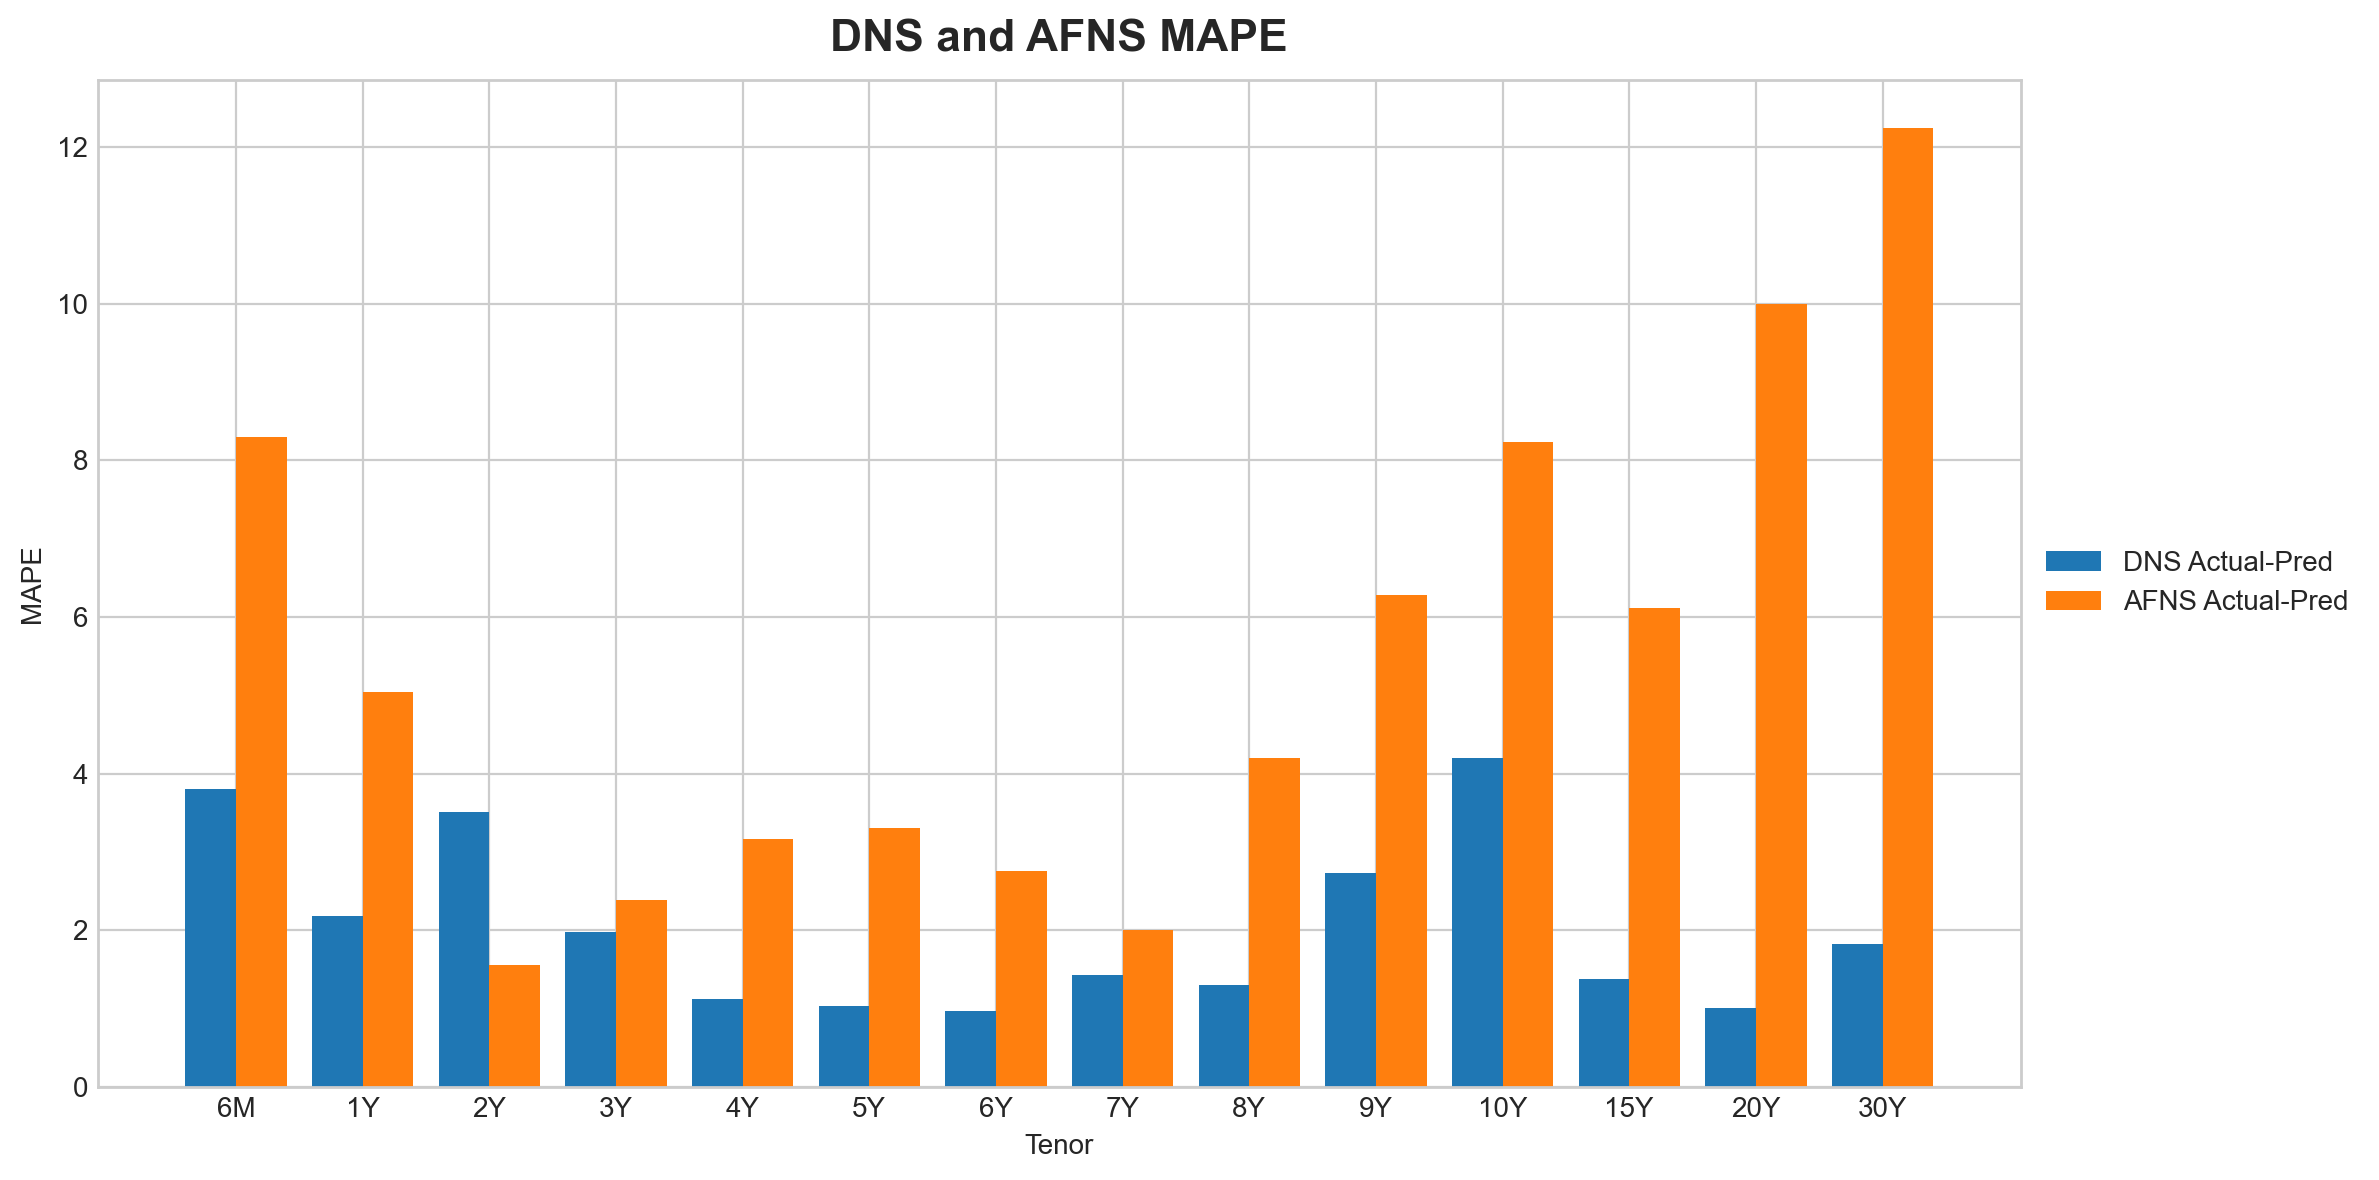

In [61]:
label="MAPE"
fig, ax = plt.subplots(figsize=(12, 6))
tenor_list = ['6M', '1Y', '2Y', '3Y', '4Y', '5Y', '6Y', '7Y', 
              '8Y', '9Y', '10Y', '15Y', '20Y', '30Y']

totalWidth=0.8 # 一组柱状体的宽度
labelNums=2 # 一组有两种类别
barWidth=totalWidth/labelNums # 单个柱体的宽度
seriesNums=len(tenor_list) # 一共有多少组

ax.bar([x for x in range(seriesNums)], ml_mape_list, label="DNS Actual-Pred", width=barWidth)
ax.bar([x+1*barWidth for x in range(seriesNums)], afns_ml_mape_list, label="AFNS Actual-Pred", width=barWidth)


plt.xticks([x+barWidth/2*(labelNums-1) for x in range(seriesNums)], tenor_list)
plt.xlabel("Tenor")
plt.ylabel(label)
plt.title("DNS and AFNS "+ label)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

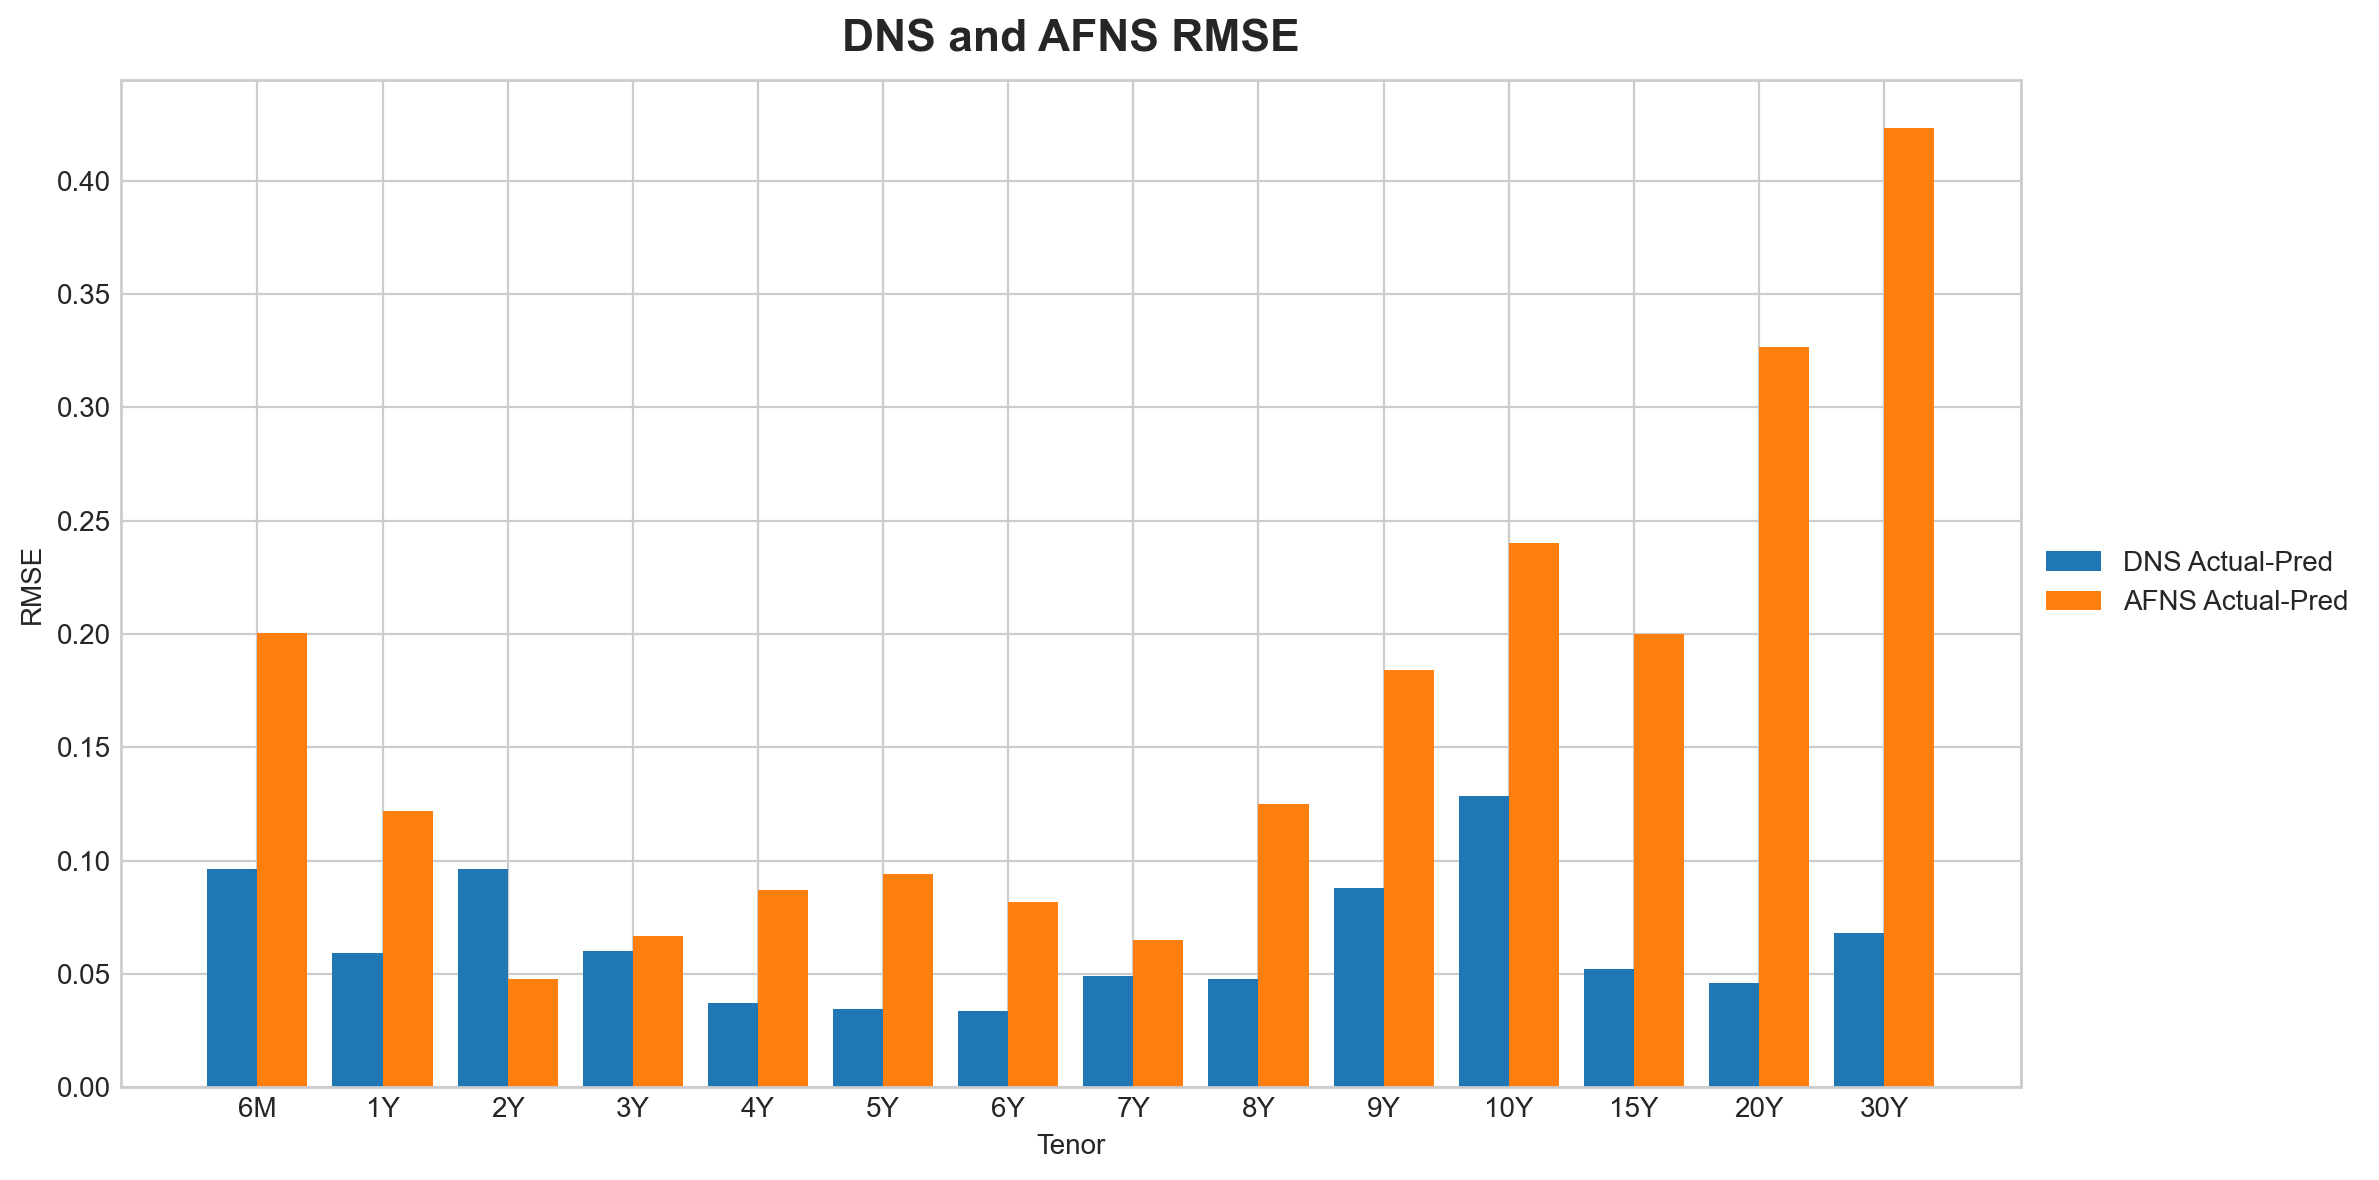

In [62]:
label="RMSE"
fig, ax = plt.subplots(figsize=(12, 6))
tenor_list = ['6M', '1Y', '2Y', '3Y', '4Y', '5Y', '6Y', '7Y', 
              '8Y', '9Y', '10Y', '15Y', '20Y', '30Y']

totalWidth=0.8 # 一组柱状体的宽度
labelNums=2 # 一组有两种类别
barWidth=totalWidth/labelNums # 单个柱体的宽度
seriesNums=len(tenor_list) # 一共有多少组

ax.bar([x for x in range(seriesNums)], ml_rmse_list, label="DNS Actual-Pred", width=barWidth)
ax.bar([x+1*barWidth for x in range(seriesNums)], afns_ml_rmse_list, label="AFNS Actual-Pred", width=barWidth)


plt.xticks([x+barWidth/2*(labelNums-1) for x in range(seriesNums)], tenor_list)
plt.xlabel("Tenor")
plt.ylabel(label)
plt.title("DNS and AFNS "+ label)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [63]:
# 保存数据

tenor_list = ['6M', '1Y', '2Y', '3Y', '4Y', '5Y', '6Y', '7Y', 
              '8Y', '9Y', '10Y', '15Y', '20Y', '30Y']
error_list = ['MAE', 'MAPE', 'RMSE']

DNS_ARIMA_list = []
for i in range(len(tenor_list)):
    temp_list = [stats_mae_list[i], stats_mape_list[i], stats_rmse_list[i]]
    DNS_ARIMA_list = DNS_ARIMA_list + temp_list

DNS_ML_list = []
for i in range(len(tenor_list)):
    temp_list = [ml_mae_list[i], ml_mape_list[i], ml_rmse_list[i]]
    DNS_ML_list = DNS_ML_list + temp_list

AFNS_ARIMA_list = []
for i in range(len(tenor_list)):
    temp_list = [afns_stats_mae_list[i], afns_stats_mape_list[i], afns_stats_rmse_list[i]]
    AFNS_ARIMA_list = AFNS_ARIMA_list + temp_list
    
AFNS_ML_list = []
for i in range(len(tenor_list)):
    temp_list = [afns_ml_mae_list[i], afns_ml_mape_list[i], afns_ml_rmse_list[i]]
    AFNS_ML_list = AFNS_ML_list + temp_list

result_df = pd.DataFrame()
result_df['DNS_ARIMA'] = DNS_ARIMA_list
result_df['DNS_ML'] = DNS_ML_list
result_df['AFNS_ARIMA'] = AFNS_ARIMA_list
result_df['AFNS_ML'] = AFNS_ML_list
result_df


,DNS_ARIMA,DNS_ML,AFNS_ARIMA,AFNS_ML
0,0.109289,0.077119,0.176670,0.164525
1,5.374924,3.800919,8.871311,8.298428
2,0.145481,0.096507,0.221277,0.200284
3,0.078407,0.047360,0.122796,0.104749
4,3.613944,2.187408,5.809048,5.041978
5,0.105843,0.059375,0.148512,0.121816
6,0.090564,0.085834,0.062677,0.036844
7,3.727263,3.508008,2.584343,1.555984
8,0.110747,0.096325,0.082496,0.047639
9,0.066148,0.050732,0.074710,0.059484
